## POPULARITY BASED RECOMMENDER SYSTEM

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation, linear_model
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn import datasets
import random
import time
import pylab as pl

In [32]:
df = pd.read_parquet('/Users/macbookpro16/Desktop/user_track_df.parquet', engine='pyarrow')
df.head()

,user_id,song_id,listen_count,track_id,artist_name,track_name,track_uri,popularity,duration_ms,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,TRPLAXZ128F4292406,Jorge Drexler,12 segundos de oscuridad,2ECKXkpPAxky87ohawpaeD,37,246826,0,...,-8.176,0,0.0327,0.11900,0.000412,0.103,0.0396,126.051,4,4ssUf5gLb1GBLxi1BhPrVt
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRHNCIR128F42334A5,Kanye West,Stronger,4fzsfWzRhPawzqhX8Qt9F3,82,311867,1,...,-7.858,0,0.1530,0.00564,0.000000,0.408,0.4900,103.992,4,5K4W6rqBFWDnAN6FQUkS6x
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,TRUATNS128F423457D,Kanye West,Stronger,4fzsfWzRhPawzqhX8Qt9F3,82,311867,1,...,-7.858,0,0.1530,0.00564,0.000000,0.408,0.4900,103.992,4,5K4W6rqBFWDnAN6FQUkS6x
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,TRYBNIB128F428E704,Jack Johnson,Constellations,3deZQXBY8CJFbrTc2PbU34,59,201640,0,...,-12.640,1,0.0355,0.46800,0.000043,0.117,0.4430,122.012,4,3GBPw9NK25X1Wt2OUvOwY3
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOEWFWM12A8C1308BA,1,TRLQPQJ128F42AA94F,Gipsy Kings,Soy,076jKe7yfP979o1QLKMIA2,47,189987,0,...,-12.321,0,0.0653,0.29700,0.000267,0.127,0.9050,114.656,4,3jc496ljiyrS3ECrD7QiqL


In [34]:
#splitting into train and test data
train_data, test_data = train_test_split(df, test_size = 0.20, random_state=0)

In [35]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [36]:
# we fit the model to the train data
pm = popularity_recommender_py()
pm.create(train_data, 'user_id', 'song_id')

#user the popularity model to make some prediction
user_id = df['user_id'][5]
pm.recommend(user_id)

,user_id,song_id,score,Rank
11280,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SONYKOW12AB01849C9,62739,1.0
12723,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOPXKYD12A6D4FA876,61921,2.0
2678,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODGVGW12AC9075A8D,58635,3.0
15547,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOTWSXL12A8C143349,49795,4.0
4490,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFLJQZ12A6D4FADA6,46946,5.0
10812,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SONIQRE12AF72A2B02,43535,6.0
8840,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOKUAGP12A8C133B94,39775,7.0
15539,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOTWNDJ12A8C143984,37720,8.0
8606,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOKLRPJ12A8C13C3FE,36467,9.0
2321,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOCVTLJ12A6310F0FD,34075,10.0


In [ ]:
# Method to return random percentage of values from a list
def remove_percentage(list_a, percentage):
    k = int(len(list_a) * percentage)
    random.seed(0)
    indicies = random.sample(range(len(list_a)), k)
    new_list = [list_a[i] for i in indicies]

    return new_list

In [37]:
def precision_recall_calculator(test_data, train_data, model2, percentage):
    
    user_test_sample = None
    pm_training_dict = dict()
    test_dict = dict()
    
    #Create a test sample of users for use in calculating precision
    #and recall
    #Find users common between training and test set
    users_test_and_training = list(set(test_data['user_id'].unique()).intersection(set(train_data['user_id'].unique())))
    print("Length of user_test_and_training:%d" % len(users_test_and_training))

    #Take only random user_sample of users for evaluations
    users_test_sample = remove_percentage(users_test_and_training, percentage)

    print("Length of user sample:%d" % len(users_test_sample))
        
    #Generate recommendations for users in the user test sample
    #For these test_sample users, get top 10 recommendations from training set
    #self.ism_training_dict = {}
    #self.pm_training_dict = {}

    #self.test_dict = {}

    for user_id in users_test_sample:
        #Get items for user_id from item similarity model
        print("Getting recommendations for user:%s" % user_id)
        user_sim_items = model2.recommend(user_id)
        pm_training_dict[user_id] = list(user_sim_items["song_id"])

        #Get items for user_id from test_data
        test_data_user = test_data[test_data['user_id'] == user_id]
        test_dict[user_id] = set(test_data_user['song_id'].unique() )
    
    #Calculate the precision and recall measures
    #Create cutoff list for precision and recall calculation
    cutoff_list = list(range(1,11))


    #For each distinct cutoff:
    #    1. For each distinct user, calculate precision and recall.
    #    2. Calculate average precision and recall.

    ism_avg_precision_list = []
    ism_avg_recall_list = []


    num_users_sample = len(users_test_sample)
    for N in cutoff_list:
        ism_sum_precision = 0
        ism_sum_recall = 0
        ism_avg_precision = 0
        ism_avg_recall = 0

        for user_id in users_test_sample:
            ism_hitset = test_dict[user_id].intersection(set(pm_training_dict[user_id][0:N]))
            testset = test_dict[user_id]
    
            ism_sum_precision += float(len(ism_hitset))/float(len(testset))
            ism_sum_recall += float(len(ism_hitset))/float(N)
    

        ism_avg_precision = ism_sum_precision/float(num_users_sample)
        ism_avg_recall = ism_sum_recall/float(num_users_sample)

        ism_avg_precision_list.append(ism_avg_precision)
        ism_avg_recall_list.append(ism_avg_recall)

        
    return (ism_avg_precision_list, ism_avg_recall_list)  

In [38]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list) = precision_recall_calculator(test_data, train_data, pm, user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:705545
Length of user sample:35277
Getting recommendations for user:c4fadffc66cf5961d6baa49b1d6dc80072148e94
Getting recommendations for user:5193bfc0437a3671b2fec53c65a7a5f5fd1db259
Getting recommendations for user:e29a39b1270a3a27a173a0bf8dca93506360d44d
Getting recommendations for user:412a81f4a221f3fe1bede21f7a96ee191ea1b171
Getting recommendations for user:42caf8d039c1d7ce01851be6970a254cb55c82d5
Getting recommendations for user:148b41ab2e0b80fd7f0db951eb9f407043e08d0b
Getting recommendations for user:02a9f59cb981c4b0d648bd2be40f345ab132a6bb
Getting recommendations for user:16a169fe2aae8b9def552092527db97a412bee7d
Getting recommendations for user:bdb95f4f039f137cf267a30dec59a87bba604512
Getting recommendations for user:d8e83e30c66cec123feb5221d23925245c50e454
Getting recommendations for user:51ce0195b9e0dd190f0f2bb5b01e13d050ab7358
Getting recommendations for user:3bd37433d133dbd7951063355b6b4a7657ef0a7a
Getting recommendations for user:724c736dae7

Getting recommendations for user:6d4fd867742b758fb4abe8fef2484feff45f5437
Getting recommendations for user:a48e439322a478587f72d24d8316d2df637ed89b
Getting recommendations for user:b537c706dba0d74d3caeef6005aaf724ce28d0aa
Getting recommendations for user:3a8666e9d3069b2ee7a27854ddd4485e86aaf643
Getting recommendations for user:5f1daeb5ee221120e39207df9257dbbf3c3acbf8
Getting recommendations for user:7f394fce5336c6936b21b4d9eef0e96aefa15e8e
Getting recommendations for user:db47ea18501f28325ab00e3b7dd036d7911253f0
Getting recommendations for user:42bd319102b0459f75855dc8c2e963c19420bab9
Getting recommendations for user:6801433c7693a957738fa9dab8336c01c709898e
Getting recommendations for user:4b8285e29e6e74e6a94130a2ce7e857494ada471
Getting recommendations for user:b646cb7ba164974d60eff33e937a1476b7677fe2
Getting recommendations for user:d50138a650af09a1476fa9f17763884a89573ed4
Getting recommendations for user:fca44ac35f020f7e85d30277cb30b8e2316d673e
Getting recommendations for user:7ad88

Getting recommendations for user:7625cea2df1410fe549581ff915d4c3db91c41e5
Getting recommendations for user:10984db92ceb80d55300ee124d2247ac2f20b3c6
Getting recommendations for user:8b64d96dfd59ee552a16d44d987408cf4cd10391
Getting recommendations for user:12faa3b4eccaf53d0aae848879690649613a2c16
Getting recommendations for user:3651d7171439b629eb91fc1b39916d3cc22548ab
Getting recommendations for user:580519a990f6abd3c5915a2d48820d86ef2b64fb
Getting recommendations for user:854513c95b5d39659073693d3cdebef918779e6c
Getting recommendations for user:f36fd042f75555c70fc2c06e981eeeb7c36b0920
Getting recommendations for user:b7f2b125f6dfadf83629d5588b639a2d672c514b
Getting recommendations for user:591ae058f700a01491d6a98af4faec414d6e2229
Getting recommendations for user:00f25515792d58114982c0c429d47db7c53d33d2
Getting recommendations for user:a26c1db7bea6b7646ab9577cb1b6ac7a3db2436a
Getting recommendations for user:7fdae8401d95a3776202e5a0ff8974bfb0d9dfb8
Getting recommendations for user:11212

Getting recommendations for user:bfd85ef0b5512f2567bfe984ebe7c2377d7a6d2f
Getting recommendations for user:74e5df4ca531beebcda483b879a7ac7e9ff9cc9e
Getting recommendations for user:90399a5ed6c0796188998b91f6405cc29c700dfc
Getting recommendations for user:e40e6d41f4c780eb58218da096f2bcaaa785e94e
Getting recommendations for user:3cb8a477d118ef15b88ec072509377df9580e043
Getting recommendations for user:4d83a4b64d11e12ab74bbabe4e6e83f5917894de
Getting recommendations for user:21476e3665b06f2705eefa7442ac18d73245e916
Getting recommendations for user:bb9cff3c08becb6e97a25cd7ead04f33fd329c2d
Getting recommendations for user:d089254da3eb370b6eb2ae0c1627d2b3c191eb2a
Getting recommendations for user:f62713726246a9c329f965e886b0d0ac8f539119
Getting recommendations for user:46f0b8945ee837b08b15309e89789f15b11f992d
Getting recommendations for user:4b8a907cdc6269a05b37f88dbc899374983b3e58
Getting recommendations for user:d59a2def386c9b61a32c55f46d4c4647ab066d60
Getting recommendations for user:80b1f

Getting recommendations for user:5927fa14e9e22c1e8261dc3487d9c06ceabb2de7
Getting recommendations for user:7eb5e7cd7120e13cd4b943fee2e720f9dd06bacf
Getting recommendations for user:5a1cf0cee59009d31e6eb748d65fbec0aa2bbef0
Getting recommendations for user:f62be8923930248018fd6e18a39df79fd4904115
Getting recommendations for user:2394438965d1596103343d56c77e8c22ca6a934b
Getting recommendations for user:de072c5ca9755ca897733cfd12968b081287ffe1
Getting recommendations for user:be53938de82595dcf57d3f3c0a5a483d89b4a0e3
Getting recommendations for user:8c2daab0dba219c2ddb3c66c75ba426e8240eccb
Getting recommendations for user:f959d3967db4744dfd50cb8317380bb537859b63
Getting recommendations for user:4a565063c7b86ada8e51ef75ced92802537e55e8
Getting recommendations for user:2436b2e07cfef27a1d8c62182d13e11af3cbb091
Getting recommendations for user:ec32b0d4d7521974f19ae60ced7972d14f3a2255
Getting recommendations for user:b2b995aa631c70f84c6b0d1f575b673eb3174145
Getting recommendations for user:09270

Getting recommendations for user:fa3cd3ead949fe05b3fe7a502ebde54b7b595507
Getting recommendations for user:c21f3bc2e057350aeeadf19fd53453835286baa8
Getting recommendations for user:eb5b8c4b679c2d108691af5e27a9c60a18b6d3b7
Getting recommendations for user:7bed6cc59e5a5e1e89d46229379e6843ec50b040
Getting recommendations for user:4c961422bd1db6dbcd9ae8851140fda8c31063ed
Getting recommendations for user:a5b3084bab797e20ddc0a701807334c6e81a7999
Getting recommendations for user:4f996859d06070d1644392f412b052675e03abd5
Getting recommendations for user:e52d92ebe4a5ef94659661dfcb6f3306ed2e28c2
Getting recommendations for user:ed9f7ea968c2eb0af558161fea6c9b8e07ac3922
Getting recommendations for user:e1a9129000fbf794c8d27b7e60413cf94dbeeb76
Getting recommendations for user:3d187337ff248accd595339e8354fe077b5a4aef
Getting recommendations for user:2ed0a8e542e704b5ddbe7999e4e5c0fa0e047332
Getting recommendations for user:12549974b3ff99b871d8da0aa7b08f8354a0b436
Getting recommendations for user:53fb8

Getting recommendations for user:53eef7834356b1a70012e22cb6aa99ea73974ade
Getting recommendations for user:01a57ce499e3b95efd7ffdb0c5cd04adde75f216
Getting recommendations for user:7610d38887a00586b9413784defe8d0ae379d342
Getting recommendations for user:f17fd01efde3da61feca155a2e356a994775b53e
Getting recommendations for user:47ca6d21f678d5f236475ec15a9b921bc0c8b286
Getting recommendations for user:28d5e416da51d879a2ffb1fb12e8052b1e9acefc
Getting recommendations for user:8af973b9e225a1f002faf782f4c38bf4dc6d85e0
Getting recommendations for user:880cb092b1a49c03124dc46184f3639441d8771d
Getting recommendations for user:315b047dabe8b6e056d1b91d4d0f834228714740
Getting recommendations for user:10b525213344ae198da52a5c48e559accdf8ddb4
Getting recommendations for user:694899e912c5fc74e7406c6eb05fff358bba48fd
Getting recommendations for user:9fabe358b50dbd2b4d76b97838564ac2a61a851c
Getting recommendations for user:6cc6317caa35524c4947c5ebdc5c1e8fed77be31
Getting recommendations for user:f967c

Getting recommendations for user:d0c60cc67f318a2062c491dc4020e7c6a116eea6
Getting recommendations for user:3a52b38dd37754afb7ad6eec52d8809139c0192b
Getting recommendations for user:d9c1f239015ad439ce0a3a7d7b9d4dd262e08858
Getting recommendations for user:a6486ed35b4c511b0a34c265417d27848bdae1bd
Getting recommendations for user:9657c58d5d19ce3240d07588955e1b0e979b9717
Getting recommendations for user:0383ce1a8cbc8d23d21269679d54f4ed2853509f
Getting recommendations for user:8ca7577146b09fe6c656fcf235c54cc79aa00cdb
Getting recommendations for user:655244d872d68b047e3430fdba3cda80e4cea3f4
Getting recommendations for user:3f8a2fd779ab4691eb1b1926a366b8f4efced94b
Getting recommendations for user:b0db73ade62d3453cd89e054ae043017d01bfaad
Getting recommendations for user:7c9dfb4d667a9d8983174563014b98e21f334d1c
Getting recommendations for user:36f20ae78e8186410243edc0990b8fccad7ab92f
Getting recommendations for user:a8c8636ff28f350c5d025f3688bc9a74b5fac68d
Getting recommendations for user:aa6ae

Getting recommendations for user:03ecb81f4ca0371924423f08c6f9e147d1a5fa1d
Getting recommendations for user:c4bb67f78d624f611ea16182a285f55a0ef71f5a
Getting recommendations for user:f57b5b89bcfd6fec414313412ef38ce45057e9b7
Getting recommendations for user:1978b323712dd3963705bc3444ece8a0e1660b4a
Getting recommendations for user:696bd95e5b01112f9040959949d6aba64ff7b3b9
Getting recommendations for user:a56939b617ceffd8aa191a53ed9255cafbb33e52
Getting recommendations for user:6ba31b3d68bce82cb5762c5e0cf3f559e80317bb
Getting recommendations for user:58c72d6b365ab71d910317558e8303a245a65ffe
Getting recommendations for user:a9615e12e0808ed91159559bd49c0841c2f33c6c
Getting recommendations for user:c0c4725324123ead126a6423b07d55eab5bac5cf
Getting recommendations for user:0e7d1659aa5791386d23e9d1872fad0065ae7ffb
Getting recommendations for user:865bdb1e55b27966ee0df35051248ca530f943ec
Getting recommendations for user:761aa1edd9e5269dc39c2ab0e4f54688699a2f92
Getting recommendations for user:264e4

Getting recommendations for user:c30d481617e15692bcb0cd1ea25d40804ba89c84
Getting recommendations for user:3ffe607e6a79aeccf5851322cc97da17d60ec506
Getting recommendations for user:d79e67750722bb684bd169615ce603d0a1ae9db4
Getting recommendations for user:05c440e44b4a7b5cf4f2923916b417c9b20aaba9
Getting recommendations for user:7ecb5231d2489f49c78c9328d41916249de83f4b
Getting recommendations for user:32b5acac69f7a03b0d5f1811b7273e1ab8dda554
Getting recommendations for user:0943e53c2fbf65d9c51a32fc31168df512c39e77
Getting recommendations for user:a63d752bba074522c7d5ec303d088f09480f490e
Getting recommendations for user:9cfb513597ea0611898e3ec59a696cf39f8808ae
Getting recommendations for user:a33ba4ff0f24a88ac4f77551d11296edc383fd9f
Getting recommendations for user:2c2fbb5c6af8980d15632f1f9932f62751a0bf04
Getting recommendations for user:9e66df8988766a8210e14e9bd597cc9ce1c1262b
Getting recommendations for user:80ce73b08b5f1d69674119150519472ec0db140d
Getting recommendations for user:2c66b

Getting recommendations for user:26b2ed5d494082daecf7c479fed1c56afd61cb45
Getting recommendations for user:e2bb0f268574ee668c4305ee2d0aac7ebc0248c5
Getting recommendations for user:4716eb5ec4149e85ae301c45cb3e4685b6159ccd
Getting recommendations for user:ea4eb1214852aaea85ad76668919e8efc68d730b
Getting recommendations for user:72ce7d2fe0d6edf15d6496aaa8707b5196ee207f
Getting recommendations for user:39de3105dfdff7b46d2c7bef66fc478810905ece
Getting recommendations for user:eaa59c3d265dd9c2285997bd7f76132bd223ba18
Getting recommendations for user:b004242cd3001ad8d7b085a914efdc3db1d4771f
Getting recommendations for user:11cb020133e1791aace313537e5b2b92299bdd96
Getting recommendations for user:ab2b0f11ea613474b5e830bd580518ba958422a0
Getting recommendations for user:b5569f0281fa6f95aab16b34b5f1df7bb3667465
Getting recommendations for user:a08d2c7d9c350ac2c4bcd9b6c3757959d762cbc0
Getting recommendations for user:d9a315f5561ed8c85001e20239a54f7050c94240
Getting recommendations for user:ae033

Getting recommendations for user:400cdb5e24f896414825451c8c0aa27d917e25e0
Getting recommendations for user:d98d14b06cb317f13703021cb943c0b7d00dcc2a
Getting recommendations for user:f6787b8d820076401838695b077fc9daa871a2f0
Getting recommendations for user:a0044e2c53524b9e121cf89bce361cfca122ef0e
Getting recommendations for user:c7f8dfe26f4928e9a0713c3737bcfc325de96598
Getting recommendations for user:96bf0cc4d31a0a699f6d028cf2303f4cbd2fa264
Getting recommendations for user:d8a60554d29231f71d05196600add4eb6bccc2a2
Getting recommendations for user:dd778275f2d2bafe202fc47e1f8c785fc6e8a96d
Getting recommendations for user:f00407f11c3eb66de1ecc2e3252084b49feb9c63
Getting recommendations for user:02046217b10113af647dc1aaa1967c1a511c076a
Getting recommendations for user:434af21c579dcc27fd31be608cad1a4da97d7fe9
Getting recommendations for user:30b628559455d58a8c12e41e5dffa0a507766c9d
Getting recommendations for user:a5cdfb34b078698ac6d89b6c7bdaff311ea51401
Getting recommendations for user:08215

Getting recommendations for user:e7719417ef897d22299bc81ca9dd3ab3378428a3
Getting recommendations for user:a77a1cf6895be6b5588b0c18cc564372edde912b
Getting recommendations for user:71ef7094bc023c645fd7cc1541f51e128c126661
Getting recommendations for user:a3d5e76a7c4d50753559623fd92e6b42290558c2
Getting recommendations for user:a78387febbba1aaf0e51974bf6cccf8ea2aac873
Getting recommendations for user:19039d44f8d1109512a328ca5301a181b474d891
Getting recommendations for user:d7177a503a65b9114f4d487e07f5a8a34228f23d
Getting recommendations for user:12f27e729984457c42ff56229454e187740ad87a
Getting recommendations for user:245a8a87748636575718198e172775c1fc73cbba
Getting recommendations for user:5275e69868cb43ff2b6cd61fcb4e17d66c316bfa
Getting recommendations for user:efd9da1a932488e9af2d6c0b5b4459e5299671d5
Getting recommendations for user:1d712a805325c123d50a820b1a5fddb597cd3a84
Getting recommendations for user:9c44620130f1cc9e51f320ecc390fde6b5a7f255
Getting recommendations for user:69720

Getting recommendations for user:b876727dc4f65ffa8dd31f0cb52b01c98584144e
Getting recommendations for user:db3d37fc80e8c3295316f2627d505235c2c4f008
Getting recommendations for user:26572cbcccc0b4e328c58fc41696483f1b26f103
Getting recommendations for user:0a64c802d66b9effba792038ed46bbb747c30c60
Getting recommendations for user:2a340724bbc8358df909ee4e0339c8c7d82e07f5
Getting recommendations for user:47f3584e66c4a247901edba3d380c6d98b087cb1
Getting recommendations for user:b1c8bd83121a4e3496c1c8e84ccdd3243445b2cb
Getting recommendations for user:ae9b2fd04cf4cb01418e1fea22336e79e5430cb3
Getting recommendations for user:e729b279e5cd10839e4fc49b4ab37ff00a6e8b00
Getting recommendations for user:3ce68a288466d0473a8c044e67f95bc6d2fe3621
Getting recommendations for user:39ee22555e807071aa0ceda07f84da110366d6f9
Getting recommendations for user:cea369e3b732e7ffae3c8bb3b20ba72791571cbb
Getting recommendations for user:69b4b8047e21bc29ec80a73c424b0a52f5585d95
Getting recommendations for user:d750b

Getting recommendations for user:e63e714560f01312e055f91cf06c08f00a57f04d
Getting recommendations for user:848591b8e654a2a6edd43387c40839a7c38b1221
Getting recommendations for user:4c3742156a34490d49d87b7fd3974fa6e6bd59ee
Getting recommendations for user:e74fb4dddcb220de575b150f8f8a967dd99974f8
Getting recommendations for user:02ade3de391b98fc11e8f18375df96f94f723e4a
Getting recommendations for user:5258f99d6ab82db9fce4ec7eee1443f7320e0c97
Getting recommendations for user:78e37374e868872f8424b4a6e7da141d9b166f42
Getting recommendations for user:ada1cac33e5b5f292faec8622d99137f817d7851
Getting recommendations for user:7a74ac1390bd531c3588f24f77fdd0882c128f2c
Getting recommendations for user:24efe714668d95e8c8ec557ea7dc79099858abad
Getting recommendations for user:c53647b9134a71b58998762b7e205ee47d4b62df
Getting recommendations for user:199dc50e6aaf0a5ea71f57182641400c67aabc84
Getting recommendations for user:37ce106a86e71e741caf58732bf5134eac5edaaa
Getting recommendations for user:e17fb

Getting recommendations for user:14e9abcfb841d070feb654893faa948ff523e6d4
Getting recommendations for user:dd3f97f89eddb946fb24d981dc5a446550ec1fdf
Getting recommendations for user:044822e100bc0688946882ddc816b16df16d4ce7
Getting recommendations for user:c4f14752d3c092156029c631abfb6cbe95865771
Getting recommendations for user:6612da95b65cf017e8b5bf993ef6215c3988e0be
Getting recommendations for user:81487b34be3f1df97bcc30175ca76a6fd6665e95
Getting recommendations for user:ca0a1d53534208bc0d1225dfd52a53466e830868
Getting recommendations for user:7750909f60b54670aca1ffae94a293a73d2b4099
Getting recommendations for user:97c45120df3676beb2bb23d77cf57d04be8c1547
Getting recommendations for user:3e9e7c7674061fe6cb1f41b702d9ebdbf725baf9
Getting recommendations for user:f54b7811cc3f1037f4087f536b8fdfd2dab1ab13
Getting recommendations for user:b4959c9894bb4645954e6656153dd91367ce9e2b
Getting recommendations for user:49c9415596cef63d89495954e7a95f8eb4f8cc71
Getting recommendations for user:5de2f

Getting recommendations for user:e327d3c71e854421b723fa7190b7bdbb16b7516e
Getting recommendations for user:968339fe301b002f9b41c1b1b086ff746b0678d2
Getting recommendations for user:bccd600f1a54baac6f091df12032e406331cfcec
Getting recommendations for user:fe6cd6565a6e18c1e21e7354c543e98ff9cdc1e6
Getting recommendations for user:a965156de4987b54c935c215841744515bb3b784
Getting recommendations for user:ce982b335452bff28c854e6df7ecd9994ed25c90
Getting recommendations for user:281357c573edfbda18869323775dc708bf3c66de
Getting recommendations for user:2bfeef89716599ac0a16a5290357189ef73fadae
Getting recommendations for user:d9319a8fead1ed8fa186e25abfb30c691f3bef21
Getting recommendations for user:8d8941cbe8bf943dcecd72f819393ea268c5b3d3
Getting recommendations for user:c05e9134cfe9c69432501c4470ae4c96cd5a0952
Getting recommendations for user:7f4d00a9a6973d10c0f4a984eb68a5ec297aff5a
Getting recommendations for user:13bbe3634dc1d2988116a7fdee14a6dd286cd374
Getting recommendations for user:670a0

Getting recommendations for user:82148036af9c83c4b8b7541ab20fec97f9be9f86
Getting recommendations for user:4e4892b73cde18332eee2bb80ae8930c95e6f770
Getting recommendations for user:432d2dfd82d66c0cc68e7d060f8972e7058d001f
Getting recommendations for user:032fde12c993534db715c9b88796dd23bcf0ca12
Getting recommendations for user:a14245b692c4410d641468dd0f413d992ad73a96
Getting recommendations for user:410779b037d420ddd13c01476dc4f57c0686e9fa
Getting recommendations for user:ec87f6de6ec8a1588daa220ca21662fb7fa96358
Getting recommendations for user:34dc788d48e7525a9b5bb5036e1c32dc3579e899
Getting recommendations for user:d7057040054f53a2d8bbf492ffccc90faf091e6a
Getting recommendations for user:26371447e5cc8854ce6dcf3b2ab0002f45e7794c
Getting recommendations for user:5789e93b7d796606c747fdd6e2c4553165abce6d
Getting recommendations for user:c0fd140e7a4d5ac1e0763102ec868f3e28cf5a7c
Getting recommendations for user:d67514f55f668f4df063431f6c4960c67ffab221
Getting recommendations for user:16b60

Getting recommendations for user:48f18137655686b15a74d1e8bb323189935f97b9
Getting recommendations for user:c1738b7ac1dde068ed53e4c001b742d03080b602
Getting recommendations for user:2d205b25b1f17ade1142599286e1f448203ca49b
Getting recommendations for user:fc52388aa88ad16016fbd334dbe21d61f13e07ea
Getting recommendations for user:ac9b9a0e5fe4d1ffe11325f5f815d95146c2ee2c
Getting recommendations for user:f1418fbf29ace9a3afafa0bb7c982966d28be4b8
Getting recommendations for user:fd839f9cbda7ac2d8fb0b107eb09754e0d9ef50b
Getting recommendations for user:bd0ae2477381ecf7792ea5ddb0962b56b51db640
Getting recommendations for user:b28d7719aa6d1c282daded34a65812d516c55b57
Getting recommendations for user:f5a03ba06f9b80a7adfa13dadae0ec606836cd32
Getting recommendations for user:ec6848c9e19ffc50e7f7b019f14c68b49d2e8465
Getting recommendations for user:07d66328da2832442969008012a1b471cb2cd68c
Getting recommendations for user:61a41afed0d75d3f0ab6a6c434d1e46aa74566a1
Getting recommendations for user:6f98d

Getting recommendations for user:f01ba27a8fefc593c8f79b840c0eff4207824a89
Getting recommendations for user:ee5010556b606b8302a18813c873d2d20c7c952e
Getting recommendations for user:b329307d299011abeba586f0daef4bb9066e2b7e
Getting recommendations for user:2cc14fc4601d255ed2e86de772aae2c7c8aafc37
Getting recommendations for user:5f85bb81c3cac484c6eec9e8726e49ab3e3ed5f2
Getting recommendations for user:528c969b78798ff63b1f00a86e17f7ca63d884e4
Getting recommendations for user:421b83248a753ae3bc09df638048829faf298b98
Getting recommendations for user:986fe507aeb6ea1c1235a397d9c3f1ac09cb763d
Getting recommendations for user:4fcba7ce768bfff8e52ad22f8d5f209fa219195d
Getting recommendations for user:d7e0eae8ee0beea05be5459aefe032866a122b5d
Getting recommendations for user:440374e5d4bef0911ce3c12ce3d3af479994fefb
Getting recommendations for user:3aea5b92add3d91b1cc7e94c7e2aca87d08247f5
Getting recommendations for user:6b045e737309c898c7858b8e67baf92b5d3a861f
Getting recommendations for user:f8e63

Getting recommendations for user:df23f019eb4c44fc777fa2836ca5cbff5eea35f4
Getting recommendations for user:de7d07eafaebb38c2a7f6a3b7410a4d5b9cff129
Getting recommendations for user:b44822318279f36467b6fc564b9094c579a208ac
Getting recommendations for user:f9daee6f570537842de8f7e305304ab8c1059d48
Getting recommendations for user:bba304c2ed4ef5ae8f15fd4fca4a694cf6c0e8a0
Getting recommendations for user:997610a80a58e0d5a398bd7771b5910f317b5e8e
Getting recommendations for user:ab24006c3afadd43c91c85616c36b60275ef3784
Getting recommendations for user:35cd418e2c01b1f1bc2a220c6fb2335ef9bd9088
Getting recommendations for user:fae4a51fa4826bbf6caf98ce6634928941e0d1a5
Getting recommendations for user:e832d2f4e023f6a196b4daa3eaaff8322a5aee6f
Getting recommendations for user:5672b5a4e797470a98e0de3acc8e7a5ae773ba6f
Getting recommendations for user:9e7501e3e0b2359f6cd4570e7ad85fa8aeee9025
Getting recommendations for user:247aaa2335143a4f3394a315496ee5b36b790e45
Getting recommendations for user:28005

Getting recommendations for user:fc86857f5e92a92fa07ec8ea2e6947d5d3bb1afa
Getting recommendations for user:a0a20860c1c3b5ae0b42f4cff592857656ff5ddb
Getting recommendations for user:13b1087733b2fdfe770e4ca17c701f07c85c4f16
Getting recommendations for user:834b15666f3b05e5d9637021739e5a1e85ae5029
Getting recommendations for user:4dc7a95f59e07e6bfac93479ff0d012d4ccc332d
Getting recommendations for user:f88249f606c89810caba785435c13a4007219756
Getting recommendations for user:9d970ce306fbafc059881deeda20f1e4f7de12e5
Getting recommendations for user:2ef9631989e86ed1b40f6f0e24bf8d26ff407842
Getting recommendations for user:41bef88cc764e87c0946012dd615ed152b45f8c3
Getting recommendations for user:b36daaec61994183eb59fa24fce514b12bf3c8d6
Getting recommendations for user:b1cbe57f6a56be9e6073b2663cff53be7561a572
Getting recommendations for user:0604e201ca267dfdc4bd95eedef15f47fe10d947
Getting recommendations for user:2ca6e4671e080254d708eba11d5c358ea0586a89
Getting recommendations for user:af526

Getting recommendations for user:62b3823c2a731cf7f0a2387bba4b3f0d8d29941c
Getting recommendations for user:8f1496b515e43d419f0ae179bffbe2310f67687d
Getting recommendations for user:1550bf189538ba557b03b3b8387fb84880652f81
Getting recommendations for user:24e180da095e43eb3a5f3f72216e2b26c73840b5
Getting recommendations for user:6dd56568e1ef3b06649e702a7c988275f8ae8c93
Getting recommendations for user:34b45e6d5e7e8d63b47711694b1425aebfcdf436
Getting recommendations for user:3730d704aedc3b950ae71a2c6ac08f01ce899922
Getting recommendations for user:f3f866b42fc51cf2b4d769aacab890c1c29ece5b
Getting recommendations for user:f09184ea18faaed8f4056b3fecbd5ec900b97559
Getting recommendations for user:13da8fdc609b60883cefb9ced7eab95b2ffa1a5c
Getting recommendations for user:eec79051dcc3a014327aa98bdea623131dd1bb95
Getting recommendations for user:fde0b0b22cf70f96cc2b444f97572508f2a6b674
Getting recommendations for user:1c13c266b0eaf975149a285216672c96606af342
Getting recommendations for user:7b972

Getting recommendations for user:4c539f400dd3b766728eb9676b8e64eda4e528e9
Getting recommendations for user:0aa91c84231de5ef4e5d2500b33ecb50f67d9e57
Getting recommendations for user:10e70faaec753fe553402057c9f86b458cd2f353
Getting recommendations for user:95c5bd7f2e20b6a9fa2bf00b86061471501acb1d
Getting recommendations for user:6f439441c24e4c964028ab07cc399eb64d04320a
Getting recommendations for user:40bbeae68499f2297a9f8906f391ebb8ac59ecc6
Getting recommendations for user:8aef4a0e888bee57fc0e270a1e6a0b06f4e1fdc9
Getting recommendations for user:034db5d491b32defcde1e27443f8b56669583759
Getting recommendations for user:d98652e2fa11761758bda39463ee3c4c4a1316b0
Getting recommendations for user:b7929f98100a8559dfbe6f211d7d53c1cc6b99ea
Getting recommendations for user:4579d20e212e31a60c03ec476893b6bae29216d5
Getting recommendations for user:d78ad8de258c978baac090f5cae3fbbf517d81d0
Getting recommendations for user:d14fd49dc50683859a303609801c2c3ebc5185e5
Getting recommendations for user:ad3b0

Getting recommendations for user:def8cd2259965d4b8e64b2d7c844e0c9700411c7
Getting recommendations for user:2ba7dcaabf04168fa1d80ed072017791231e16ff
Getting recommendations for user:ec320f4cc0f2cea567064bf394bca4b84ad50d7b
Getting recommendations for user:053bc6c41eb34ed15a9c3e89769359e44b0668df
Getting recommendations for user:30434751a3d1c578d38982911ab3a16eb0a06d06
Getting recommendations for user:2366acfdd2ecb91f6f99fd475e4be2107b52145f
Getting recommendations for user:ee7ab283c95943071d74e8f4a659ff4beb124388
Getting recommendations for user:4a037440e47f7a158f9446a15c04922e1e5165f1
Getting recommendations for user:bf99adfdc9954b9e16cc2571c04a115ff8376e77
Getting recommendations for user:8d39fc1946cfd3e39cf5199fef4c971bf5f5d585
Getting recommendations for user:4f510e7eedd861b1129629857173b7c0bf27519b
Getting recommendations for user:12429ba3dd251fa4b16b58bcef976170a24fc4f6
Getting recommendations for user:b16e3aff8dc1602f9d4616b78efacad685fb2c4d
Getting recommendations for user:51412

Getting recommendations for user:cc4645923562d0105ace421f8d287f775a08e6b2
Getting recommendations for user:6af23e34493833a393ff957cf3cb08a4aeab5738
Getting recommendations for user:244a9379d4c199f6fb61a8c51dae7a5f40cf3a5a
Getting recommendations for user:40bb18bb94e5ab2bdb83c89898a20e85c5062a6f
Getting recommendations for user:05f62fba96d8321b3f69e9856c1104f50b6ccaae
Getting recommendations for user:383e04bbb5f2463197ebf2d1aadcc0fefe63a22e
Getting recommendations for user:495dda4ce3501a2b3a36afe3a31c725e82c7fb26
Getting recommendations for user:0c78441e17b0b48fb7511491adc46b047f6370ab
Getting recommendations for user:3d238db80d8578afec355446992bcb2b52c4a637
Getting recommendations for user:6243043efe61b696a9f8bc39fe0bea900695cfd2
Getting recommendations for user:890b2c2458e1991f73087a0e2861310d0fe3164d
Getting recommendations for user:f1ef92189a74ca8efb5136c3fbccc03a905b8cd1
Getting recommendations for user:1c5fd29480dea93794cba82e0f11b1e7946e61b9
Getting recommendations for user:013bf

Getting recommendations for user:6e96bfdad6392c384c74e21037c477a3bd2d42aa
Getting recommendations for user:bf6541e0e38dc40742961308e0a966ab2e928124
Getting recommendations for user:270f1b28b97d644383d76badf76ea1192fb13f2c
Getting recommendations for user:0d46057e39f3d774b298ad50299309827103362a
Getting recommendations for user:4c2d29fe7fa758576ed52df82f74c2daa54cbdce
Getting recommendations for user:cc493f7f1c1c01298f03a83a28275660e51d60d1
Getting recommendations for user:f8c2cb561827591e10566ad69071df011ef22c2a
Getting recommendations for user:51c1c4c2c26fba5f4a28732199c744884cd9ddaa
Getting recommendations for user:ecf089674d521224be2f853cf990078bbcf27947
Getting recommendations for user:d0164ba7476d25c746fce189c48527e3233c81da
Getting recommendations for user:02ea673e172614d34da7a875a50cba1e53f828b2
Getting recommendations for user:7e590c0a15e830e7d53527550ab0b917c9ddeb7d
Getting recommendations for user:b1da632c943dc7828054f5ee9763b3963ffc254d
Getting recommendations for user:f185e

Getting recommendations for user:3ef6e1b45f9b550e46b552d2e4b50135992e4053
Getting recommendations for user:d5f20c9ee43115c96e6896d46baf0191fa18ca21
Getting recommendations for user:f6412a14353cb13b65a822fba0ba6db12b7c3244
Getting recommendations for user:f2bdb40cc9a512346e34c05074e6d738c1d47fb6
Getting recommendations for user:f77793be25f140c56d526a54727b067a97febc76
Getting recommendations for user:be41679e4bb959c4c33ccc77a01a5fee0d261934
Getting recommendations for user:0d6e16c3d0e09e7fa1a848c7e7e990d603ac05ba
Getting recommendations for user:f1a6c0f869a57c8dba3655cce143313ed9423701
Getting recommendations for user:41ff11d905a708b979704d026ac27d5faa6b1054
Getting recommendations for user:dfdad04a22869889e66785b2c53917ca0d0fcf40
Getting recommendations for user:24b109accf64f78d155e7c17ccad898b685e5ac4
Getting recommendations for user:bc223f4b5406b7b27642daae83ddc6d48ad1b58a
Getting recommendations for user:18a750fdd82e1d691142c3b9f7f570fdb83d7684
Getting recommendations for user:e3b08

Getting recommendations for user:1cd3ea45eb42c53ac2db6af7bf59d7098b952f03
Getting recommendations for user:6f191515ed795591c2cd4bddf83f3bfbed0ebe5d
Getting recommendations for user:f4ca48ae64e2d001c9a30d696a11a42852792523
Getting recommendations for user:7c6679abd72ddcd5a3a2bb85348bd9f8d0c93581
Getting recommendations for user:e209d617cf52e2d7b8b9fc4fa77bfa23f6a2236a
Getting recommendations for user:40e17c67ef738f463d8fd6d59d1a7b72ed78e64b
Getting recommendations for user:37b1c3f5a95bd97bc330a3d9de2081dbc0437e30
Getting recommendations for user:579c8917cd09e67a4f90cb956075a4d5d314cb81
Getting recommendations for user:be13d84bc587250f70ab93cdddc1a4994942c564
Getting recommendations for user:4c3d3e8ed39d9d53f593ed87d7e9ab18b3ddaac2
Getting recommendations for user:889f58ad5cea81157fbb2dd9b48ffc94e609860f
Getting recommendations for user:23e55e3ac154da71ae2cb624b985ca46d804ac38
Getting recommendations for user:0257a74ad82333724be4c9efba9e79ed14850c3a
Getting recommendations for user:b8a89

Getting recommendations for user:cc9cc233caf7efbaf447c36cc4842b260a2e0c19
Getting recommendations for user:75a9b8fb3c9318801726f6ad23c5991250fc68fd
Getting recommendations for user:51980005f6d0cdc4b450737de89f59ce5500dc12
Getting recommendations for user:8fc3e7235f12733c7ad3203c1e19c58aaa29746e
Getting recommendations for user:e9bdfbb65fa7a353a5c83a14549e7abb14cae5c2
Getting recommendations for user:d792054abcd5b92aad11c8f0946b744605d6ce47
Getting recommendations for user:2ba926e81e30a9fbaecfdbae6f223959f21d97a1
Getting recommendations for user:9dc5d9216bf386fd7da0a0d271c57d5fd6a88ff8
Getting recommendations for user:3965c9b018b7b731be497a809c4e69139653e3d0
Getting recommendations for user:f2e88750e97597cdb87bf315721f063dd9a3e4f2
Getting recommendations for user:c58c1e6800b2b88fa3757edc7f00041861058758
Getting recommendations for user:d3ec0c13185b00235519a3c1ca9fc5d4525464f8
Getting recommendations for user:03882c4507ffad9bbc222b0d917cbc261b7a2183
Getting recommendations for user:0fc4f

Getting recommendations for user:eb6a7ab9f787af81d8a972efa074884b5439570e
Getting recommendations for user:7fc522c07af4b52101bb6accbe8db34f66c08fca
Getting recommendations for user:cf43071d9921ba2ebc25ac50789c914ec9636c79
Getting recommendations for user:a06444b5b302db1d2bae3c169882dc32eb91c68a
Getting recommendations for user:8fd8ad73c7da2e857c6e060c70d7f8f236ec1c3c
Getting recommendations for user:d8fd2106e45fb07ddd70966e76de7c48c3ef0c17
Getting recommendations for user:91e3301cfcb15241a77bc734f4968c687cf7bb3f
Getting recommendations for user:7430313456fde8c7cdb6158315ace2afeac65e14
Getting recommendations for user:7053957262f437693404cadfedfecd80eed54135
Getting recommendations for user:ed6dbfd3aec6dc0fa71280e8db7e7740b569756b
Getting recommendations for user:5cedb24bfc23d0e9d831b09ea63ed79a2242a8c8
Getting recommendations for user:b23e75fe85f712ed20c0b110fcff3ecc1390e3c0
Getting recommendations for user:df0532c359f4bdf99262013aabf141e31217e1ab
Getting recommendations for user:73e95

Getting recommendations for user:4e880f7a2a11dc6dc5149586fded54baabd0c963
Getting recommendations for user:d7a7e4c06e71e1e7a631031947ae91b6e235c9da
Getting recommendations for user:6aba11c8a9207252565f2bff5e1ac83dfdfcb349
Getting recommendations for user:a12d5a5b8ae89b4982a68ab86869c3d63f629284
Getting recommendations for user:81af015e3e099d165f9f62aa563604bd3c918b2e
Getting recommendations for user:e4c0fa5cd0f824be0b5c4d7575394e61890e393d
Getting recommendations for user:95a95b6b6b06989e13c6a71c1b7524beef33fab4
Getting recommendations for user:3f4c465bc04a60a3723448da5118c5f89033a3d7
Getting recommendations for user:03476a4310c5de6e3c4c9b3ad49152412b6116f6
Getting recommendations for user:342fd8863f27754160114d91831128130c1a591d
Getting recommendations for user:bab900425ab5e0cbbbfbbb11673eeb9dbf8ed61d
Getting recommendations for user:0a9bef2ac608f779889d7b2e1500e94274b546c2
Getting recommendations for user:7818f5ab2637cef4358ba9db3847c65b3a613993
Getting recommendations for user:2061c

Getting recommendations for user:ba5b9ac941c82ccf9fa34e55631b17b220d9462a
Getting recommendations for user:2a88f497b3d5d4980a8a7ea4339653a9192113e4
Getting recommendations for user:bf22274201f854840d817ac55a155a31b05aa99d
Getting recommendations for user:a2b9ebfe20b41cfec8a55c1e975ea374c426c203
Getting recommendations for user:9175a0b652c2c982e43f9a1413e71fe50f08aae8
Getting recommendations for user:09318175bf2f39d316f41d80fbfc4e4093cf0a19
Getting recommendations for user:f899e85cfcf8df2a607cc7357e8127ff5e9145c6
Getting recommendations for user:ac2d3668ae2cadebe60f4db6b329567d8cf3bc34
Getting recommendations for user:8efc5cb6b9129a8bc5809df2ce8a443335b1b55e
Getting recommendations for user:c0d927b2b4a3b2b2aa8f478d85ffa102855af0b8
Getting recommendations for user:71b53c5eeb8873d9944847f1656f0ebaf3498ad0
Getting recommendations for user:e90461f786b82b2665966e095d75390aa08373e6
Getting recommendations for user:f1ed9b162496ab47583a795089dad7cc046283ff
Getting recommendations for user:d2c4a

Getting recommendations for user:b1bada3ebcccd98f92b558a064142de369aa7e3f
Getting recommendations for user:bed1f4057b8332b281b11ad0aa68d704efa718e7
Getting recommendations for user:10827fd618fbcfe63350d6d96ac1b85e0fbec834
Getting recommendations for user:2dd2fe130f0cdafa3747836e7b13d61d0769062d
Getting recommendations for user:c7ef409e7e1fccc36f9a44a96b920e2144016119
Getting recommendations for user:32739c7c5fae55a68dfd710cb412c2a6b89bf001
Getting recommendations for user:74dc4077f65a2fdd96ea63bf9defac003c52f820
Getting recommendations for user:f75e78b0550242969d79d0e1e5ca317f1d0d8b41
Getting recommendations for user:d712c75bd44bdaf59e41ab458eb9dba4bf361375
Getting recommendations for user:aaf722b6d92f7b0ec2ad49e6a64420a03135c526
Getting recommendations for user:47a1cadae0a7a90c6d0c7d07713b055963edefef
Getting recommendations for user:78577ba2d5118d36ec02d4a682d63895096c3e37
Getting recommendations for user:d8b02cbf2902ac9e0d6c43698483380d81d24caa
Getting recommendations for user:8e2cf

Getting recommendations for user:9ae3a9af33ecb0f6bdb7660437dae640cfe17594
Getting recommendations for user:96ea5226e99e2a68ba04e247f892fb397548bf3c
Getting recommendations for user:6aaa2ecfee8a37df1adc92678fe6cc0d0089f485
Getting recommendations for user:baa795fbcd0782749dd7dc4a4901225e51750fba
Getting recommendations for user:3bd50bb91495bf5f93eba7f2e0a1774f73243dc3
Getting recommendations for user:a9e12e02d06d816a755065e77465a69a4e67d940
Getting recommendations for user:1d75f39d98c18a29db53b730d8312ed5cd62d641
Getting recommendations for user:5a0a1e1c50f5b2b440180ae689e5a9f4fae6df68
Getting recommendations for user:f754e9475b9f17abb2cb7e8cca6991e685d30378
Getting recommendations for user:3fbdf8b7bea2a126527339f06bb7e6be57103643
Getting recommendations for user:53eeca9f99d248324f92200815d7c7af9b7e92a3
Getting recommendations for user:588d024cc97cbc576a506845abde947611470d16
Getting recommendations for user:a22e1392d3b691325e8535a7b4c3f64155a0b2db
Getting recommendations for user:6adab

Getting recommendations for user:3b929c4e3ba18fa3df98ac9bcb76f8461c863183
Getting recommendations for user:2ca276b78818e3f30907df8f488fe7e5612ee69b
Getting recommendations for user:0d74818ac912887b0a2d332bb1749e2b3a71c1b8
Getting recommendations for user:1d4f93f60dddb28933a1696e47e457dc36679c6d
Getting recommendations for user:c30d4304720f959e6a2fa6bc01716f400d58985c
Getting recommendations for user:632a2b73576951144301f93ed27e077c158a1f91
Getting recommendations for user:1c8866df4dc4473db1829d719fd4623e512a184e
Getting recommendations for user:b13b8a403a545678fe73ab5d40643a705459d9bb
Getting recommendations for user:02384636fc94616dc018b2f6428455d0639835f3
Getting recommendations for user:4b998a6cc5ad23a135521fb29d59c1d2023607dc
Getting recommendations for user:07ea2580c520c39bdf5328191bbebb0f47747c20
Getting recommendations for user:8e62af1416a09674585dd682cc2a5ab7812172d8
Getting recommendations for user:979152c4d3d7cc58418c9dec1e22e6335e3b366c
Getting recommendations for user:5aeb9

Getting recommendations for user:b6f9ed9a7aa2fb62ca305d2f0d3c1a531f1d1c0e
Getting recommendations for user:2a8be86ee737d5dad29b37d6b5cca2de177f053b
Getting recommendations for user:c6f166a6e8d49e85bf5fabfbf64a7fed5d93036f
Getting recommendations for user:e20fed15ffa7dc97a8f45eda803af9f50b7fd1ec
Getting recommendations for user:439e6f7978705af7db767cff25812a2d4b630a4a
Getting recommendations for user:e0b5627e0c44b131c61cef6a744a8fbaf0868907
Getting recommendations for user:447730ef957ee715557df60514fd0c54a7d1c562
Getting recommendations for user:454ce0afd1ab0c100387f245963d56b59d4cec37
Getting recommendations for user:f1d5a335cd09dcbebc64dc611cbfa6bccda32caa
Getting recommendations for user:68f602ace1d3d1278acc23568ae6ad4463e7ac0f
Getting recommendations for user:5ea647b05156c748e97167be7fd62736043e9250
Getting recommendations for user:820d5987841d36b260bd2a8721296289f13b2ca2
Getting recommendations for user:f00edd9c3d9d77d14e14ee07fd84edbccf4536fe
Getting recommendations for user:9c049

Getting recommendations for user:ee7d57099d074994368ab34e02d082ae4a214e79
Getting recommendations for user:cf24876a9520e06df13f996fc10f4d227f709350
Getting recommendations for user:30f56878ea1f97857a24235ba8d701a485e1ccda
Getting recommendations for user:a4096e87090d069e8bb22cb3a5139c2f0ef8b06a
Getting recommendations for user:19ccd1c486dc1805d80f91ece70fa340ce0bc677
Getting recommendations for user:0425c3e62f7b30fcd5f886d5892e571eb4cda1a4
Getting recommendations for user:67a66d33644455e346a85575b9abc3a96bd742aa
Getting recommendations for user:a30d01be92b5590515a78d9d22ebcfea61a98d03
Getting recommendations for user:ecc4b8f6c23e7fcbadd9a96f5d4dd12e625339ff
Getting recommendations for user:ada6d0c4df3dde86a7e16119826d27ad20b6c346
Getting recommendations for user:2ceeef8527ccafa9660c15422d4457b2d99bd212
Getting recommendations for user:dc8ba4ffd7425cba14ce4c9a93a9101fb12efe79
Getting recommendations for user:1a2751684d37481254792db0d2d653af59fb152e
Getting recommendations for user:73795

Getting recommendations for user:1dcfb34f5abe1ec1fa61b8f047fe2963cec7db4f
Getting recommendations for user:5f4035cc1b95368df744a6c9ced4a7be934993d2
Getting recommendations for user:577959a3ff9f26efebaa2d5f3acbed52571191d0
Getting recommendations for user:bb4a2c31082049f48ddabdde933343c96d6e7d69
Getting recommendations for user:70fce84d408b27f231e373d2fe60c61b96471043
Getting recommendations for user:a711e288d58ac6a30cfa1339dbff4f2f09debb80
Getting recommendations for user:c8fe7903d05798918b8d54345b4d6fa72bbde1e8
Getting recommendations for user:f5a6bf16652a86feeb3ab0ad166297fd2155ad9a
Getting recommendations for user:081dfeccf7f4026e0142329fb37a9a4d1974dd3f
Getting recommendations for user:a04518874a476164900baf4b328e74dc75866350
Getting recommendations for user:f53861dd573e64e098669c3e75f120528d388ec8
Getting recommendations for user:b9af8da2269e0b8c30798eaa6a35ad46ea49adc1
Getting recommendations for user:e470a9c3be8c993bed26eb13d0fa26e76d167c03
Getting recommendations for user:ace99

Getting recommendations for user:bb458792d8fb04fd83ee150f68396fc49f166ad8
Getting recommendations for user:1f2d303b57a1b8f331bd8698f1d7bb0d59432cdf
Getting recommendations for user:8908e85f0bdced30ea443ccc02ee72815b653656
Getting recommendations for user:88c807a45ab13ed30d7dede3723f0ad5f65b4290
Getting recommendations for user:d23b70778296431fa3931cb113cb70eaab29f3f3
Getting recommendations for user:bf1a355817dcedfbf993a7f46a82920bad5e857e
Getting recommendations for user:3364512aae7936df360dc4575b0fb07c75d60c62
Getting recommendations for user:254651aa7b8927786502814f6b0e1766a2ba42f7
Getting recommendations for user:bdc26fc91c48e822ef50b3b143277d0897cfe4d4
Getting recommendations for user:0e20785050abc4622ae923b6b19305030c7cb5e3
Getting recommendations for user:fc8200fdbf5369fd617d06c24336f34641bd6ded
Getting recommendations for user:a099706c011ee6f8dd0aec01f167e30320ef9f25
Getting recommendations for user:670c7365576989bd63164bca3252a9f881505a1d
Getting recommendations for user:e8b00

Getting recommendations for user:a51c37f94f7493acb2c356242d62050254d0d713
Getting recommendations for user:4336bbf56bbe7210078a574f498ea971eccb5a1f
Getting recommendations for user:24367c66b6b3a5e253068e846448924d12833c53
Getting recommendations for user:fdaaa3267b0cca22ccbbe92786dc544248199760
Getting recommendations for user:6f52613702936a71de79d95ee5a30d9743937bbe
Getting recommendations for user:c735e0893cd3ade1825de10f2219ceb90693b92c
Getting recommendations for user:0ddff4858d31e1b80aa65fb749297bf002c07e32
Getting recommendations for user:220e649e26a60c56d9bb8bc2195c7792f5e5737e
Getting recommendations for user:1b5b3b1903878d5724d77686f7a65b845c039051
Getting recommendations for user:6a3ec3530d4b2695cb8963cbd3e0be589151c09b
Getting recommendations for user:5d16797e8b6b2c94d267f06cd823fd29a0f5da7c
Getting recommendations for user:008483bcf336c923dc4595c5ad8582f6826f3bc8
Getting recommendations for user:963140c8ae80e85440d7b2a5f50a07aa627bd0bd
Getting recommendations for user:5b1be

Getting recommendations for user:b7b939bb0acba21a1d2b49edad2874d4f1237285
Getting recommendations for user:4efb56817f323e45089b1e203372cab43402122c
Getting recommendations for user:85f30c3416e36317d1460edad4a00039a632c266
Getting recommendations for user:ff9b1fde870eea5fa0fa45b825dbc67455a394d7
Getting recommendations for user:dd2c39b8ff64aa85c06a7891374ef6a5e9849344
Getting recommendations for user:c61f0cc0b95012df9f0a668bf6c7626508812228
Getting recommendations for user:20c8f66d50fd2dbdeb89ba87ed7106079d55c568
Getting recommendations for user:757be91b177b89db3efe101e5b3b43493077b567
Getting recommendations for user:4a4eae19b1fb6cd39e81cb7f46e2de8da42b3d48
Getting recommendations for user:e28a6305467dd93f81ebc8e7fbaadfd27d02021e
Getting recommendations for user:f76626ce2aa6eb68ec87d419e8dc658ea13f5035
Getting recommendations for user:0f3a86fc1f06b9bf1835db5e4838ec7ddff16da7
Getting recommendations for user:a3aeed7524914c1d6438b275d8e27aa94fd2caad
Getting recommendations for user:cc737

Getting recommendations for user:acd48e80a758fe99454338f2873838ed22d2048a
Getting recommendations for user:433fa0afbdb7941f5295a2289d89cc6c69b6c728
Getting recommendations for user:224e50dd52a886a9f5643d5a62485c3c826c8684
Getting recommendations for user:845b8bf134837f4bb3b5a9face94421c87f08f20
Getting recommendations for user:6406ff7377e35959f5ca892454f561dcad01f7f0
Getting recommendations for user:1119d84d944334cdfe8370c371c052356fe6f133
Getting recommendations for user:5dd0f13f19520a6e228e12477ca5384d1e1f6d70
Getting recommendations for user:82b265e16dbf4eb5474c551e08da28e76defca8e
Getting recommendations for user:3d3b5ae5d90c65f00aee37f292439de9b3588c71
Getting recommendations for user:26ba357a2a4acdf72e11dcebea8bff26aba29cc1
Getting recommendations for user:3701580a2301cebaaed7c01a3e5bc730ee97be70
Getting recommendations for user:1bdcb598bad8148637a2e221c62cdb0011a6a7b5
Getting recommendations for user:7d87b33caf022e257836b61c880727b2eab10529
Getting recommendations for user:99637

Getting recommendations for user:702a92efc7be47d5238814f31374e78b296f15bb
Getting recommendations for user:4a41e43202fc8e2ddbe36479e8653a809877799e
Getting recommendations for user:eedc7a16506309d455861b230cef4cd562d287cc
Getting recommendations for user:80a0a513d30d169b2f6becf279c27f146e3e64a4
Getting recommendations for user:bee194bb593287b616d2627c0be558c15fe616bd
Getting recommendations for user:9491e742a661cccb53a92c748709395ee5f68558
Getting recommendations for user:8b4c9418bba547a24e7a040e12eb414a9bf127eb
Getting recommendations for user:a0dbfb938ae36930baecb90e206f93246c53bd5b
Getting recommendations for user:225714508166bf7a48eb92ec4e917c24e7a18c30
Getting recommendations for user:2c41d882a87f3ee6b43c4ba082c22ade0d6acf65
Getting recommendations for user:5accb2ab5cb653947394ec3881892ce287a9d699
Getting recommendations for user:7c06d77e46d5556d9dace68708b3c2480a057aec
Getting recommendations for user:a7063bb9f89d397162cf2ed03df7a4bf4af7f709
Getting recommendations for user:23f15

Getting recommendations for user:5e91cf343ff2adb56b3f0eee570b30dfef75e6e7
Getting recommendations for user:c5ce7140eafbee1b6880ddcf6e863ae42e5ccf62
Getting recommendations for user:80a12abc9d1ef879f9793967d3af49b3b55c0df9
Getting recommendations for user:6e8390b7d8ecbff6b95b71cb516b637c67295ec9
Getting recommendations for user:dafb39f1add4c33ee240f8418f4c58331d0ab843
Getting recommendations for user:3cbb10ce899144d0423b7a672cc21fd704e9df64
Getting recommendations for user:498b2b2fc159d9acf8da8490d529a8d7a8d2df38
Getting recommendations for user:865353d25dd462f09010856cfc45f827d66e42d1
Getting recommendations for user:03e76f45ad02cd18c309e1ed67c95167586741f3
Getting recommendations for user:57616fd8192e598e6fca96d5b68abaa4f5ee4da5
Getting recommendations for user:24de06a0506738597dfd4b083590ebc141e1c3d7
Getting recommendations for user:3ec954f67ee2861f19ec9e78cc86f92c112dda1e
Getting recommendations for user:a6c0504e43d57498afa2149eb7ba58b91002e3f5
Getting recommendations for user:e4e9a

Getting recommendations for user:f87b5dec3484d3095efa9a75b862acf132dc06e7
Getting recommendations for user:e934b7bc12ff6bf0612f38a28fcd48bfe920595d
Getting recommendations for user:382d6258b1c1cf628055f7349ec074812c429d3e
Getting recommendations for user:0738bbb4b8b865346f9ae405d01aef54d916ac12
Getting recommendations for user:b0627d5ab5697a627d663a2d6722bf14225b4551
Getting recommendations for user:ea6257509a4737dd3bb6dbdbbb354c3935e38d71
Getting recommendations for user:070b897f938fe2d7a8d38823ae01200251555eab
Getting recommendations for user:98318419d510c20d93f4d40494f5da5c76d4163e
Getting recommendations for user:b2934cedac4716f469644ab7e4835ef55a01844e
Getting recommendations for user:01c5119199cacec3728b7c710bc7e0e19764b34d
Getting recommendations for user:7df0e624f7fe6cc0e750de38e89a48dd73197443
Getting recommendations for user:fa7e21bc5b24dace8dbf97dd1af8c92655c813f2
Getting recommendations for user:f9f4e52c19c3e0de70d1f704e2ed64cc819b6178
Getting recommendations for user:08c72

Getting recommendations for user:6e020bcb4e5b91bcb7fdee25da75e0161f249787
Getting recommendations for user:08caf39b355c448e158b4fc1e2a0e08209ccb46d
Getting recommendations for user:5a394947935ceddf71f7f202d7a754eb7ffa41f9
Getting recommendations for user:19bd1b9f5fac1300d5ec10eece35bdf8c523fa51
Getting recommendations for user:97852c8e332157994285137213794c96d27f8994
Getting recommendations for user:4ed175a0f8fae5eb8aa0ce2386a9e2d6696fc69c
Getting recommendations for user:c556a5ed0d834411c4ca83d918c70e7f90bdb2a3
Getting recommendations for user:b5dbdc14974634542a683d68c3ce34e18630b472
Getting recommendations for user:daffd7f78c478fab5eb870e7195b75cd9989d55d
Getting recommendations for user:e571eabfe862c15526ed8e8a861cc136d6e1d255
Getting recommendations for user:b869b9d1f6c5f549b623765f35bafa807f21ed9d
Getting recommendations for user:c7c1143f7a2608331302596b058a9576780e089e
Getting recommendations for user:2ca75746b9df4befbf683dc85863ef6f7dfc3e38
Getting recommendations for user:0081f

Getting recommendations for user:55fbe98fb7a595f52285b4031f3bd66bbffed8a3
Getting recommendations for user:4658f07e30c8bd3dc2857db620908a37f9dfa731
Getting recommendations for user:6543141b3d23d6e47a6809cb42e7454548ce3b12
Getting recommendations for user:9c2dfee26bbdd4fb19e9800244bea6e7181caeae
Getting recommendations for user:7f06efcda64d4cfc110b40b0e207e5b9f5c2de90
Getting recommendations for user:b1e3ac1ff130873893ac001e92d866091f69f0fd
Getting recommendations for user:39c3cca220779a04ecabb9216fcb7218f0e85bef
Getting recommendations for user:09db8b471c3fca082f1940ff6b37ed36a9ea326b
Getting recommendations for user:7552d5965d2e397fa8b975e166c1dcdbc1505e28
Getting recommendations for user:1d82300a1c67d62bbb091af11e2546d06aec2fd3
Getting recommendations for user:b8e8ab19901c6149a0d375cdf590244ad3fcf244
Getting recommendations for user:d62b6fea33f4afbdc64619fcd01cae78596d4303
Getting recommendations for user:f7515034f637df921b64121998296e4f419bd328
Getting recommendations for user:61fa0

Getting recommendations for user:f2f5e7138e33f1fc4f6b3d2f8ced054cce8851da
Getting recommendations for user:80d5a42610400e946c2c78a9a82897e3eece8fd1
Getting recommendations for user:001b086872449321d1efd424b95b11cab2e19d10
Getting recommendations for user:84ef9e9afe01009a7eaa128da3d6c0fd285dd06a
Getting recommendations for user:bd7430eab78b6ebba97eab9b73f43dd8318a8bcd
Getting recommendations for user:8fc17cb27cdb9483a8028e917225ec19fdcb3315
Getting recommendations for user:055b93b2a66f963f0df3f9c792671eeeeb3718c9
Getting recommendations for user:de6987a27e1e5f16e9a4f2bd83ea746ee5f87f1a
Getting recommendations for user:98278b82684593712cd15f9e7d7dcca4c531efad
Getting recommendations for user:c543fe6223f7437862cc9868837d6e8b976bef17
Getting recommendations for user:9c89f24adb361e075b9e42b8d77e37d9cff14aff
Getting recommendations for user:0287a9dc5a9501042537e62f6ddba56c865ec201
Getting recommendations for user:b33f9c71f901859ca787fb4b5b0b02e81e57ecc0
Getting recommendations for user:eb5e7

Getting recommendations for user:ed71c79294527389b152ef28f168a8a1a481abcb
Getting recommendations for user:023ead63c9742e5ebb7c04b0164fcc9f436b206a
Getting recommendations for user:b941aadf2c9d91ca2b6febd54e303e281448a13e
Getting recommendations for user:d6df83949bd0f145f6c8c75a88793e70fd0de167
Getting recommendations for user:6caf8c50c30c2347c4d33e4db243b2575d8c98ad
Getting recommendations for user:b6154cdb1fd7f8910df08a1268e6d6e5fc8648cc
Getting recommendations for user:cfbd80d6f45e653705cb05684ca35e8a80db38dc
Getting recommendations for user:1bbacdca4213591b1046c8e84db059d4d2db7526
Getting recommendations for user:16e8ca0e5321e464a61b6689b5a00a2461d56423
Getting recommendations for user:5bee475061956984aaa2d08163ee1af6e769cd32
Getting recommendations for user:cd6a7918441bb71886d448abece1dfb0a840fcbb
Getting recommendations for user:74755c3255e65caef87e5b9895f0cde948529547
Getting recommendations for user:b96f3006a0692f7d88da15db04dd8a201f1e453c
Getting recommendations for user:9c5b7

Getting recommendations for user:2433c0c818524270ae2c8b7f60c1c3a148cd2ec2
Getting recommendations for user:3e0ad0d3e8a076be3862fe287dc7c11d5d827fb4
Getting recommendations for user:2913272c1148a85cebec4dd35e086720e47485b1
Getting recommendations for user:3104cd3785fe75cdbd562be79fdee2c75cb55b30
Getting recommendations for user:a9f887d44d733c11713ef747af582549fb3f8efa
Getting recommendations for user:311c52da671645d70dff1e3ea5f3014a1697362c
Getting recommendations for user:552b666a4f6b8871de1fb3bf5fc92ecf2dd5be13
Getting recommendations for user:e29eb4f16718f3eb8ba6335d6a664f45c0422182
Getting recommendations for user:cb56821707bdc846a2929255a130abf663ab5bb4
Getting recommendations for user:bbe86361ff57b6a548c75e719e930c5a8300ff88
Getting recommendations for user:3e06bb4bcffb801d7d12bb160123ef092f57c722
Getting recommendations for user:048fea49b026cdfbbddacc05f6d52801afbb57b9
Getting recommendations for user:c8027ad3b95828e85142ffe533139e2459dfaca1
Getting recommendations for user:ce2f8

Getting recommendations for user:d936ccb059da4ffa5430d72ea1e0b311be014126
Getting recommendations for user:94f088717efbb257642628829e86a5791302299a
Getting recommendations for user:c7203944b2fabdefda7f8e4e5576848c9a6d759e
Getting recommendations for user:63577b99a3420056662a667330e79fc7f134037f
Getting recommendations for user:cb4b99b084f0efbe56491bcee0ddb5c8858dcb87
Getting recommendations for user:5d06548119d11fc4ee2e17e87ea3ff946e074c56
Getting recommendations for user:5122d5b636f4d9ea6e6cdc9b9ff96f52875e26c8
Getting recommendations for user:1818d1e3fbbcf80933431aee5cb3f0fe09affa85
Getting recommendations for user:63430aef6e87abb35401b87df7c89eba562f44c0
Getting recommendations for user:25a8ff0febe99b39f69d90a8debe298b64e52bab
Getting recommendations for user:cfc4e9ef18e1c963c4f7dedcd869fe8d83b8e0e9
Getting recommendations for user:94257a3b580a2de515ed9869ad8711907129d33f
Getting recommendations for user:e9479a6f751ab01d0623f0f10d7a4794e19ea842
Getting recommendations for user:3997d

Getting recommendations for user:7b768d0f34cc62226bcab7215efd63dfa240361e
Getting recommendations for user:c883b6a3cd4f7b6b1008aa7e0fdd7220994237fe
Getting recommendations for user:15806c47fa4c16197bd98f8e155cf77e85330189
Getting recommendations for user:b2b2f882ac9d3737bf7b239178bcd9f6073fed2d
Getting recommendations for user:661fb206a9ce82e028d8654a9256a9c4e5018ccd
Getting recommendations for user:19ca6566e63344f293d585f1b9dc8bc96061e198
Getting recommendations for user:bfe666737d73bc749a3b06d7650b75e8f8ee2fe5
Getting recommendations for user:99c59ed276a91717119d245b476f3aefb8393a9a
Getting recommendations for user:6e365124259294ab4398c30f57ebf5a01e9f1d6b
Getting recommendations for user:b41b1a6c865cef447de441bac7837a35969b4004
Getting recommendations for user:f6476b52cc04c45e6b34729bfe515aca7e744688
Getting recommendations for user:117177b3be51f12d20ccac7fa7bd3effb1f45e34
Getting recommendations for user:b2f80dc065f9df6b8e40e8f53833dc18e624c43e
Getting recommendations for user:b243f

Getting recommendations for user:a7937ac56e57a102230c5da98629248204eb09d7
Getting recommendations for user:ed33e091f56418262aa724de927dcc70b7098cec
Getting recommendations for user:c6d9a1dc0ffaf4396554e4d85636e101ea4df716
Getting recommendations for user:33c718ce1df21deb0c7a34ee6440a09ecedede85
Getting recommendations for user:c0b207b904f045ee1e318a1549fec1ab84d4af28
Getting recommendations for user:3ed6afe2ecc6657b0fd25c2df1fb181c007eb16f
Getting recommendations for user:b79f27e768d8c2ede7aa81fbe335ed91ee92a84a
Getting recommendations for user:d27995b7c3e8e3718393cce82b1bfec09be0a0a4
Getting recommendations for user:b75dc4d6945a94a1d921e22f580ac307a18ed6a8
Getting recommendations for user:59da3194e16db8969a9b415abe406f3a089afa92
Getting recommendations for user:9517b740b4236945e694e6c7b56318885088a7d3
Getting recommendations for user:f9bd46cfa6b0cc79108a758d5683b90ff9ffd730
Getting recommendations for user:25b1c9b7a2208262410d60644705e870c8d6d33e
Getting recommendations for user:99b45

Getting recommendations for user:40981ff7ffd36153826732b58481bbcc67ef2496
Getting recommendations for user:66790bc4ed9654702fa4f93bc3875c911d9ea465
Getting recommendations for user:7cbbb6dcc8ba1debb978985eb9b024c3b94042d7
Getting recommendations for user:0f243b8035b7f479e39dd3d20a2a0b366a1444ab
Getting recommendations for user:3ddc759c9c98a3b77201a44aa23d51c5a66b0436
Getting recommendations for user:d2a39b3fe496b223ddfe225c88392b7213e6cbb8
Getting recommendations for user:e58b4bb9a605571e785b26e20fa8c4569e9e0fc2
Getting recommendations for user:1304bd373d7e78e3d57422412b3fdfcfeb2eb1f7
Getting recommendations for user:ada487e9dca121115b2e2cda7be42df7852189df
Getting recommendations for user:9fcb926dfb4743679b3443c80bf348dc21dc866a
Getting recommendations for user:2d8e645101ee3ee8f2a36f6ab3fa9fef93f572a1
Getting recommendations for user:596655cdf0e91b8762137e17a6db57c8d66ee636
Getting recommendations for user:fafcfa7f900281d4b22d8e2075fa6c33179317d2
Getting recommendations for user:5148e

Getting recommendations for user:365d2e8ca332b3ff83fcd6f99125a11e9857d8b7
Getting recommendations for user:e9961695ce7f73d0be72d7de3b7fc46fd7fe36c6
Getting recommendations for user:05c36d9b84be168f52413aa5a06451865ed101b0
Getting recommendations for user:726d7fa73b6d30b3bb520409728f54f768329620
Getting recommendations for user:054f34c3d60cf791e32198e10426d8c091a8e00e
Getting recommendations for user:8742f9a49cd3c0b64d5a707e7cae233a7f198847
Getting recommendations for user:7bc43435bf11c5ec0ba39ec86f50b233a33939f3
Getting recommendations for user:8cb272cedaabe1d4aed5f4a117b4d1b62f9c109c
Getting recommendations for user:48b7b2b06afe2cf1fde41a2ed13cc5993cf46503
Getting recommendations for user:da1436c8519bef128f65c4aa5d2c00c24dfa3cdc
Getting recommendations for user:cbb51e0b9e4a213177a8bccefa3fcb858ff700f4
Getting recommendations for user:4b6724be1f7fc2e2dfd2fb1bd65fbeab84aa69da
Getting recommendations for user:1d44923d8a41a29169db0dae370c7d64cb8aa038
Getting recommendations for user:3bd12

Getting recommendations for user:4a909499dbf33e1bc958b93fa5d6318f11b1e083
Getting recommendations for user:43ced0e0dcef14e01bcc6214420d0b6bbe651959
Getting recommendations for user:c62345dcdf14a449ba24a64993243f32ab7c0270
Getting recommendations for user:5537744d78e64ca6df332bd79f674ec45d74d278
Getting recommendations for user:e2e0ba7c5dd9cd847e129515cfff93519a065b86
Getting recommendations for user:6811c0397fd275cbd6968be5543bbe6b03db591a
Getting recommendations for user:4f1c1565388ceef1b7f2a44a0e2431ce606c3038
Getting recommendations for user:d3701aec6d344e4859330b34fe29c8dcec8e2633
Getting recommendations for user:96927cd96e6b2b7897dcb8750a3cf12a977addba
Getting recommendations for user:f65492394cd7511640c797a0c6cbdaf8d7649beb
Getting recommendations for user:17b40ee36aec5efc00b03e36a9783a92ea7682f6
Getting recommendations for user:78e3ecd229a78b2120a7575288d1a9fdc5d23bef
Getting recommendations for user:3df510a3a4130d32ce1814249dc29c4f85fd11d2
Getting recommendations for user:d4713

Getting recommendations for user:9256bc752108a79bf1b48dff7d9794eccc91fb33
Getting recommendations for user:201229ec0431ba654011af454757af12684507d0
Getting recommendations for user:d09cbb7a0d22004423bee8dcaa4d10847022fdc5
Getting recommendations for user:ba076041969709c4a7685d0ecd11ebcbbc52d372
Getting recommendations for user:f410c4f02c2c9b4af4c5e18bf1bf88df40c823ce
Getting recommendations for user:a1f3d942d5ee622ef06958c089402dca196e6378
Getting recommendations for user:e42a670cf0795a3f2baa78102be90c00a7cc0d24
Getting recommendations for user:f63ad3b6cae8769d6b66dac27ef4b68aaa25d01c
Getting recommendations for user:3fbb52a74020f207c5d1445b419e0d231dea1b2e
Getting recommendations for user:4303f117ee5bb6c55a709772d92b23b94e39da7a
Getting recommendations for user:d8075f6732e3e3dcc5bda1d3a026c5cda02acee7
Getting recommendations for user:e15a38c5be8242a82f95a4666169427dfee4508c
Getting recommendations for user:5a6ba80987b2e76dced3a289034e3d9a9bfcee1a
Getting recommendations for user:ca772

Getting recommendations for user:3e84c8827207e29dcd4ef5c52fe37cc360065111
Getting recommendations for user:86d220f3928b53c1d785525ee7483c10fa06c438
Getting recommendations for user:7f346bedda471c007b1356349566beca6b85bd50
Getting recommendations for user:0a78bbaa9e8504a49a36b0c575a6c00d36553fd0
Getting recommendations for user:d6edc81e09cc08caa34070342ae620ba5c1c75f7
Getting recommendations for user:f4a1e5ca43299b0f9f8c35f793b1f2eae9471049
Getting recommendations for user:0b672226e22a35ad7d5fb3f4bc45e583b48fc807
Getting recommendations for user:429f2950d0731f62249e242339e2a03bb03339e3
Getting recommendations for user:1496322650a3a7d52b0a77e4c9c6ce0cf6be6458
Getting recommendations for user:5c7d111c475771f68b0f258c67b4cdfda5edd0f5
Getting recommendations for user:512318855c386d8e09455b68165a67cdc6679e9f
Getting recommendations for user:1049108f179283e23f4ceac5f1dee89447f085e7
Getting recommendations for user:bd572d66c84d00a3bad9b760b48c1fcb8c506581
Getting recommendations for user:ec70d

Getting recommendations for user:19007b02f05622660c049e885e8d8db58fb50d0d
Getting recommendations for user:0dfa7d83f660363017750db5ba6e22f159682c78
Getting recommendations for user:5ff4f957d945e0f977789e3efff0e8a22df6095f
Getting recommendations for user:5fef3cf1fe2b600d8b7316a39c02cb0f06ce459f
Getting recommendations for user:3454ad3c872d1d159990a1bdccf857333b455d29
Getting recommendations for user:5113a728766d87587bf022b446d27bb81c2159ad
Getting recommendations for user:8847d9ea658a4e29825f688373b3211b5693dbe1
Getting recommendations for user:f4544e5c99dbc8d2656d4421c37bc192bd0829d8
Getting recommendations for user:4b0d31bf727b9535cfa34f353edb232875c66073
Getting recommendations for user:1e5e871df9b925fc2636228790aca6c9aa0f5abd
Getting recommendations for user:4a67f9ed47087d8be3644ce6baa7a239245d1a69
Getting recommendations for user:ac6e131fab3977f18ca0abab4cd688b3d071c2fc
Getting recommendations for user:93922491e43e6d9aa6d51db92ea4ebfbcbb75ea1
Getting recommendations for user:7a2a5

Getting recommendations for user:d3799dc406e080cb07288ddccd3934df3ed82a26
Getting recommendations for user:b731238cdb54fbeeaf42e38ec37a2edd94427ffa
Getting recommendations for user:62957c8e6429da07f19004b8cfbb32503ffd0ba4
Getting recommendations for user:7a6849d34a1d9e7ce488fa87f02a6e662b75d073
Getting recommendations for user:9ed854071faa8c6e85d26d2e7cf2d33b7b8b7546
Getting recommendations for user:bcfbfb786d4ed6801fe6ce44b2e2a226beeaa312
Getting recommendations for user:d39fa169a76bf3c1c2baacd4a2a8276c807623d8
Getting recommendations for user:293ca83e6bc88e1eaa132684429b64acb3e43405
Getting recommendations for user:8c97ecce0d4ce949a3488afd0ea2fad565165ce5
Getting recommendations for user:e57d9d75781cedaf31688d290ff075a548ea72d1
Getting recommendations for user:2848e8d5a09241f46df6bfd20c8bf48255e69062
Getting recommendations for user:6397d09b8d8aa734fa85141e701dd4ab313d7474
Getting recommendations for user:841b9bdff085b3f54d7cf2b763211a9af9396a90
Getting recommendations for user:532a2

Getting recommendations for user:055d52d3c1ded9de19214f108dd69d9fd2ccac5f
Getting recommendations for user:5d7819038c07c4a9e72fb233b51a136f0b6a1621
Getting recommendations for user:229193d504553dfa527eff4af4a8d66335c70be1
Getting recommendations for user:10c17ffd7f832da8ac49f0cbb27ab898f40e15d2
Getting recommendations for user:b5616655b3fcecd08b0004ed4bf11d16289ed360
Getting recommendations for user:910a6f630e5c6955c6814f273ee50aec273db61e
Getting recommendations for user:0ba2f908cb53492562363dbe0c8804d6bed4f87f
Getting recommendations for user:e1c3ad649aa12dce16609c14b33e9fc00ee14c1a
Getting recommendations for user:acd2a43f608229f65e9eae5accd2159b8542fb3c
Getting recommendations for user:dee9bc7cba296d3ae40bddb8c85e70058320fecc
Getting recommendations for user:b44c6dc25701db00cddb413f6351550af63ca3be
Getting recommendations for user:c3d46a72c29f62f1915aab670762355d77938b06
Getting recommendations for user:e781ce5d7f93f0bff85da69b98a85ee33ef8dd7f
Getting recommendations for user:47af9

Getting recommendations for user:7807b5166da9440bcbe09f856b921b1847cd1d0d
Getting recommendations for user:b06282efa0a686ab50f6318ea0c0f18b254a3e76
Getting recommendations for user:10ae47f9439738e7cb03f604e4d94652ba128184
Getting recommendations for user:2efc7b880887877bc10366ec0caecb9745e6d9de
Getting recommendations for user:1a18c868bf3c03493c92ccd79aae885e9e8d7ae7
Getting recommendations for user:1bcdb8047b9d65e90f4bf01b54028bff8b47ea29
Getting recommendations for user:323d060aeb228eb171a6a2094c4546fe060ca93d
Getting recommendations for user:7106d82be12115dbf63c0b09236529ed718e7d37
Getting recommendations for user:7a8bcd76612c9937f80fbef88feefe2a3f681a9f
Getting recommendations for user:8581e3c2d8567d8aefc9dcece559b51c8166a9e0
Getting recommendations for user:963dd1c08629289c7334f7411bba7d4ca7a0b2fa
Getting recommendations for user:929ae0a21a4372d7343594d94eb410c62a2a5e44
Getting recommendations for user:3e3aad9d0a80e290557b5ade420bd8b9231f6ea4
Getting recommendations for user:f0a96

Getting recommendations for user:5e5ae1c4ab15246235d29cf56ab5490d3862d388
Getting recommendations for user:e80fd32451f17ea6636cdfe4d335e19c5d5e7726
Getting recommendations for user:779c996c48edfe188435b1f7ccaa658acfd266a8
Getting recommendations for user:5eb449bab32a90826f26a08a5648604fe451498f
Getting recommendations for user:e6342a78e8dd7b5433d84f5952031f915822dd32
Getting recommendations for user:7a658239340a8a369947bbf7bc762b940ca1b86a
Getting recommendations for user:b6edf34ecbed27d08d136bd40fd44fe6e574debe
Getting recommendations for user:9aeadf7fa4bd11924801333cdfa873d9f4c5dd1e
Getting recommendations for user:3152e92d39e0ba6b47f71069cce109f2cc1601f6
Getting recommendations for user:c9825fc006bd69d13abbbd53df974e1bea4da1e9
Getting recommendations for user:ea3b2b9e0a3a8e2341b805a4aff8b0af20ae2c33
Getting recommendations for user:a60130abffbf400000781d9d9e336fbd463c4ffd
Getting recommendations for user:af32a7fece1d60aa97468e5d9c3748bbfe18a361
Getting recommendations for user:8bdd8

Getting recommendations for user:d5dcab921cc26dbdf00f0a52bab6f77ee76df4a2
Getting recommendations for user:c4efdeeeebf6b2512edf46147c6e994389663297
Getting recommendations for user:26d7730e80af2b9cda0150b8dbf1dfbbb3c29e80
Getting recommendations for user:5f76a60c02df0b7292fa074b5403699d66dc3ed6
Getting recommendations for user:c53b18fbfe7949ba80236a6c3f8d390a0c68da83
Getting recommendations for user:40432b993d2a6754b8d34ff2a8c1a44b5cf7f56e
Getting recommendations for user:ded07a866e7c404c1be4315b976a4ee4ea186f10
Getting recommendations for user:a5c6b80ffa1bd2526e349210538693858f207a29
Getting recommendations for user:059f457569b8708bbbf862bbb2f051f994695000
Getting recommendations for user:8213e22779aface35849095daf0626f00d3d1ecf
Getting recommendations for user:0127a0953230f67aa3079451996df287a99a19be
Getting recommendations for user:51b7f4c58f31d7c8f37fe58756acaecfe56aa061
Getting recommendations for user:fcb64ecb5e2043211bf4b10e36e2048ac9824810
Getting recommendations for user:9a972

Getting recommendations for user:f9082f8577903bce169a2a3fe4f9870561e07b10
Getting recommendations for user:951d17d21f6a920622afeb95d4ea754aa4381768
Getting recommendations for user:7f3657502a860a138d4245e886e84006896cc9f7
Getting recommendations for user:4fef187f42623ce99add8b60537e8b8c43dd13ac
Getting recommendations for user:bc72341e925ff36bacfc39f4f5633880c2742506
Getting recommendations for user:984c656ac1d3e09523774fdff24cc3658a4198d0
Getting recommendations for user:46990a05e407629790d37e2146e0daa3d5077c85
Getting recommendations for user:1261d7d3252e2c0365a833fdd8c4dbb61c10da91
Getting recommendations for user:0af7159d8cd4581640bef0d263e8b01614d2c4b5
Getting recommendations for user:b832ff05e3e877bdf7a9313d1441a0db9622f6d5
Getting recommendations for user:11fb569f05c5c6c4d9661701898a17dc5fcb084e
Getting recommendations for user:9cd9dc878e132b1e4a24b222b7d8ef509f710b5d
Getting recommendations for user:704094efeafd04a23a13e4dd8efdc6d28554e0f5
Getting recommendations for user:29e90

Getting recommendations for user:43deb35232600e5f6a6b31e33bdfe0d770d5a5d4
Getting recommendations for user:0e3169f49c5bd19d5ce8dc815941b67ac3567cc5
Getting recommendations for user:29a1a2bb354191d1790f5905e61171e6e124b4de
Getting recommendations for user:6b9114e20148e60bc22af6d0cf21fd3a56cf648d
Getting recommendations for user:423f9b64b5d3e562f886b5e8868faa3983f07d48
Getting recommendations for user:2e0cb2fb0e0fe2dd33d4eedc3e5ee963e6353c3e
Getting recommendations for user:cfc2156833a8dc467728d53d5456d1513fdb2e39
Getting recommendations for user:a8ef1d05077ab665271c2171e59f78a964c8a840
Getting recommendations for user:ff0c14b9d8e595ca0c0d07dfe94ebe931925f2f6
Getting recommendations for user:b6fe49ad98556608ba6239457047dac810f107d8
Getting recommendations for user:a72a0651d2fbea98040345a28a631cce97c1fd0f
Getting recommendations for user:59382cda32b70ef043f4476dfe3101fc701b9c7a
Getting recommendations for user:51b06a1ab74c94980d1e86b026d90367518ab907
Getting recommendations for user:3dc54

Getting recommendations for user:bc44e27dafbe4c74d091630b282a5ac000d43978
Getting recommendations for user:ccbaccb10e6562349e9b54cca98f2988babd2f91
Getting recommendations for user:850e1450e586e633961cd1121015b3905dfb3cdb
Getting recommendations for user:2af25216f93d86c6913d516688e9d884005c743e
Getting recommendations for user:b491912ee840c45589ffb8dfe02f0a6ed4b7aa07
Getting recommendations for user:abc3ce0dbb5dff3b7dcf940356313f0ebb5e1da1
Getting recommendations for user:e862ab2e3ad07addee4957dcc19f395bc9fd0e32
Getting recommendations for user:f549e36144f6f14987de55f13526ec25a4dfdcc0
Getting recommendations for user:ba62532befc9763d7bb998390c09c0e7c0a5b77a
Getting recommendations for user:3a9fd58404738eaa1f237397ad72d5a984e4460d
Getting recommendations for user:a9e42d7f541868ae1a34caeadb7bf07a3e1e679e
Getting recommendations for user:53ce9f2184e92ea0d7217d3d371450b116ff0ba0
Getting recommendations for user:821d088b229e846a1de9bf5e27b71fbd6be37509
Getting recommendations for user:fd3e2

Getting recommendations for user:981ae4cb30dfcfe0a895ebbcf3963d619507a19b
Getting recommendations for user:dd52f9d37055c9f785d0e5efe540f68a1eed4a03
Getting recommendations for user:df14b6b89ca18b6029deac09a6c78786fd8b16d3
Getting recommendations for user:02792bddabce18199f71fe7714d526a4f9d99695
Getting recommendations for user:f6727080f390977432e7aabfdbb7fc84806a15c6
Getting recommendations for user:5115c175dbc6aabc48bc45a1c0e919f465001967
Getting recommendations for user:3167f78e8a2cdf4a3a7f5cea09a8b8c98cf50995
Getting recommendations for user:4780d789c1ee08e2c6cba7c4da6123e64ac992e9
Getting recommendations for user:0c722da27464287cc3be9bb01ac01d6604d77cb6
Getting recommendations for user:bfd60cd96c336077729aede6a3adc383fd4f5d0f
Getting recommendations for user:722a05e3b48d64c02e887fbb86092fb8e6406087
Getting recommendations for user:bb88df33278612f4e0eac3ec8141782284e835d3
Getting recommendations for user:860a572195eb0bee7c706a80988c752545f077de
Getting recommendations for user:f45fa

Getting recommendations for user:99ad175ba59756a3a38a9628bd3e64d87263151d
Getting recommendations for user:0253fb65dcda4bae8ab078cfd80a49965a106dc8
Getting recommendations for user:108ffd8292e77b1b36d587fbb1920808e1307d15
Getting recommendations for user:68c2a83d487286ef206191da71faa9191c7f71fe
Getting recommendations for user:77430880b01d564c585dc512d398bd20d22ef8bc
Getting recommendations for user:aff78318ab81935a0df244fc3f585ea7a291301a
Getting recommendations for user:0fa8beb0fa85937bddedb904c520a6d07393c855
Getting recommendations for user:5b6a29c7f3efaef211ee2e4f4b9cb911f4655328
Getting recommendations for user:2b33391bb8cf5fdeb7a1b3d394addcbd0bf11ea4
Getting recommendations for user:4ce4d1b1507bfaf763b6a0b1c7f05c10e33179ed
Getting recommendations for user:1e107b75dad415ba5123e707a129b1f63fc0e8f4
Getting recommendations for user:833221abbb39dcc311aacc9a6bde0f5936adedab
Getting recommendations for user:90abbffc71f0eb8200133a4bd97704da1f6c998f
Getting recommendations for user:4c885

Getting recommendations for user:9ce83e8357fd7f64691f42df460c390a06d43faf
Getting recommendations for user:b9fe1d1c2dca957431320f4b07c6e604997a40b3
Getting recommendations for user:0c013ad1c6bb259fffdc18a5b7bbeabdea92483f
Getting recommendations for user:e157a43779689d95325651e6a62319c3f893b54f
Getting recommendations for user:40ab4c20680441eb3b1a8ba36788b7f1882366d3
Getting recommendations for user:6ef02b43bb97471705afc293af42113e0f0ac260
Getting recommendations for user:38ca4b4e9a1e38a594a2179470a3a02c3f92ab1b
Getting recommendations for user:8c4f50c39732a9892b702168d6c0c5807820aef9
Getting recommendations for user:b50e2d3a37ea9b0fa18010b9df5f35e049e06f5d
Getting recommendations for user:4a17a42c24bb0492ea15fe0d66fe9f5e1cdc9d54
Getting recommendations for user:468d6e35c53c1fd606c2fa8a2d0b941b013770e3
Getting recommendations for user:4456daa9f99c53fb478c932a7cf2bfbf02d3bce8
Getting recommendations for user:56018125756011476c1271a226ac2d051c1cebbf
Getting recommendations for user:88ad9

Getting recommendations for user:6d0716d966d3660962b3aff9e5cea02ac0dcd283
Getting recommendations for user:7da51861b8f33e7251cf07ec9196eeacc33df1fc
Getting recommendations for user:1180fa7dee47cfa34c6fa1e60da76bdabc12fda6
Getting recommendations for user:3780cecdf6963aaa80c8d1203bea5ef5aed251d5
Getting recommendations for user:66ba3fe05fca73f395129a3ac33c0ab3edf27144
Getting recommendations for user:20aeff8b9c92f9202ca3683763d716f2f2d6befc
Getting recommendations for user:84dc7d81a34f88173f861ef7c7c1d5aae2947473
Getting recommendations for user:f14fc2de80502a3145b4395387cc08f4bbf298fe
Getting recommendations for user:e44dbf062ba6f3bcc8f6f6fda4ff66c97356d68c
Getting recommendations for user:5468a78eeca688dd140219b72f5494e9e0ea501e
Getting recommendations for user:b6b22d5add3a23123d05bf658044570ecb5eb021
Getting recommendations for user:01054c0366b0fc1d6926e32f8fe573ebac8ea69b
Getting recommendations for user:9b018f6b984e390f0ab8906faa7d1ca78ba0da4b
Getting recommendations for user:721b2

Getting recommendations for user:cec65c16312ffbfe9bc629075652d605c269c49d
Getting recommendations for user:46dcf673cc0c87e777102fe4be97f3e81c75e27f
Getting recommendations for user:255b6dc4b9aad5a2257eb49226c8ee9782087b19
Getting recommendations for user:93968b700a2ae1051331b54a326defd11ba2ccab
Getting recommendations for user:ce1edc6665203aa37816847f1bb9f3c2c381f241
Getting recommendations for user:5ceed0cabd65be94dd46b182bc5ee2df4002aff1
Getting recommendations for user:1e8cec24b3fd242afc99a8805f92f4c559cd36cc
Getting recommendations for user:d80127e06c4a030e6089930d250415a2befd87d8
Getting recommendations for user:4d824629da348e130023e0c6a623913bdd0500e9
Getting recommendations for user:37fbaec5f94f19c14222eeef22bcb3214d4e7230
Getting recommendations for user:573d667e9ef1c4634febf63030badb59bbde60ad
Getting recommendations for user:203486c1e709b1dd28bc7303a6cd32d90642cfc7
Getting recommendations for user:4685b8ded550953d5e82a1194ee003742ee92e41
Getting recommendations for user:fb6d6

Getting recommendations for user:9875de62e8183ec4e9c7b586a3ca0edb181a9a46
Getting recommendations for user:759312fc8a2805c355e954f4a69a5ac90ae34ae6
Getting recommendations for user:2ac5809434b82c91703ed50f33be18e35e362471
Getting recommendations for user:5d6bee472d0f579c6ae0da5039e3a342490e9c4a
Getting recommendations for user:7905eb3dba58db916dbd6872bc37e2af9472d94b
Getting recommendations for user:dd07f660f26e3d9ea4c42019a12f8491a72baca2
Getting recommendations for user:a942252adbbbc9c7c52e54f8e93291157354c596
Getting recommendations for user:2c72d0b72d223244ae8cd304fd240d96ef046730
Getting recommendations for user:71c6d664e1398e6b07c347d09717dc90ee2a63b7
Getting recommendations for user:80c32e018c4096b17296ff053eb6ba2c13d873cd
Getting recommendations for user:8ecaefe26cfdd5d75055077992775501fffd40f9
Getting recommendations for user:29b84761278bf52f0d6e17e9f79f03e2f23f079f
Getting recommendations for user:e2e9da7f9b25e172f4b583c0994e8d5140965c07
Getting recommendations for user:f4324

Getting recommendations for user:1d178e8a57fb421046847e95bcee441ca4b84bd1
Getting recommendations for user:e72163be18b5e408e6d95ec384e13695455ad18d
Getting recommendations for user:393c7227bb2ad0bda8729aceb612579626aec8d3
Getting recommendations for user:19cd01dde12c41711bdd5020abfbbb729de8ba3d
Getting recommendations for user:d48316b4a472618f927967cd0c5041e717bbe486
Getting recommendations for user:258f87718fd02a6dfbdaf67f89b58620b9c5a33e
Getting recommendations for user:8006c1bb9d31cb0d33fa17c896ef4c6e95974e93
Getting recommendations for user:b875d499fc66282bd216ef4b262d1e77f6fbf02e
Getting recommendations for user:8624316bdac8e226fb54c5aead8dc06bc8992964
Getting recommendations for user:c7c8f999fc4ce1b79a58868dfa67d717fcc1a41c
Getting recommendations for user:aad59267bea23e18047340c79e73a461e0dca79d
Getting recommendations for user:bddae388c893cca48d6f79fee056f7437df4e786
Getting recommendations for user:4eafad83294f4703576d9a79f6fb9207f9d0aa28
Getting recommendations for user:9ccd4

Getting recommendations for user:33fdde2f4293d0878276ba22bdd379cbdf5e96cf
Getting recommendations for user:ac00f4b414ea5f6859b62c770c5e6473722f225f
Getting recommendations for user:05c991f7ddaa7de56ea08657821d42a9c11fa767
Getting recommendations for user:d83077b56ed7bff8de524807e081b47175f421fd
Getting recommendations for user:0c5f449ec38a874ae171c1568654a0b9a6738512
Getting recommendations for user:f49f4d7bee87bfdd6f432f21b64b61fc4103ce83
Getting recommendations for user:519a8187a6413f7c9810ab8d59929f087e4502d0
Getting recommendations for user:7b47240b0a86cffdd6e0ecc2d0beb22594475cf4
Getting recommendations for user:0111ee49c31bad14d46314fb7c77f7f0fdfe0b06
Getting recommendations for user:e047ede409abb3d96adac40ce9b8e2f81a4a4060
Getting recommendations for user:e820beabe39dac6ce9d10d27ca32ec5f884f98c5
Getting recommendations for user:94b103e2c4957579df87527cc523251b1ef720b9
Getting recommendations for user:9e2be3a3dc82e4dff6955d7334c780c1d626894f
Getting recommendations for user:9f12b

Getting recommendations for user:941cff98bf3e88ceac1c14b1ef0e2d26be2f8ec0
Getting recommendations for user:04699ad4f2bbd58f618cbb3739d35d3ee837d7a8
Getting recommendations for user:6a06cd55a7ab123c699cdda30fd367ae3a476fdb
Getting recommendations for user:2a396c3a64b99b5f00509de4878480e075f45861
Getting recommendations for user:8444468c2028a7bcc53da42a836c19212489fcd4
Getting recommendations for user:1943410cda1b0757c512d13e78e7aae8462e75fd
Getting recommendations for user:9bb77768fb4391f3b035715853e0bf7743467ac1
Getting recommendations for user:c368a7817299a483c46f9d2e5a40fae823e1bdee
Getting recommendations for user:60bf30cd2fad15b71e3f4aba35296247cf2d20ef
Getting recommendations for user:9ee823bc1c5bc94b3cb45287a15fcc8378ee5261
Getting recommendations for user:34dcd7fc967a1457a4765c5af5589f273d0e52ae
Getting recommendations for user:7a2dee1f3681d136ed755d5c8a9601867d685298
Getting recommendations for user:910bf7c647766d21249476fe4427787a10d8ff1a
Getting recommendations for user:c4652

Getting recommendations for user:831a60fcf86bcc941eef43ea87b88b2129c2b0a7
Getting recommendations for user:04b8ea3e7e36c7f9867556af7b38da674fbdc6f5
Getting recommendations for user:d1143775269873476d9c0184c782cf0ed28e112f
Getting recommendations for user:07dfb330fd80372cee6ba8ba7083162dcfb65994
Getting recommendations for user:bca7a774b2fc4e7ace1d9bf2996d59c1e9a99630
Getting recommendations for user:4e8990d0492cfe918781ced37224dae3dae8cfed
Getting recommendations for user:ccd5b122dcb16dfa6543f0ac4c0d05fb24cd5cfd
Getting recommendations for user:f12b5d79d1b192b6c7e313b628fc79cc2af6d754
Getting recommendations for user:4f5e49baf5f83a72a4a59bd12fa0dca80bb3cece
Getting recommendations for user:e660af8918ae9c4e01db6367dcd7f6d3588ed2e7
Getting recommendations for user:713cde2d51412d2a6a09978a60468c3e44b4837e
Getting recommendations for user:4d1a2594738f1f0721e1b2f8fd318b830f0a363c
Getting recommendations for user:66bafd485a24e0aeeff44652701cc212de0066cf
Getting recommendations for user:59521

Getting recommendations for user:4a76b0fd101d6976b03f46b2a8ff226512e9a0ed
Getting recommendations for user:4c4d8773371b236f91c1f1fa1486c59855db38b6
Getting recommendations for user:52c1e2c7857f57cf97ece7f969a1738823f1d0ad
Getting recommendations for user:3c033819d576d16459e3d6bc799a6b593f2aa057
Getting recommendations for user:8c1d8b9f50569d1f6b7c66f804e1e07f36ec2bc5
Getting recommendations for user:7439da9e103c8d8dbc515dce2df4dbee03291916
Getting recommendations for user:384f39054be175e14fc987f4ab3a9de484057e99
Getting recommendations for user:7381efa61be7da8f5d1b54308686ed28298c77f8
Getting recommendations for user:d3d211be27a2d04f1b6b41966d401f483913e1e9
Getting recommendations for user:f7014b4d4035d41f8f8f71f106d773847a6ea10f
Getting recommendations for user:8482997f5ca14491711bdc7fd3989491320d3063
Getting recommendations for user:4dc0ca3caabbd4ad61e831500f0bd791cfaf905f
Getting recommendations for user:e2c347fcbe447aad37c118afd5db0a70ec60f0a0
Getting recommendations for user:8c6b6

Getting recommendations for user:99d1b9fbb4d130ecfb77661652b8fcd10cb5296c
Getting recommendations for user:4c929401b888de3915f780221c9e144a0f73df17
Getting recommendations for user:2165fda120d0c24985b1555d17d030030b72766d
Getting recommendations for user:3c2d5be92125415a3ee4447c7bb8fd40f67b5ac9
Getting recommendations for user:566409e811d701729028b6636d9e25836beb34c7
Getting recommendations for user:49d6612c2c4c16214d392e575dc993a412b01f38
Getting recommendations for user:54c7a298d825c3511425f2feab6d3775df4afadd
Getting recommendations for user:1e8385624b84b73c5b6a09d09919af912f078e6c
Getting recommendations for user:15f5945f59019020d4200fda131817b0c6a45aab
Getting recommendations for user:23ee5bf9137e5461366547be5ef4f034dbe03bec
Getting recommendations for user:af88439ff54136a95f9b47e35a179dce37217a76
Getting recommendations for user:85d5d97f9a925a2e265bd340727eb59db08c1926
Getting recommendations for user:d7788ebaa55c97cdf98576a2779f6756269ad976
Getting recommendations for user:1ddcf

Getting recommendations for user:4be2a64632f5d0333244814e171f93fd19614380
Getting recommendations for user:253754252b955d3b7f2586f4cc939ac7ddda72e8
Getting recommendations for user:05180186e24d2f7936327b1fb5a5f9cfed6f6c6e
Getting recommendations for user:4e222a02b3998c1531df28a830ebb64b7648b214
Getting recommendations for user:664bf9f565110db754fcc8d198f49ad0fb5e9550
Getting recommendations for user:2d8526dd525b44ca480405a1be894658044bd335
Getting recommendations for user:c8b1073eb52eff87185e96c764d716bb74f828ef
Getting recommendations for user:b4ffe4f2e73daf241b82852cad78de3a24532f11
Getting recommendations for user:14d81cf69365e389af5e60b883192ccfa67fcb1e
Getting recommendations for user:bd880dfa89d23f1fc76857659d3cab216c5dcc53
Getting recommendations for user:7e5d50d326cbc3b495dc8a99e35d448749e1eb6e
Getting recommendations for user:b8e7d3fd22b2b8de41f22a36e457895ebea77c3c
Getting recommendations for user:8e2a253923e08ba29a368132867a2ed36d99e45a
Getting recommendations for user:ddb55

Getting recommendations for user:fb3751d386a02a167522f2237f0a8d259347b6a0
Getting recommendations for user:475548515655f68a9e7648fc2eb9ed08c07d291e
Getting recommendations for user:3f84abb6b91104d6d552a0d8ce291101e4d99b19
Getting recommendations for user:6d967fa621d7f3f04210ab3fc7164955f8d071e8
Getting recommendations for user:7668dd511a6c4cb9235b19d141b4ce127f42bd20
Getting recommendations for user:9ad57208f90e9588dc0ccc8186dd8e041ab2f924
Getting recommendations for user:49e12fade99a65b9e0ae59eb122bf0edf1aea74a
Getting recommendations for user:d0d001f8022f1cf251a301dbe1b424f5a1a752f9
Getting recommendations for user:515a1ea230adb3fd0187f1762e1a21322cfbc928
Getting recommendations for user:7d04ea587fe66d392a2d12c771ed9cf240053750
Getting recommendations for user:e94c5bac0909fc93ae794825036eb89c80d65f2e
Getting recommendations for user:81d1a967260c1ed18cea5564dd32274181d4c989
Getting recommendations for user:a38a645e93cbccc0e62aa1511f79ea72b4513bde
Getting recommendations for user:59582

Getting recommendations for user:840f74474f61717ebd0e6432b2a4906f63a0a9e8
Getting recommendations for user:6c9ac6023820fccf72dca8926a630967ee6f62e5
Getting recommendations for user:a989b5d38b9cad3c0afe7199c1e1b218c8db0f52
Getting recommendations for user:b526c40a9d9cd6696e392f1babba92cdc45106e7
Getting recommendations for user:27ee4953d545a0173934387ae8bc3a2f193364bb
Getting recommendations for user:1d93a2b7085ed4f95fa7c84e164a4808be061d97
Getting recommendations for user:a2239f26809a39f5ae85502329212f1949d20adf
Getting recommendations for user:8987de3981987a5c9a6f457e1141bcf4efb9c3c0
Getting recommendations for user:6086b12d6c7aae2415833846258539057f2b1373
Getting recommendations for user:e4970c82ccc62afc67a6d2ed9a4dbc103a15b8b5
Getting recommendations for user:ee00aafd9100c070ecaa0dff212a32ea6eb2e295
Getting recommendations for user:cce67d5305238e22ba4513b067c58419eccac080
Getting recommendations for user:5e3364531c0e095a93f839f8157e5eb6b5c13521
Getting recommendations for user:9d4c6

Getting recommendations for user:7728c86f1f97f1b8c467aa87772a9052740d01ec
Getting recommendations for user:cd2c4384c7b3471b9d0a8b3de6f0c1a75606d123
Getting recommendations for user:aba5f670197a14470c4eb6c371afbc1cef82a636
Getting recommendations for user:015dc7065073721971b5604610bfce40a0d321ff
Getting recommendations for user:44f29d1c34e44d0186c203e9324d37dde3da91ae
Getting recommendations for user:711fc8cf7e0b40bef5e79d33c014ec0d8469fc68
Getting recommendations for user:eb87e73fa90e28b1796f52dd909f056d7eb8d1b9
Getting recommendations for user:870ed913285754177592b328d4a347c1c1124108
Getting recommendations for user:5a71478f417e02d880f3c835613dd25ec03c3fea
Getting recommendations for user:ea1536f4de2ec906617c33962a41c336acaf9b0b
Getting recommendations for user:057101c6095be7e7ca4cac6d31471a323f214eb2
Getting recommendations for user:ef05abbb4448c14f2e01b41ae2378c7068eff1e2
Getting recommendations for user:001e91bc9249bc0ad042a29039b500c4e20dc594
Getting recommendations for user:9a709

Getting recommendations for user:df644f1fe6bb1abb6431ebc0bea24c24e7647096
Getting recommendations for user:81faeffe18a32c43add42fa9273e4a758be32a87
Getting recommendations for user:5282a3b8fe9fa09d595edb7c13b3d6524286b5a5
Getting recommendations for user:31355a5f1a277a427ef3ba3e917ea7676d16c47f
Getting recommendations for user:8fe4c09c2c25bf7eabf8d7e447aa5cb16fcdc040
Getting recommendations for user:ac0f8c6e435c9b2fe81e5548fc09eef5ff104ad4
Getting recommendations for user:ee1dadb3e4d3f5427608c71237490e09fe96a333
Getting recommendations for user:322d942084df75140a62e567d8135df6fe4e671a
Getting recommendations for user:20c64bba3423068237879907016cc897e25e99ca
Getting recommendations for user:ebe8641b3af295e4275d371222fe5c6727fb2778
Getting recommendations for user:2cc426958067b560c90f92100316eb47536a40ee
Getting recommendations for user:a54b3cd86ca91e70cab9ced7be63b48c9d78c7ae
Getting recommendations for user:7b425cfe4e493c6cb425c21f8b1960f740343c78
Getting recommendations for user:c0111

Getting recommendations for user:fd2e5ff226db31b9e3e739f82121b19a65a38d98
Getting recommendations for user:07577a64a7875770d486334f021e7083d7bbd27e
Getting recommendations for user:0f61c535234c2cf7573d6347235703a02e1fd785
Getting recommendations for user:e2866506fb2200c5e71a23d98d891e3ebf47b620
Getting recommendations for user:ca702f217b4b08dc51c46766994b34dfed50cddb
Getting recommendations for user:4bb5f210b0577bd1233691fee986d0d08d0cd949
Getting recommendations for user:d2cc09e3240366432c037741316f82d2bcfea698
Getting recommendations for user:5db96afeb6a4d7c3731531ade2b94e26f4fc1634
Getting recommendations for user:d52bb332751ddcb6b3eec0dd6b998e92beb6cc32
Getting recommendations for user:8d4d3d63b84e7a32e79f7f7ec39bcaabfc9366f3
Getting recommendations for user:9bea08e0ca3972182d4d887f3b73c7928cf364f2
Getting recommendations for user:50a0a43843a71ff7e3a93e8db5c4e6515d61edff
Getting recommendations for user:ed70d6dd31f6d2c1d5901336de25742a08f2c85e
Getting recommendations for user:14cdf

Getting recommendations for user:5685886362ba590315be1ff657cebbaaf9d4849d
Getting recommendations for user:8c3254cb3b5c65b70cf8dd99f69d3a66dc6c41ca
Getting recommendations for user:4457aa706a897ec510e68b873881c83954c9a3ac
Getting recommendations for user:38a299c5793af9271ea6e4001be11abff30545e9
Getting recommendations for user:9846287f6183172e932bee76561fd7bdc4d29c4d
Getting recommendations for user:70883fab58388f623c7fbc157c4a21e05e62d3a1
Getting recommendations for user:6ce38a119820507c0caeedd9153ad94d6626ad03
Getting recommendations for user:dd5c7da19a01ce1c557770c155ab3859fdd01691
Getting recommendations for user:1db7666e1de10bcc632f769ba0b132932c1c54a6
Getting recommendations for user:8d3f2365a35b58636e595186259ebd01c6b721a6
Getting recommendations for user:ea221a58f6a1a7d4de367e65d0385f9007b38b26
Getting recommendations for user:16519571f3d34ef4f578f235c4cfa3cb3ff580b2
Getting recommendations for user:3f842b0e53b39aa7c42a68133da3eef72e6c3a6b
Getting recommendations for user:5365c

Getting recommendations for user:25ed522ef6a3e40680c3a547816ef1f828944a36
Getting recommendations for user:342d3bba80054f71e3178cc1f3d13f69cc1ef7af
Getting recommendations for user:22acca4153fbbe649d033f6727124d6a2aa29b15
Getting recommendations for user:0809a9889c24feb3df5aebed78b75da9433cfc69
Getting recommendations for user:3ccb2679621bae0a29397ec747bed990a48da990
Getting recommendations for user:314bded4d9f17f0fa8589b77166c98a33f6d7607
Getting recommendations for user:b4cc65488f2603d53918a830040355c6c95de4ca
Getting recommendations for user:9248c724fe870ec2ccbb6d2e10f7c59bf03526ee
Getting recommendations for user:70a80eb81635a6ca1f9c7c71db6e1df99a6fc12a
Getting recommendations for user:e4c783fcf352be79f4ce19e48ed4ce406b3671b4
Getting recommendations for user:6d42746ab54045cb400f21b7396df17085f396f1
Getting recommendations for user:a41637dd2c0dcf780ea8de17f761655db39acf2e
Getting recommendations for user:63c9fc13140d6b605d31433a839554a04d7683c6
Getting recommendations for user:3f862

Getting recommendations for user:f629f792a6b7cc21648ce899ed4ce5a4afcc4fc9
Getting recommendations for user:791397e16b0824dea98db3274bfa07b32829e26f
Getting recommendations for user:1d8e83b3d20008010766526ae3d712dc82d09287
Getting recommendations for user:5d35038cce15c41162479a59f5dca3ddffd3e9b2
Getting recommendations for user:e8a7c75da0ba0876a7fbe2b4b80302fe78ef0567
Getting recommendations for user:fad2bb08fd75eda6e88ddf6d42baa8658f8f41ce
Getting recommendations for user:5325902d07a6b557126e7002f4e902ca760b4346
Getting recommendations for user:e91196fd7718736e64bc538d971f314a877bfd10
Getting recommendations for user:dc028679556e686f54873ae9f2a325750a18e5fc
Getting recommendations for user:e4aea1cc108dfd75938179d2cab46cbb71c16f61
Getting recommendations for user:13b6a5918a5cd267a2ef018205593580b36aa0da
Getting recommendations for user:faa98c866fb1215ea891d7dc9d8c8a3874e0b4d8
Getting recommendations for user:599ce71d62fce3715a6018303798a7cebe500f86
Getting recommendations for user:a421b

Getting recommendations for user:92c89b5471e5a9ca23e63e7999372fc1b24a7605
Getting recommendations for user:0b40fd2f26a9958a4a066df13291322b6c9a748e
Getting recommendations for user:db6e923dfa0b720437846215b8685424f36b4ae5
Getting recommendations for user:224458b81ffc34e629dac2b4e9177164c9fbb2ab
Getting recommendations for user:6f8e40b5f717120b515c3efb47c4d402dd7ff688
Getting recommendations for user:b9114f72a776004c8f795b4217bdc92a4b128239
Getting recommendations for user:5080221d2392db6611e198fdfeb6b942f8b7fc3e
Getting recommendations for user:41194bb226683a302d5e0b5d8f4e4e300c808e54
Getting recommendations for user:3380bd9c8c5b1a8e0bd0906046e8a400401fe995
Getting recommendations for user:d37fdd7b9ae7c50e4bbe80a0dec61c8df17b2ece
Getting recommendations for user:cff67b9b3c6255e255749fa694c6272156b4d642
Getting recommendations for user:3121d31684e8bfd9e51462baecbc2df6e967adfe
Getting recommendations for user:8c33227fdd1e244c09cf0acde5a43120eaccd14b
Getting recommendations for user:b9058

Getting recommendations for user:238a2eb79a62b864715ec30cbc10522fedb8ea40
Getting recommendations for user:b38ec16fa12dc7e305b66a78b7cf81e9615f10ce
Getting recommendations for user:0a7300eb822d48c17cb69bc5ecab15865b18c557
Getting recommendations for user:86c72a122d4c20efea5221d2d10c78072b946221
Getting recommendations for user:935527cccf4dee41e78b4df8c511c543d9268b79
Getting recommendations for user:6ae8f70fe9b795a9a961309a9e5e8dd151693b7f
Getting recommendations for user:2c075b626cdc10270ecaa60babacc54fe759481d
Getting recommendations for user:54a460abde9518914822c49e28079bef3c66a038
Getting recommendations for user:34c1c3d69ee87f54d17bd52d86ac1c00004a9d2d
Getting recommendations for user:d11e14c673d8db5cf9c9334e197e05ce28cb87bc
Getting recommendations for user:c43e67334f303bd27d1aeb8e6ca5b9a5861bb260
Getting recommendations for user:09ef416a9ca05465555e25106cc3e7d43f7189a0
Getting recommendations for user:0851bf9dc327b0adb5f968341abb49b9db31c355
Getting recommendations for user:c5630

Getting recommendations for user:acd8605f24410f57efce2ddf526402b1413f9807
Getting recommendations for user:095a094ad92ab08c86c1c9f6846bea903d4bdba8
Getting recommendations for user:6479386074c896dfe61e94a53ba00baa9c2c48f3
Getting recommendations for user:9b2df91ba91bac09c52f4286134511ab93978090
Getting recommendations for user:0ba8fafe046c5b6927fcb9a36f6c59cc801b7d03
Getting recommendations for user:8bb6bd26e332a11de9ed877566ec3d6654754690
Getting recommendations for user:d7d0ab88baf066f0d95de068ae9e9e1455e99e80
Getting recommendations for user:61ffe645bb186bc39d5be2aad4f0580349d3c6ca
Getting recommendations for user:d042b4ec2e144561a7858e454779ab4de3fb5c33
Getting recommendations for user:edc1052633e447dec266dbcca920524164da0eb4
Getting recommendations for user:5c0c7c8d59cbe86012e623646b28351c7964b287
Getting recommendations for user:de4f34fff72595efff0f591847b196ce79f2d4a3
Getting recommendations for user:635abb48b2f0d4688e5dff6fa60bd63ca55e4330
Getting recommendations for user:9a708

Getting recommendations for user:d80b2856033e3769649440e0a2926d6004cef6b0
Getting recommendations for user:628a3af4278d6c878370a19d7a0bb05c66223e03
Getting recommendations for user:e4ff851e31e22bb910a40cc72522b5f28906cb9f
Getting recommendations for user:eea808799814a1ab471bc92b776a01f802baf7eb
Getting recommendations for user:8cc18a027be956fe8dcdba5d476a4e6d29175709
Getting recommendations for user:cdb45dfb35dc77f20542d36e3cfa2d05d0ea220d
Getting recommendations for user:efc6ada306365f7156a0e70ec15121f0eed9dc05
Getting recommendations for user:6b4cab963924bb4afe4e41ed5a552fdfcb095276
Getting recommendations for user:a6a74d2192fb171f2fee4c732d09444ea9755b84
Getting recommendations for user:536b300de727f07e50fef23614fe496a0f2bf4fb
Getting recommendations for user:333d89ba819e35e4eecb8ede1c4a7daa3642e45f
Getting recommendations for user:0d76458239c3ecf85f3bc95ca2d35fd5db3b4f3d
Getting recommendations for user:b114d8233005b2dc73cb3947f3887d471c18ca19
Getting recommendations for user:d3958

Getting recommendations for user:8cbc62225d4689b5c048e7c53f91e7e0d1d0a5ff
Getting recommendations for user:4ed7b3bea15bdd97bcd71adaee332eba85271b75
Getting recommendations for user:03a0956b70c63fe68c758caa143d00a0b8306f60
Getting recommendations for user:ccf819fe84e5503514ab61c0c03b2b1aab7b7f33
Getting recommendations for user:f65c345f5d0e423a346561cc684cb4d47dff8f56
Getting recommendations for user:0955ce7ed0776d09c6546ccfded812c46806cd06
Getting recommendations for user:a941988953d053de58e4e676248acb80a3aae7f0
Getting recommendations for user:3490b00afa2d46990a264ac8642a7bc357c780fe
Getting recommendations for user:99f8e71c9f522f42e8fecac8de601012ccf8b805
Getting recommendations for user:97b76f3d9cff6b1cd82b029bc4a7f31239b0cfea
Getting recommendations for user:8bdfec416aac5bf6f0836e1e674b2bda9507824b
Getting recommendations for user:57de91365361d50fd6e40872e969befc93552866
Getting recommendations for user:af20e0b2d61482567e16d2a18919c994ab650de3
Getting recommendations for user:58f2b

Getting recommendations for user:a50ec70d10ba29f3854006d303afa9812daf2c6b
Getting recommendations for user:88e733a1462bfcd0367261412bab9134e7ea6417
Getting recommendations for user:5a9b20ec2850b1cf5f7bf28bf473014d0eff86ae
Getting recommendations for user:a1e4260ac9bb6bb682175a2d933f92c5df225c6a
Getting recommendations for user:1831c2e2a5c647791faa58d6feb48f8c3c309418
Getting recommendations for user:39afdd70002d27b168b9f3aabb784555cc454292
Getting recommendations for user:92a2eab99ab8da6681144c7d6a945f7032ad94fb
Getting recommendations for user:0bb3b484b003cb8e0ab9b3da1320b9a17e9c69dc
Getting recommendations for user:c50625665397d335e77209fe9ec100a692ec889e
Getting recommendations for user:2a594ee842e9826e732ec3de5090c515679fcdfe
Getting recommendations for user:6b8e2347ed994ec412b9e57961050d1800af1954
Getting recommendations for user:2404639a71b8d9cf02142640cb36e42dc67cbe44
Getting recommendations for user:1f1d52513245791f6d0c3f759aabc8391de4af9b
Getting recommendations for user:65ad0

Getting recommendations for user:633876d0b1e92182a2ff986c3c42ae8900ab4b21
Getting recommendations for user:05b235e011c7c1372f00c43d9086a6c6eaf32cff
Getting recommendations for user:db154d70caea447977fb4d948982d77e205b7dd8
Getting recommendations for user:604c63e0cdd0589639a2f63f175f31f80fa9fd8d
Getting recommendations for user:7788afc374e7d5b095cf84e96b6452f0b7034256
Getting recommendations for user:ea2d10accaffe3bc19b62b2ccafc6cbe0ec5ea81
Getting recommendations for user:71882abc92b4fd8e3fa794fe505fc9835d6cf3b0
Getting recommendations for user:101ef94019388fe5e1b0ea6dd8a4542b4a5278d3
Getting recommendations for user:3157df193771d292f0ba3c37a4d32ba7d338eedf
Getting recommendations for user:bc849e0e0bf21874bfa20afcdd3386a1b7803fa7
Getting recommendations for user:ff3b6ba9d49228838f937975a69dfe78fd0e0371
Getting recommendations for user:829d571ee8884c6a90178527ef60f70f78309d68
Getting recommendations for user:b9b3f35757f4b703aa1392a7736b385378fa3041
Getting recommendations for user:6a9c5

Getting recommendations for user:2f60828b048797ef85b36631ffc52676b02d17dd
Getting recommendations for user:fc2a5940a0868c8f24d9b02a54842412045db7e2
Getting recommendations for user:ef962c1a8095170b2d63274f1f4f9370be6f9003
Getting recommendations for user:e2a7e8a1c229004f5e61ce7b68a27085ca102116
Getting recommendations for user:287661433986f2c5fa3feb6e9084c73fda10099c
Getting recommendations for user:910cf9fc5aa2f0218434144c814d2d9c69988bba
Getting recommendations for user:e7af91bb215280ecab459ab227b0eb03d1e8a603
Getting recommendations for user:d50a4038db0d5aeaea83f24ebcf14ca28eedcd07
Getting recommendations for user:a6aeee85f8378236fb266d7066a9dadcb3516696
Getting recommendations for user:11906ee296b8da39b33e7d33ca63045ba9a7d3e1
Getting recommendations for user:67f20aeef3a4a11fc31cb3de56711caba2efe590
Getting recommendations for user:e2b731a3f75ba019f6b802b6790b468202419c76
Getting recommendations for user:1eef5885e7c2f0ed5a303f9edbd7e265fdd2c639
Getting recommendations for user:8d65a

Getting recommendations for user:901e2e5e2d1be3100fdfdd0ade1623e287541049
Getting recommendations for user:2cc8ba79a4b3112c1be298deb7cc585d98799d44
Getting recommendations for user:c82f48e128296e1a3e0f7f3efed88a3431c82fc3
Getting recommendations for user:7d759b669f9c0f8b1fa4d15871373419d34baec0
Getting recommendations for user:5dce844eb8534d045b3a5cd8f1ce6c477b79ee3c
Getting recommendations for user:102d1d6880f24fa10261dbafed8b51c6b3df138d
Getting recommendations for user:2feb5cee1214b11076f4ddd4444d4e0d09d0df8b
Getting recommendations for user:0efc2200338f0664b1aa57cd67751bbe5101aec7
Getting recommendations for user:97ffe1e925072c15022014e29c011c6c293d8e88
Getting recommendations for user:7bbc843e1e6f8886cccd67d2285425b601b852f0
Getting recommendations for user:4d4aaebfb34e2e507715b8b999b969debfd775f8
Getting recommendations for user:b0a879a2355b213c7559a347df8ef493cf60d820
Getting recommendations for user:fd1348b6f08dfd35bcd86cc26a624fd63eb00d08
Getting recommendations for user:6100a

Getting recommendations for user:c7edbdda6ab872ed9680df5274d9aaff969ae60c
Getting recommendations for user:7bf03182331991e4b53f59d41864470b9fac214e
Getting recommendations for user:b3423bafd6e8329c993d144b2d708a327793c8f7
Getting recommendations for user:34cef1e5d0f565eaf3bcbb4c24c725c3f06fcee7
Getting recommendations for user:af6282de2b9ffa4fc0eb51571cc2630f4cf9f0de
Getting recommendations for user:1742c5f5426a849cc56ca3e9396da4ae2b712eeb
Getting recommendations for user:239041743bdbd08a0518a758ce19d86bc768a19f
Getting recommendations for user:252ddcc8fe5c8d5ef11e9ca8afbc7286545d5b5e
Getting recommendations for user:eb11d584859969eb0d696292fbd4353f8ed2817f
Getting recommendations for user:449dc8551c0021dcfceb9a9ed659c1ba9ea19440
Getting recommendations for user:6eb8994146aeba429e4951888a1b6706c376edd0
Getting recommendations for user:6759d9335c31a66de96aa4d13d15c119638d2cb1
Getting recommendations for user:1b40252dc7cb679d8bb2dbf36a7344251fde8625
Getting recommendations for user:c543a

Getting recommendations for user:8c647d739a7f04c9d38d382c58c77b3ba0517fff
Getting recommendations for user:3c528e44ffa0dedf8819520f1b52b6cd565f281f
Getting recommendations for user:2ab5bf8856a441c924362e72b3ff1eded82cd2ce
Getting recommendations for user:a1a5f4d2d082e4f5ef90816b1fa25c0a13a7739c
Getting recommendations for user:b8c89995c1db17c7405294017575a706a1124f93
Getting recommendations for user:717583936c4d6e17ac7bb2300bca2199b138abb6
Getting recommendations for user:badcbc2f9be61d069a8579e47fe6378a624e5aea
Getting recommendations for user:e4cab53dda7739631317ad8082a904eb2455318c
Getting recommendations for user:3047389ee1cb0ab6254d00dfc6fae02c4875656b
Getting recommendations for user:593366dd87c8f78cf2c4df4011b5eac999a4a614
Getting recommendations for user:f9a115763469791308daaa0db0410983482a22dc
Getting recommendations for user:e9b01d469265fc80f236bc99ad6b9048a74181f5
Getting recommendations for user:7e38d1faa0c504545db0b6435c005e9b74581acb
Getting recommendations for user:faff0

Getting recommendations for user:33025cbde9917c39341a5342d7575c5aff86227d
Getting recommendations for user:88d1576abd26220c0f523f1daa9060307aec2206
Getting recommendations for user:24c1d61f6ccf58f8d129f5770efb376881a875fe
Getting recommendations for user:7753a4686fc94826c277e3111def38a422bbe06e
Getting recommendations for user:d64a86d907a7235c47fe1e2b85d1fffe5943c378
Getting recommendations for user:11a0432b62b231bdbae8d28efed9e2b34a524faf
Getting recommendations for user:c907f3442e8db54dac3e220d646a4bc7f5736460
Getting recommendations for user:2cf28ba53f2fb617a5841d1786671aa275abe46b
Getting recommendations for user:25fa3928b1c43a753c220706c19b1fa3c77765eb
Getting recommendations for user:eb6b63c3e4af09ac72640127f33f8e89b629df09
Getting recommendations for user:1a3f8756477f2d4cda14048e7b57ac448144c105
Getting recommendations for user:6acc3c5c743b091265278b0d1abbd8a5196d27d0
Getting recommendations for user:ea476afa99a40a4d01869e4302c376e98fc8d4c6
Getting recommendations for user:04c26

Getting recommendations for user:5bd37992fd6c650773dfc10f354a562fc810df1f
Getting recommendations for user:43910f6dbec810288d2e167d00175d2133c225aa
Getting recommendations for user:4d0f91b4f02ba6cb6938d8cf24cba3f898c45a3e
Getting recommendations for user:aeea34ae24a633a1b7bec8caeeba868bb0af6d42
Getting recommendations for user:179231258566e85fdf3627465c3e4beb5a1dfe3f
Getting recommendations for user:d78cfb8ecff9677e91d5eba3358a3b6a9e7d9167
Getting recommendations for user:00af553f717131b13e1db5a5c8d8334a10c4e234
Getting recommendations for user:b2acf4b4be216e67667bc12cac24f5c0b9b3d85b
Getting recommendations for user:22a05fca9b635483766701cdfb859047d73381fc
Getting recommendations for user:6606a24f5c9cbd04126b55d737a12d34d76d7c8b
Getting recommendations for user:9e4e8b50f0dd7c959e96887f4c36370dbab3ff64
Getting recommendations for user:2fc6ae3c0f19f00faacb4318ceeb232bc6a8d62e
Getting recommendations for user:19e751dc1526f247c60f17e2f5a1f451a9c96ea7
Getting recommendations for user:95346

Getting recommendations for user:86a1b6d24c24de2dd51cec80c71e7962b983e5e1
Getting recommendations for user:449b08ef4ac595fc9b94e70c1518217944193b29
Getting recommendations for user:bc587d376a1fe71fd8767bdca9fa45b31f15f06f
Getting recommendations for user:3e011e70ed5858184635cd019a4b2bc8285788a5
Getting recommendations for user:a40896ec726ef5e92f56671acdce3439ddfc649e
Getting recommendations for user:b6f67cbae3ff5ff69597a73d4171833abb7c2c12
Getting recommendations for user:460eec6d2be9cc852cbce4ea95655dd4842bdacd
Getting recommendations for user:0c41503a0ac3159e20c1e263ff6b163228d12999
Getting recommendations for user:753ddac25408d3cba1e8c936fdbbe6491bb4632d
Getting recommendations for user:e87247c82d1e741778613991111c9bf85d291319
Getting recommendations for user:3a0395ab6079b2e7cf1e1d3c8d316f0fbd4b58d3
Getting recommendations for user:e6dc9aba457a6a605fc8584f2abf5435e1e6515f
Getting recommendations for user:328afc2ddaaddbd4abfaf201567e63bb6d711e20
Getting recommendations for user:0c987

Getting recommendations for user:f00f8c5c46e994bbed67939a872c6771388c2524
Getting recommendations for user:8b8d9e8ad7aaab89ab8a402a18727b610196980c
Getting recommendations for user:5a6c44ad58050489277244ef11de52bc1bde3d07
Getting recommendations for user:7f89915c6c07010c6151b9dc8b048363207fe999
Getting recommendations for user:08ffb327bb897823e2cadc46dad7217a3e5c01ed
Getting recommendations for user:3487d8ac288f520705279ea47f810ad127935761
Getting recommendations for user:33c512226c2a660082c8c9b83055d02db0c6537a
Getting recommendations for user:6c6ff453befa53c573e7f1fe5fa7dadcfaac5770
Getting recommendations for user:6887fa93008371f042662ee9943f642163d36a0a
Getting recommendations for user:ee32833ace48e91bd676adf049bbb0522d2a6dcb
Getting recommendations for user:e06ef9527237e265b5114d5b48115dd025d747eb
Getting recommendations for user:b3818d2e44a07872fdca9b79d7d466b05cfb849f
Getting recommendations for user:87206a9a6727658f2d349855cc4c1bf821a2e918
Getting recommendations for user:7ff89

Getting recommendations for user:2665566fd96797e213ae6027fd3418b9c09f8f5c
Getting recommendations for user:2c42b2e95cc7f45c73915207567944419933664e
Getting recommendations for user:8df54c58c780318737e9547ca79df46d11d363f5
Getting recommendations for user:dc9386d46b7ec2fedc4a25e07f52f8fe55ed828f
Getting recommendations for user:d4805812c829d30d8eb2af7ec8f0c0fee36cac75
Getting recommendations for user:9a98d3e33a0ed6d98ed8c580f0aaf750c6dcc2d8
Getting recommendations for user:dfc3cf9ab34aa4fe0eb230ad76b99583061a2614
Getting recommendations for user:43429781aab0c3f0d090e1cb6aa4546c6789ea8a
Getting recommendations for user:f18139904462afb1ca537db488b5ff52dd001dad
Getting recommendations for user:a4f8ad3d05bd5e5533cfd60968f4f0d3bee6f6db
Getting recommendations for user:0b74874472e70435808fc46dbd2e329b85e04566
Getting recommendations for user:de26088d222039b8d4c40e0140820afcebcc8785
Getting recommendations for user:520831ef36be3c3049fecd2162254822169a06a2
Getting recommendations for user:fea72

Getting recommendations for user:30eeb879c5f107cc5d3ca632687bd26721365777
Getting recommendations for user:5d8712e8a432e248fd79ae10a1561af4e32c9614
Getting recommendations for user:5376f539048b0dc351d8d962b47126a2dd66480e
Getting recommendations for user:bddd48b63279ff98392463db95d17fd5ab2d43a5
Getting recommendations for user:e24e4031c8ef2d78388d236a13f2249ad1a5cdf7
Getting recommendations for user:9c9e1c6f9120cb09af6a4a1c82aa6e41b5dd9bbe
Getting recommendations for user:fa0d96eccc65c7757c973b74c00656c00bd200d6
Getting recommendations for user:5f330e77003906fc849a0e76ce0c1b9771372639
Getting recommendations for user:8afe2538a292fcf3bbabac5187a2ebc9ca5bcb8e
Getting recommendations for user:c161475cf7c867a949f95fb0209d62623577f815
Getting recommendations for user:89dd83b8fc725e784f1b7fea2b41658ad10578fb
Getting recommendations for user:37aae18a368c6033665b6ea66c69be8a51c32680
Getting recommendations for user:d6115084f65ec2224a5ec52f29a6a4765fcd1194
Getting recommendations for user:5e56e

Getting recommendations for user:2c90703526ddadbba1fb4772862044730616701b
Getting recommendations for user:1228f90becdb21f64bee248d44d310b5d70d538a
Getting recommendations for user:c0274db8bddcf94118da1ac12c641b10f26cab43
Getting recommendations for user:010574875c2ca909757eac17b9001b366a6ceee0
Getting recommendations for user:ba7ce3985ea789d19b0607ee08c3abc3e1000739
Getting recommendations for user:9aa1a100df4a727f211411ff96a34f3ce4b5576b
Getting recommendations for user:6125efe694cedcdc1f83b0e537530e34961bfc2d
Getting recommendations for user:a522198e4254bf12b3400a6e644a8686538d24ec
Getting recommendations for user:5142c53fa74058cf284c1eaf40953aeeea5fbb7e
Getting recommendations for user:9e8248cb919f246a278979b5a465427dc6c98855
Getting recommendations for user:dd8aa490558b7766dd22c4440882d94ea595db84
Getting recommendations for user:d679e89c92654880346d2e03f5ae765df1a7cd5d
Getting recommendations for user:48f21c4dbe612154d57bde9f9c4b3a4eac8c972b
Getting recommendations for user:b5286

Getting recommendations for user:36139536732945fb5fbceac5b319607d99844bcc
Getting recommendations for user:b0c3bc089b9b7f7f20586bc3593b1303832c428b
Getting recommendations for user:79c518993ab85a4dd85f04abdeb174454191d8cc
Getting recommendations for user:1bbf44142fb9ee5ae81bbb2bd8a38a2d0e0100f1
Getting recommendations for user:a33b2ffa9d315067e27cca658851912018b42deb
Getting recommendations for user:a4a22e3f3e045764fc1143d3b6dd92281f81da07
Getting recommendations for user:64c816b760c8ff57a8d717547036d6ba43687934
Getting recommendations for user:16539e950467390e182169aa352582ecbbc7ed1f
Getting recommendations for user:88228d97e0f0ba47bf1fece721b27f9f017e2eaa
Getting recommendations for user:fe95cf9b1b0644a77cbb3278e0b90fef0df78e67
Getting recommendations for user:359c9eb6b51353dc3db9568599904a73e892ba39
Getting recommendations for user:018e4392a75bed4245ebcc9e8ca5528c1dd1acc2
Getting recommendations for user:5b6c326efb8d23778c66e54699a4cb43a7001665
Getting recommendations for user:6e942

Getting recommendations for user:b61f2b937fa338ef60acbe15d4d3115bf4b6616e
Getting recommendations for user:d4925fe80dc79051daf516c50c4ec11d12e8fef2
Getting recommendations for user:c803e88ffcc64fbd3891827780a00ac5af77062d
Getting recommendations for user:196dce91ee02a8bf17d272166f9e2b2dc948881d
Getting recommendations for user:97bc90958cee10f1121e93377169aca61edbd66b
Getting recommendations for user:8d72a81d0343cfd6994b65a43f54ffcf877381b6
Getting recommendations for user:944758d1a5f47e0f0c2a81abe57af710a18caf28
Getting recommendations for user:c1375b41321401155f0ed53ad4af3d5846613097
Getting recommendations for user:5207eba9d6156e38f239d8193e46a388cd6b6cce
Getting recommendations for user:2994175ffd24173737eaa6c10af1d84bedbf939c
Getting recommendations for user:0e9ef1cdf67f4618ce00338031f5694b8b7ed048
Getting recommendations for user:bf6a70e57f0e58d2dbf34808fdc1e99bde45c31a
Getting recommendations for user:d55e990ffaf819642688b8c49a5deb1c10d967a2
Getting recommendations for user:d501c

Getting recommendations for user:be12fc65977c29f5d94c6672b8a2ebeeb2dc5556
Getting recommendations for user:9d9e1c497a875ef9b23153762cead88e226813ea
Getting recommendations for user:b0d602a9fe4b5bee910a25c661b9b589fcba2980
Getting recommendations for user:9a1a0a2dc81a351ece7e2d8c7ea14846c1b0a065
Getting recommendations for user:f2252803e6dc5c885d9d5d6d208d0609beb98628
Getting recommendations for user:b14b1bef0cba2ded35c4748963a4107aa0de625f
Getting recommendations for user:4563b93d1a54a96524fc99d3e6b5a532292cb4a2
Getting recommendations for user:a2613e3b2f56df72297c1c9db0336082a3c5b72c
Getting recommendations for user:27dfdbbd50b782074d9d79b19afed0e058a45b43
Getting recommendations for user:165fbb1247e35e7e2b051dfeb819ac1f8b37cd8b
Getting recommendations for user:fe31c32a9f4f375011b9d657b9443ccdae5712fb
Getting recommendations for user:f0f760b1e4ab1df1c09d4170ac3010dd40624f78
Getting recommendations for user:795d2d662773e867d4a306c3bd59680d8fcf7629
Getting recommendations for user:5e1d4

Getting recommendations for user:a6c2f32fa3e3cb1afbe287e17d07c94e36ad5c39
Getting recommendations for user:c131270cfed4a1a7bd21eb77d01f86182f323f31
Getting recommendations for user:47a13fc1f0183067ffb8e7d989e9ad736f778ef9
Getting recommendations for user:418ca42393b1d99167a3fea02c9566f5a5b96f19
Getting recommendations for user:b971730943eaead29d90446c2543a73c1077ac56
Getting recommendations for user:26c91ac407fd0c21442df46e19d1068fa3eb8ea7
Getting recommendations for user:350053fc0c1eb24fb0b26bbe6810d209eb70f45e
Getting recommendations for user:a6fbe7762f6f68706cc370b033d0394b924d4597
Getting recommendations for user:37bc3e0d74007f28e157bde0e4705259a3605908
Getting recommendations for user:cd087538b672d2ea639f1f4cd99f2dffa94b7f32
Getting recommendations for user:cff69eab7c4fbe368790899d7fe244f1392bcb3f
Getting recommendations for user:1d99df4bba6f7b59a64b6731281cdadbe0dd837e
Getting recommendations for user:e82d89503f60d7a4afee5f8e21c6eb5202e80be8
Getting recommendations for user:e8a92

Getting recommendations for user:e1fa487be1f873107b36130261e502e7944853b7
Getting recommendations for user:5333b4b0060ffe5c68fe1c79cc27774cbbec49ab
Getting recommendations for user:f9285e7feef39b9b913be4ab0d652fc79685adb7
Getting recommendations for user:8a12b54248db8ec832e66d65574d10b733a5461b
Getting recommendations for user:02c24b9dac03aa091dc398df2075ffd72ca00807
Getting recommendations for user:be70146859ca69e6ca23cc574d7f9f3f86b9a6b0
Getting recommendations for user:b28e9f81bc139d9152d97528a720aa2aa317da10
Getting recommendations for user:a77a9a5d854fa8a44061d917bb7585ab01c8c73b
Getting recommendations for user:21fc78764572a762144122219cfa0e4cf3a58545
Getting recommendations for user:152fcfe7a52ed25fa69c1a0be3fa64182a25bf84
Getting recommendations for user:6f7fbe699859c7b0433012f480a263100d0d2eea
Getting recommendations for user:6a7465a6ff78979bd6e435ccfb11929fe4ca9e19
Getting recommendations for user:b0543478f32258982540828b6b9c7d648a0dba87
Getting recommendations for user:013de

Getting recommendations for user:7b511e415997114ad1d9aad6dea9ade7be59ec18
Getting recommendations for user:48b9d4a5d0c7d7c7acf9a796d7fd8b815331134f
Getting recommendations for user:d4f2ac295e1122668ad3a9c8b465bcdd9167dbc9
Getting recommendations for user:7e02f807eddf675143cdb8831bae9d8717809321
Getting recommendations for user:46fb582436d8ef9166895b68a9786b14f4c81ebe
Getting recommendations for user:e6673ea91ef21b6acfc97d606d28ea697bf74e5c
Getting recommendations for user:fe3476f66e8a2d5882d5efcb9833af2792514164
Getting recommendations for user:3d6afacad06a25d963b1eabbb8b0f15a8cfded58
Getting recommendations for user:d3a8bfc51c0b3ca9331039004d3f14146efa00c3
Getting recommendations for user:6a7ca486788bcbd8d858e6985aa30dbb261ab027
Getting recommendations for user:13a86b3aaf8727f2b270e1b8c5ebd9b42a276e56
Getting recommendations for user:f2dc7815c3aec58eeb517b1edabcff2c49526970
Getting recommendations for user:dc7a0d27261f619a493a89d9416500e9bd1b3803
Getting recommendations for user:acff3

Getting recommendations for user:2ac501812fdddd353cd76b21a41bc676957a919a
Getting recommendations for user:f0cee7f74a51a85985db8ff845a1361fa253791c
Getting recommendations for user:f9d67dee891d3fe3790cdcab86c59f7d23958ede
Getting recommendations for user:bde8f48d57ef35c3e176021692f5779aa56da74a
Getting recommendations for user:6eeac8a556ede72095a634d9ed699d026da4d6c4
Getting recommendations for user:6ef05d78b04bd0f49a3eded57408e73b661a3728
Getting recommendations for user:8b202c29e2a07d6076e0c9a2be2c5fea37b67075
Getting recommendations for user:1333313bc2e0fb8031d16f3966161c56fd873b61
Getting recommendations for user:c6c7266a961ba59f779324230023f9d3c67e0afd
Getting recommendations for user:3391ea466e5001f8e8d20bb33935cea48ab5b610
Getting recommendations for user:8cb934d5113b6a2e4e47229e25bab223a8c95a85
Getting recommendations for user:d6fa6fda44281d2aa7c58701fe24775178e9a938
Getting recommendations for user:a822bd13b4686dbdd23b9d9d2f0f0658668db12b
Getting recommendations for user:4fc0e

Getting recommendations for user:48daf163970e370cfbd1b541d56bf15535cef1d6
Getting recommendations for user:24bef23e4d227209effa9d12fd916132ee8df6a5
Getting recommendations for user:19db9a5acd23a43f2e088f03c266491ed09b4af6
Getting recommendations for user:9241f0136f2ae9623ad6d031db8a7d062cfe92c2
Getting recommendations for user:2ac838f7a0c441c845937d8c8321f7ae28278cd5
Getting recommendations for user:d73c506258e730cfbebcbeb54d8a41556e6e826c
Getting recommendations for user:984fc929d32666450c80d7b421efa1106d01956f
Getting recommendations for user:8e3f7ee9343a2b70493cf57f05e00c46dfbcf121
Getting recommendations for user:da76350314a6daa99dfd4aed7d1672a92dbfac90
Getting recommendations for user:2f5684acbf6759c3d305f31fbd210221a9bc0035
Getting recommendations for user:62d4b27125966db52fa60ae3633d94a109bd3f46
Getting recommendations for user:3b436b86c8232a0733e4e1b03f317e0027786ba3
Getting recommendations for user:5dfc8729c665783b28507a43e0b843d15b865942
Getting recommendations for user:cf500

Getting recommendations for user:e9eb6f2bedd80ac173731506988386d299368e07
Getting recommendations for user:b1cb3b75f1e45d228e7089de96681cd6a114ae19
Getting recommendations for user:0d4f1158cb755d9f5d3af402fafcce658396373a
Getting recommendations for user:035d15eab3c5946619dc7a2af95b458b243ba4f8
Getting recommendations for user:8113fb3189d8d251bf227623c2b2363204ebed2f
Getting recommendations for user:2312a135cb82453e5fc9b4c9f8bd8aaf4dcccfe4
Getting recommendations for user:345c78d28b5c2ae49955762759463f8e361e0752
Getting recommendations for user:0b39b0776f5b82fc0d2a29d3159b18765cbe5d8b
Getting recommendations for user:36b4bddd7595cb5c7c7a466c8ae8328a90e456ee
Getting recommendations for user:6b9deb7b48d998bef70415e4eff5ab613d3596b1
Getting recommendations for user:37e5db57ff7850f0eefc079c1eef742f9e14eba1
Getting recommendations for user:f2b6338add4136b5edcde0ba79b1eb72c4ce7988
Getting recommendations for user:caadfab89c38269dc9a5e02a91ffd912aad39ad8
Getting recommendations for user:d4d25

Getting recommendations for user:e18d87b822de71b459abee36496f4070f4d45255
Getting recommendations for user:eaf22c97c248cb54cc692ac0f0628cf2806a89c7
Getting recommendations for user:4a70b49bb5bb4ba98266d29d9b5062dfead508e3
Getting recommendations for user:410ffb81264fbd17afc68d2a671d22e1e463fc32
Getting recommendations for user:07721f10eeba89b97b450965d8da5186dffd7fff
Getting recommendations for user:dec8b3023992bb7ddd594e3afcceed4738311cfa
Getting recommendations for user:975db18d0377e3c50706b37b2ad254cdc775be7b
Getting recommendations for user:292dd87fdd7e3442dfc983f670678a11c8df9abe
Getting recommendations for user:ffaada07952da0a2db3bad0b3da63c81e4ebf2e9
Getting recommendations for user:900e76290f83f9661c7492fd5e9201245973c7b9
Getting recommendations for user:20fe6db26f89a085c3ec46e09d4384459311d4c0
Getting recommendations for user:fbbb5d083a8cb9291b8f274e1b2c00be0cade635
Getting recommendations for user:da7d45a842f76f9bf3995928d07f393af71daf33
Getting recommendations for user:c0262

Getting recommendations for user:b093ac755db90701ee6ea6ed961fcd3e381ce882
Getting recommendations for user:51bce15b32033bfa7e23951400d63e42cb7780da
Getting recommendations for user:dd1b3a9c1c9b8dfc0d7025a898096f7784569c39
Getting recommendations for user:570b5ccdc40ea404a5a75509ac485b54afe2ae2f
Getting recommendations for user:2769d86173f99663715090fcb13743a08ed5e52c
Getting recommendations for user:d12ec12a41e6acf930a8513ec788ed0e9115a25c
Getting recommendations for user:8249b17a8d83dbe2eb587b81ceee3ae08e49c5e9
Getting recommendations for user:d2688638de63972587417dccaa2279fcc0570b82
Getting recommendations for user:b8d8c617c305f9e2d0887f0e3963e7cf3ebc4351
Getting recommendations for user:17139c2fc56f19d2f523f4e5d851dfa439a4ce0d
Getting recommendations for user:be043f33c403a7c5f5a54a3d650331c580f2a5be
Getting recommendations for user:1de0768ca80cccdd192b9e3dc36eb2523215ae82
Getting recommendations for user:1780218d25f7dceefcafbea4e570ae457b0a7355
Getting recommendations for user:3b290

Getting recommendations for user:a2537e5325f98dddf4e38118ce8626a54e6a2fef
Getting recommendations for user:ec6680b2d8b8c7c49abdb9012cb1f8d8162954f5
Getting recommendations for user:598972dbbe93b5f9e448e0988796f6c60c66c743
Getting recommendations for user:23b3230aee444cfcf74129280ce1996312c0c279
Getting recommendations for user:91fad05dd0301c6a77bfe870b999fe77851d60b4
Getting recommendations for user:090fbd7d16aed0b4412142e2322e5550296cb142
Getting recommendations for user:d2b7285c28ef4bf35a36b94beab908701091ebda
Getting recommendations for user:d3bd0f83dbd311f6a12505df239b785538d175b6
Getting recommendations for user:74088a5f4ce1acec9e1c0307fcb4fe63861629c6
Getting recommendations for user:0408eacbc5dc37ba72a60cca5c9e2b65802c42ff
Getting recommendations for user:c1e1667cba7e9f4bc53947588da49df77ac1ac32
Getting recommendations for user:8a88507cd002d0ead46ad463a970146906736a38
Getting recommendations for user:3cbcfd9007fe4b262a673a8dbe9f4618f96db7f8
Getting recommendations for user:4102a

Getting recommendations for user:b585238be1ad7ce2f8108391b3a743bb20e86373
Getting recommendations for user:178ec01ab1abcea02e246b17886860536e653ab6
Getting recommendations for user:229624d29af0cf43103a31afe25feae95a205531
Getting recommendations for user:beb743f162e9c93c2872b410041ef0c53bc9cd65
Getting recommendations for user:942874852825dfffd902a6509553c401cb46d3d0
Getting recommendations for user:6ee84d4779aa165e982fadc81eae8bf03f632409
Getting recommendations for user:8ee140d5f7c92a7108e7ca9bfe9cc3e443b3b4d8
Getting recommendations for user:d2f6091d9f2ce7eba0b98af77e080b18383a3ef5
Getting recommendations for user:16dddfba1c6e9b7ecb0dbae65ca893451e241507
Getting recommendations for user:f9f7960d8571c3f374b36bd30167896f52b8274d
Getting recommendations for user:bb581fc59f89adbf0e7ad0f52dfdda196b5fa0ca
Getting recommendations for user:0fa76c4d9a65cfbc121769ee8287ad844315a33e
Getting recommendations for user:9cd871fa5da16c0abb7135d88a330681f59a1282
Getting recommendations for user:9d4fe

Getting recommendations for user:ff0bffe491d2bc3884d0791a39666f98d427b91a
Getting recommendations for user:b7daa1a9e709bd638ab48413d9dcd8f4574ed28d
Getting recommendations for user:44fe9acd28afc19983ada3c65f63bcf96afa821e
Getting recommendations for user:18825fd9a35507220301d4188d43bfdee78e3deb
Getting recommendations for user:d8aaf114b9c046e3c1f8397914ff1f7d48b1fa72
Getting recommendations for user:06d949152b67c54192dd7c9b95c376a4d9541c4b
Getting recommendations for user:c5870085402506e2a32323210309d0151c01364f
Getting recommendations for user:15c5d6a6a8562124ba7625bd0733f63aefd6cb56
Getting recommendations for user:c5a474703860929124d4af6e4700dba332c3b52a
Getting recommendations for user:be0d0355528feb5d05c03d181e69533bc7529104
Getting recommendations for user:c66acf464166e6588232e08ebfbbdfcfd177e611
Getting recommendations for user:e0aa7bba65b3222c6d0008df12e63d0d36f368fc
Getting recommendations for user:2556457b850d7c6b3278ed5400a620887e458d06
Getting recommendations for user:21550

Getting recommendations for user:bcb27a23e8b8598753535a21263f7d9dd75abf12
Getting recommendations for user:d4574518974c8e233477ab58278cd3c35972ba53
Getting recommendations for user:9d7e35fb036f98c856973657401407cbcb41e762
Getting recommendations for user:07670c6c7af697bb024c64fb76748a2475746262
Getting recommendations for user:9d7d57286a7fde0d2aa0e5d768dbef59ab4e99b3
Getting recommendations for user:4e0a77a74e6e57883021b1967f54a97d1a3c7968
Getting recommendations for user:825ef5b7b371506f7e60db256fb7e644d53f34a5
Getting recommendations for user:d773e3ef22136a6dd71fc4d4ab319025fc016867
Getting recommendations for user:bb0da33d182fc003c25afde98a46ba8c58041d16
Getting recommendations for user:22d4af8df7f51b427553bc8125b9f2ae2a0905ed
Getting recommendations for user:3a7d0893b1a58aa67f114caaf2a58b4fe5e38e71
Getting recommendations for user:1e96723d724afd0ca278af81765f40b56c1b2db0
Getting recommendations for user:7ccd77acd991b91f4f326cf60b1210775c3ebc6a
Getting recommendations for user:15820

Getting recommendations for user:58403d4126045a47387867f81b61aed9f88e01b8
Getting recommendations for user:b87297c8d9f0652eb63e7103ea920ac051cf066c
Getting recommendations for user:5ec3b4fb7dbe19cd9997fd6789ae87c301ef926a
Getting recommendations for user:60e24031afa25a15186b644c8ac63f698ce40172
Getting recommendations for user:13e0c9a05837cfa859e05d5bebe3c94231ab0842
Getting recommendations for user:07fcfa1ff490e253ce097a6bc20add16c25f25a4
Getting recommendations for user:b21759b95fbf5f4fcbaff8b4e718311b9e4c27d1
Getting recommendations for user:7dc12fe2b8fcaf6d2a29325dd4789550b6b5d28a
Getting recommendations for user:82ebdf1157b00011d35cd0c25b7849502b4cedda
Getting recommendations for user:d10fb068c4442f0bc3466e836856270c76b01d8c
Getting recommendations for user:8a482cf84568b82a437e8b41c112edaf52765443
Getting recommendations for user:1957c67b093fdae7223e687b7e57e2ee52ac3f3b
Getting recommendations for user:74b4da127ee0180ae5c859583a6ad88bbe5e138e
Getting recommendations for user:4a9ba

Getting recommendations for user:093d046ec9885dc22ec5b267f7782b53e972c102
Getting recommendations for user:2f045b686156a8a9a4bfb5b4fdb07058d4eddbdc
Getting recommendations for user:18bb56a6cb281f716de0b58dd6e1f67a0f3d7e1c
Getting recommendations for user:4e203fadec155f3def707c28cb14c29fcf31c505
Getting recommendations for user:3d076ddb8424220706b89ad7a0bff646f28abf44
Getting recommendations for user:eb3ebb03df5803a7121e7b85f036f0e84b1dc156
Getting recommendations for user:54e450565d2a2fa50db2800649e676c016a1172d
Getting recommendations for user:41147416d4502dc27396ab6fe1c99a845f5013c0
Getting recommendations for user:3f56ed12c4cf5d6d60d0597e4aecf3d5c0fb9b64
Getting recommendations for user:04872766df455d2e8acc3340fc38c7c824617775
Getting recommendations for user:caad008a85e83537b61b3c5138961559c84375e7
Getting recommendations for user:01717748abf66942dd84a4a3bf5b9f286cb5db81
Getting recommendations for user:5a3587daf19d27edae015783b3ca09599881b977
Getting recommendations for user:81b1d

Getting recommendations for user:4e7d87211396c27924b769aa4956ead86f9ec1d4
Getting recommendations for user:23403db980c011472218a2e80bfe194032cc803a
Getting recommendations for user:13a461a1e2d63f94b428f3d0df5a2f1f1104ecd9
Getting recommendations for user:a86637b37c4df6e6c3925c7c47c63b3cd6d7af41
Getting recommendations for user:cb036544cf5236f1537fe22c28f351bc610054b4
Getting recommendations for user:09834147d25ffb623ed9897b98957626f0905b13
Getting recommendations for user:fbdb032ce5b0824700f7046d6f1e40410f1947ad
Getting recommendations for user:c9eae9e974d2476ea34c8befec8fd87cc58ec4a7
Getting recommendations for user:f30f67f0ab03530be53d50ef615217d5cecb4ac6
Getting recommendations for user:37c49ba78270267025bbe38577998eb029a08874
Getting recommendations for user:67f28c46404543fd9a025d3a6dbddcab697bcec1
Getting recommendations for user:03ac41ba8a92c26c766a2195fc0b860da4ee714d
Getting recommendations for user:96581896db8f8ee2a5566d04dce5a2d922286ee3
Getting recommendations for user:15aa6

Getting recommendations for user:c1fd3ff83b7e28a8876e0db581c2af5eb9aed39b
Getting recommendations for user:3096c82b36e1ed9a5eb577a4b452942616567e53
Getting recommendations for user:f44a01eef7e3f1cdc0fdda74b09de85ec0a97f71
Getting recommendations for user:82b1eb1aad494305db5900897cd668d1c45306ce
Getting recommendations for user:e0751f1ce7672a05758441885ffab879364f05a8
Getting recommendations for user:652e46cb9d659d44bebf31a4228d301b80222e75
Getting recommendations for user:55727e0d3b7414a7e9d7b54a9e376cf6be4dfd49
Getting recommendations for user:22e18baa164d4679ae4fc80e11b1f81b2aed9e2d
Getting recommendations for user:3273e3a242b61733656305f2dbf0912595ad6ffb
Getting recommendations for user:d0cd72da9840acba4ed2a63e16fc33db1369f486
Getting recommendations for user:d90bd10fca9313c579157b068e558c2ead3f34dd
Getting recommendations for user:df9f35ea5c65d5365f09ba57e9a1a0df5f42ebd4
Getting recommendations for user:4cd2428f7bfcff1e2423bbdfc1437a1572c23700
Getting recommendations for user:79447

Getting recommendations for user:658b5450139e8d5c56a7eefab2300e57d3825f26
Getting recommendations for user:e35337cea79a27b5cb9b768ac00caf9cb7707eb1
Getting recommendations for user:9dc02602babfbccf385f7ea83938ea89fdd89a37
Getting recommendations for user:9aefebd5678becf1ae0df02af033e682b49923a6
Getting recommendations for user:ef5d0e54d07cb442644451d14e06d0b475b64faa
Getting recommendations for user:c534df0f30c9457b9d5b475436bda87e6d6c2b03
Getting recommendations for user:469cfdf06e9e526ca1eb62479a79c078a1ee20ac
Getting recommendations for user:98bf216aebb3a7b12dc21c735efd500be2f10835
Getting recommendations for user:675ecd9667500beb6d5fdf3f7c3ef44064d3de1a
Getting recommendations for user:81fdb0e652f7cad6e79d50698f3025ef428bf00c
Getting recommendations for user:9afac83c85f94ac36ac2970cb6c2987b9e45f29f
Getting recommendations for user:c02842e7f75cec10eceab624e8a34d751d730401
Getting recommendations for user:ef25eb77dc6f56a80651f9c20848f019895fa7d7
Getting recommendations for user:2e003

Getting recommendations for user:afdf035488f506ce66f3f50f25290203c0054023
Getting recommendations for user:cf2188f16b695624dedfe4642e4054880be78f05
Getting recommendations for user:c4b6c606961137163180f8ff4095c8d75fa16337
Getting recommendations for user:d7f5295528fc2288d55d5014a89ba691f1a43095
Getting recommendations for user:a851eb6718a8e408d1b16650a1185981ae97a40e
Getting recommendations for user:ef6ad02596556fc5622979f2aedba00a63d69a65
Getting recommendations for user:a4e8d0cd1674f9b3dc492c3084cc60234280ec1b
Getting recommendations for user:3299a4ae3fd136b62db74c6ebe6a015e06a7ad2d
Getting recommendations for user:e8117bf46af645fc8579a9ab696e3bbc22450096
Getting recommendations for user:f9536b8cbbcb45a927869ac9908e51d67e7b7c5d
Getting recommendations for user:417cbb7495e511e5d8b868e6cf48b557e323a223
Getting recommendations for user:436882212ce2f8b9b95502aad58d06e7dfe78155
Getting recommendations for user:a8792cffda942076fdfb8736710cef263b7260ee
Getting recommendations for user:95ef2

Getting recommendations for user:4445f6251fdec87820865eedc4bfb3289028fcef
Getting recommendations for user:c543ade3462694c31f3f121c3831200b9a6b725c
Getting recommendations for user:a3f9422f7f37b22df7b10c99cd9deede0932a354
Getting recommendations for user:50cb2457b7e6d5802f2499f19e381ae7723ac0b8
Getting recommendations for user:efd8fcf8732039a6da717fad1c509a5ef648a7e2
Getting recommendations for user:a3f790c513e6c4256a8cd446f440d28f693809b0
Getting recommendations for user:28f0bd5362afdfeb385cb5e4c208e154f49aa052
Getting recommendations for user:36dd495b35f6ed5d11c2ae323acca8f2e6edeee9
Getting recommendations for user:0d4ca335aadbd004fc77e03410a4e5f54a8ef658
Getting recommendations for user:6b3b69a1b51dddea7c9f486d1a848bd9eb9eae2e
Getting recommendations for user:6da38955973403dc8e6721e22b76ffbf27d89eec
Getting recommendations for user:f1b47a0687d2d85c59efe1a012878b7eba4ee909
Getting recommendations for user:54b796fbe50dc3af4e47a98ed89b6f963f3e640c
Getting recommendations for user:babbc

Getting recommendations for user:7c48c89659b4053257bd3d2881d0f72a4166d1a8
Getting recommendations for user:5dd2d021dd3e955f0dfaaff834849ca142d0313d
Getting recommendations for user:82fc3b0a001856f3b6e7ab40388f5c4a70f7af39
Getting recommendations for user:ad730bb0e41b72e22844a74d1bebace48a96995e
Getting recommendations for user:e0b3f9df755c6be735800e0bbe69f22fc1b9f1ad
Getting recommendations for user:a41432a2ce9113c961483f216a981f93f4d33f85
Getting recommendations for user:7e70d510a2f288fd07ac53b7eb7a86d9606a806f
Getting recommendations for user:be37823f6b391b0fffcd5b3ff3331c80fb38992e
Getting recommendations for user:4e234a95a43403355119d79f873ef5ccba35ce82
Getting recommendations for user:479bf9ebf13edac7d52fab21e6e36f1fb9c08fd1
Getting recommendations for user:5622956fe9526430a6345759a30d09bb056f7d46
Getting recommendations for user:0ad5b0396a49b4393072dc2296df10a136803330
Getting recommendations for user:3962ca693ce60e9b59bb8cf3536f6d013027c307
Getting recommendations for user:af477

Getting recommendations for user:b0c75555119047bc7f83a47e29b5f8be7fe16f07
Getting recommendations for user:7e77433b6afd08e1a11879b26a1c077a27762d75
Getting recommendations for user:371dbc0b11ddd8af6c0e0055a301335d493e13ae
Getting recommendations for user:54dcea5a9892d0b25bf1c0533b1dc2664c8c8296
Getting recommendations for user:d4b66b5696ed70f0dc380e4062b8f8b358c125a4
Getting recommendations for user:6bcd4240a7427468c2ef131f462cf847aa2f380f
Getting recommendations for user:e347f43d2e6aadcb8a04b750f090e18795cc6eee
Getting recommendations for user:e1700fcbed0dc784f3c417f98c0c32ee5d1b9a2e
Getting recommendations for user:c73b2b71f3bc99550fed90ac97f9b0b8f64f555c
Getting recommendations for user:a8083acbb111798d1decf8515b8b4523c8a10e73
Getting recommendations for user:c7a1c3ef044302318c7cf5d7c316798d091353b7
Getting recommendations for user:a9cd3e67d2193c052d6b8d4e8ed4558cdc9a79f7
Getting recommendations for user:6573589243449d8cb40a20b8f2ffbc2089d9d446
Getting recommendations for user:2a372

Getting recommendations for user:5cd6beb864a284108a7dd54bb47d36fe94f615fa
Getting recommendations for user:fd30a6cc7c83761a6a24672cdbabfdcd442d1aa6
Getting recommendations for user:9bd4dc6b1a8b2a7b32e383401d03f24c56471af1
Getting recommendations for user:c987838dcf1dae42b0ebaf31c6d946dae860686d
Getting recommendations for user:2d69d0ac65b030b8b3bd655de527cf230000aa39
Getting recommendations for user:4f8d7c229b773c4e2457829411a33806fc4a3904
Getting recommendations for user:443a850fb826387f591e062282412ab35d40bfc2
Getting recommendations for user:4920d2ec500c229a6806740491895ed15ba0495d
Getting recommendations for user:7398941c4bfe6d02b12969e06c505c62c8beabcc
Getting recommendations for user:48ba64a33bb147780576f9f4df5d1f60b4da29db
Getting recommendations for user:7994da041c4af841085c166d51c033e042b9bd99
Getting recommendations for user:70f5e136ee1e97cda488e52d6aa632d175c8257a
Getting recommendations for user:af7b45a7f70970bbf9540b548ec090ff30795d26
Getting recommendations for user:a8bb6

Getting recommendations for user:c0066c95ef5278fff7d38c0fd595d5cf7189768b
Getting recommendations for user:822084748a81ab0f79526b3956a0501ec59c8aa6
Getting recommendations for user:cac995336018b308a680e1dbaf3451956d7677c5
Getting recommendations for user:ad99d9784d5f5abaa8643abbd432e95a9d98b990
Getting recommendations for user:76c89bb6f6d5d7351c7f7ecd3525b8b0116b35f9
Getting recommendations for user:1158667325502b431641f307752006fce39e9cb1
Getting recommendations for user:ce8a6ddc9dd4b253f31395ef0272f78883f2dc4e
Getting recommendations for user:6e657a1d16405f16f71e5b76c29752e1617ca9ee
Getting recommendations for user:4d1d18546952c547f19ddc9696d2f3645a8a326f
Getting recommendations for user:6946a934f48983a14a52e2106dbf66b517c0ea29
Getting recommendations for user:c306cdffd1de56e0d319ed8faeb7cd1b83b66c88
Getting recommendations for user:c88f9642b8a42712c7822a7a692c67a19d3244de
Getting recommendations for user:50639360c826483531d28009f39769c43c69c31a
Getting recommendations for user:90a12

Getting recommendations for user:bfcbeb9b2542fcea2a2f185be0cf557bf16bf990
Getting recommendations for user:07b57e35f6290a127151b5d839314d05b094cdbb
Getting recommendations for user:15326e3be3acf13d2c7514ae15e59adeec55ba55
Getting recommendations for user:3edd9b84c89d7b4cd308100dce3e896a5cfff913
Getting recommendations for user:db645d07f6cd82f7393bbe028ebf3f65b69c1b9f
Getting recommendations for user:ada0ebd9120b3083f3a6aefb830c8ee04971c537
Getting recommendations for user:1a1c06fd92095907bb613914e76cbf0b075f3157
Getting recommendations for user:a57a37bd1ef15194927fbac3f41180e7872237e0
Getting recommendations for user:b09079369a39df9a44157f2d795d1eb13ee5dca7
Getting recommendations for user:146fcdd3633b35195f8554b4e88eb22e8285a595
Getting recommendations for user:e96e1f07ed5ecc52d2267a3203a2cd78e9e5b3bc
Getting recommendations for user:fe7abbf4622df10de4fd473158195a209180cd5f
Getting recommendations for user:4d2db41a37a4daab38eb483d1910565356afac17
Getting recommendations for user:da5b0

Getting recommendations for user:9a204f2390421ff4e2d1135ffb763d6230ccd070
Getting recommendations for user:7f376075fc0ab0e9cbd42d33fb9c4505d717fd4f
Getting recommendations for user:a5251700bebbd88056dfa7ca3868afa476919884
Getting recommendations for user:43ae3180f429ef89dbd36e316275773ffc4ce5c1
Getting recommendations for user:e91a48b7de9ba8f3309af46e7b83a07074d0c584
Getting recommendations for user:a1e82b903be4d5be6cd36d9acaea5c8a877c794d
Getting recommendations for user:9a4793c51549ebcdcaf85baf0fb2dfa22e0680e9
Getting recommendations for user:a87dd1a511dfa7386dbef499b6adb4c90d28456e
Getting recommendations for user:28373d1469b581724334e3ad45876b6e28f980c4
Getting recommendations for user:c3803e372db328f252878409f0fc7aa55a5267d0
Getting recommendations for user:c9b14a717c4f9299a315e7d163125470fb5e1759
Getting recommendations for user:c4e206f234fc586e203c119dc0d5db1e8fb7f0d4
Getting recommendations for user:0869ac67511c857931b685010426d1bb00aab741
Getting recommendations for user:d4e96

Getting recommendations for user:b711be296773b856cf88f57efdaa3537a37b62a4
Getting recommendations for user:650152e2062d89c9190949d81449ef03f4477e56
Getting recommendations for user:2da9b46f71fcea8b7ba7b77f573927be7b47778c
Getting recommendations for user:ea9e40e774fb8321612b6f0fb2000c329737a4c1
Getting recommendations for user:9c36114df4ea605e42ca434b274acae0a56c3c9b
Getting recommendations for user:f329003daf1ba1bdf4e5e3feed245e381a2e22a7
Getting recommendations for user:63de8bbc8abf611778946c71883fac222f3de49c
Getting recommendations for user:0dad43f344923a4f2a4471a25c9f4c93f1aaf553
Getting recommendations for user:6b06879981251e77024d345c44762f432627ae39
Getting recommendations for user:d76da695997317b93c2e2cdc40b423e2cbc913fa
Getting recommendations for user:68e49a6dca14012b2dcd5bdbe254973feab9897f
Getting recommendations for user:fb5b23b20fea0641f57557404340515be9e6e6bd
Getting recommendations for user:9d755d93fd9e4ec3dfa10668b05fc2f73a4beb96
Getting recommendations for user:87e75

Getting recommendations for user:2e2a480b7b810911603389d8ab2fa34268b4f4c0
Getting recommendations for user:bdcc50b5217745b7006432f1f47ba577d9b367f7
Getting recommendations for user:5ad03cda36eecab8a4317cad21500eadb457a304
Getting recommendations for user:42667d83e874aad739b569c630c0129c6eb0c54e
Getting recommendations for user:63df71370dcc20c64d5a39a3830934d407c44d20
Getting recommendations for user:f7ae4bf6267cee9437a558e1a9c10516367419ff
Getting recommendations for user:269cd62092f387476c9c7ac1f97759c2441bbf3e
Getting recommendations for user:35e6d490252c21c9166916d01cde8acb87410656
Getting recommendations for user:4d304bc211cc44cdfce052db1d1dd9131d81448f
Getting recommendations for user:9415ff873b8a86f4298b2bc7c352b134667a1b30
Getting recommendations for user:da5dd2d849a978b8bb0cca586dc17161ecfb8bb7
Getting recommendations for user:6976c218df5d784eb5a646f0c6152a0fa9930dd4
Getting recommendations for user:9d663c1b4d05d87339422acddcfdfe993ea0b7ae
Getting recommendations for user:1ca41

Getting recommendations for user:e43c1ea13540371f8b0aade604a50c762cd648dc
Getting recommendations for user:101e33212e0da9dc38fa33594692f341ff1ebfde
Getting recommendations for user:5de5afe56e547fd7c6900e8ac7586511dc035af3
Getting recommendations for user:350e5fe03e7cade95fc01a6153d45d33f2166d8e
Getting recommendations for user:e489bf90ecb206893ec7247c1edaf8a930a373b3
Getting recommendations for user:75fc3b4e5969317469aa17b99020622732923b06
Getting recommendations for user:4831dc151c747a06edd4b981114fa2bba8aa1072
Getting recommendations for user:3f1459e11c93a3a9bc0d0b54945cbd3e76ec0d06
Getting recommendations for user:c6cadd266333600f2cd4fb51ebd5bfc1da377871
Getting recommendations for user:2d75c5b9de88a2697336f2280f7ab6edcc0fd9a2
Getting recommendations for user:a7d4702d222eeaee1b37f81758f65eab5c8efc69
Getting recommendations for user:184c0adbe07a3d3bdf6bc39738dbafcac0a8f2dc
Getting recommendations for user:293a6f31105a7cd9c4543ac5c5d613212da0fcd1
Getting recommendations for user:9c807

Getting recommendations for user:1e3fc03aafa6b9f9fefc616b90b9ce12ddd56f5b
Getting recommendations for user:ca2563b499295db1845f07cc9a45c7d6aecbceb0
Getting recommendations for user:ce0ca2db7e7c6ca31ee578633e03c93a7d940b57
Getting recommendations for user:1c287e181307d887caf11405f098f6bb90c80d5f
Getting recommendations for user:e1ac9370c5e28ca07c72a90efa4410259b3f7b77
Getting recommendations for user:0c80a03045b1f7218ed74b683a8b54f8987b580b
Getting recommendations for user:7ec7b33082ffb4fb755a23cd6062d7238f8123d9
Getting recommendations for user:e8dd9fbed90c675ac0e7680dd63170909a2307a5
Getting recommendations for user:042d5442f2bc4684437860765f6730f54a4e6634
Getting recommendations for user:d50f42cd940786e995bc08afd213503f7e377de5
Getting recommendations for user:7d598dae58e14d10263ad78dc95ffa9db45fee13
Getting recommendations for user:2e404082adb4d321993721541e8b5090bb778e78
Getting recommendations for user:7e608f32480802f34ac16c04f9a08911ba20b2bb
Getting recommendations for user:d5faa

Getting recommendations for user:1774a0b4ec4b3d4e10d0642b1e0eafa65a0010fe
Getting recommendations for user:9ff68f42b965fc7f61a8bab2820cef0ad0221216
Getting recommendations for user:e72d8f2419028e79afb66addb560bd95fa876b89
Getting recommendations for user:ad9c3d62d22595ef880b16678ab0f080e97c014d
Getting recommendations for user:8cae4abf4ead744a0f0d2cdeda8fdc8ff53dcb7c
Getting recommendations for user:f35013d6d5e56a295945f6187bdeef2391fc2352
Getting recommendations for user:5228aae2ecd0b558b0949c60bd1a600034a6f602
Getting recommendations for user:f4397f1bc09f04de7916ff61eb89541fb758c396
Getting recommendations for user:ed109191f71fc15b2a506b5adf1e2bb3a31ba0a7
Getting recommendations for user:eff6cae3ca68ce854f8cb9850d47734b4db1503c
Getting recommendations for user:1a2febdd790a6c8c55fa8c434558c7486e7209ec
Getting recommendations for user:2de0f3d47aa7bd191128973f6d3ad8be3377f573
Getting recommendations for user:4023b5c2f890710ce9790520414f556a5cf2abe2
Getting recommendations for user:428f8

Getting recommendations for user:17f061b23e30bd7f57572dfbe4d41bad06056d9f
Getting recommendations for user:e8b6f90ee13986ca49b4fc0c6ac7f800d2a2dd50
Getting recommendations for user:fa2e12eb37d55a08a4a2d1112a373a4140581eb9
Getting recommendations for user:43ee0802709016e346fb669a7d95973bae8a7c22
Getting recommendations for user:63ebc953c4e1fc99df76237302b4b4fcebb9a487
Getting recommendations for user:f79bda514c453686fcecf3851f8621f1eadf00c4
Getting recommendations for user:32e368b4b1248cc1e96c28cacacfe22d0c2548b7
Getting recommendations for user:2d14d1e8a418e574c87f6fee7cf2a098598b5f5c
Getting recommendations for user:586e1a6c2e99d8c2e2578bbb3cca364a882cb5e3
Getting recommendations for user:5f80f82361a84519dd3f3f5cf9b0b994935b2b5a
Getting recommendations for user:e4eb7a642f5764f9af67534054b47d337c62bad5
Getting recommendations for user:895976ce5d0d174019d6054eb59625c1b9f86d39
Getting recommendations for user:fd53e6a3f5caa6854224339a30b7144885849b00
Getting recommendations for user:c3dc9

Getting recommendations for user:344598a2e0a0cee4df629d8885b889ab788c8097
Getting recommendations for user:402be4023eb5efc52cff0981e1e28e144338bd34
Getting recommendations for user:ec6b3d7967aa79868e4ea216c94f170fa511b1bf
Getting recommendations for user:1f098afe41cadc08ecad68ea5118af731c85ca9c
Getting recommendations for user:fa8758907bc97cda871400423e1bd898666d3a18
Getting recommendations for user:73579ab3ed58db602b6ae698682cf8e7fa3d8362
Getting recommendations for user:ee7d04c9787226bf3bcd69f49607a5734f75d5a4
Getting recommendations for user:e514651a8db4dfec1556efed79d23737a26ba80d
Getting recommendations for user:63a9951328c0960c22314bd1e17c725c4580a1b4
Getting recommendations for user:0deec808d4158fe6880b1b2d68b01af0f895a72b
Getting recommendations for user:ce2c2add4d90bd88765630694f477b983c2a0b87
Getting recommendations for user:76e560a1c84e2a1c7235aad104a3102d37085fe9
Getting recommendations for user:4494c8fa2b22cd99f4cb22f1af816f8334bcf915
Getting recommendations for user:4299e

Getting recommendations for user:420a54406099ff6a0f5bddf4401eba1c637601e7
Getting recommendations for user:a68ef5a7a0984dbf4a294b85fcc425a8c04a7e1b
Getting recommendations for user:963a8e7953dd53be56078ab290ca97502e4fa15b
Getting recommendations for user:43ff94490fb700229dc51291bc0cddb43b786a09
Getting recommendations for user:8aceb7e186fe7994b8ac1acf0735aa06fcbf1a3c
Getting recommendations for user:69eb59b6c76994b6fab83f46b6444db202afd317
Getting recommendations for user:1ecc04ab4072aeedf11803a3669b28e874bb4f94
Getting recommendations for user:eda98787b8824303cc60ab887e66a65dcd683d89
Getting recommendations for user:ea2a91f1ba8c005fd9a638cf460507f314c7b0e5
Getting recommendations for user:8833df03fb40b54c0a5378f346f2c23da0a03e34
Getting recommendations for user:7c46ebc8cbfc5f63690790985fcac16e49c23da9
Getting recommendations for user:869770f21c196e9dabfcb355ce7e985e5131283a
Getting recommendations for user:254d14eb2b7e2f9026416d191aa2fa65bf887179
Getting recommendations for user:a1a19

Getting recommendations for user:a370a7fb82d4db7fe686329c146105662b1f9630
Getting recommendations for user:99a0bc1adaf7b363685a53afddd0192bd0e081d3
Getting recommendations for user:097797705c2e10d919c99a55ace698d53c6b0b8c
Getting recommendations for user:7188ea447d9292489b90cf21b37a943e4162df12
Getting recommendations for user:55a23a79f7bbb3e1614c5e6cd03e7685aa804bb6
Getting recommendations for user:144605c3119ffecf200a40b8bcee2f3927655dfd
Getting recommendations for user:a7334c7b95e3c90b239fa6fa7e8c3d2ec5039c7d
Getting recommendations for user:78ca1c42da83c87335c2ed64c4053405d402456f
Getting recommendations for user:faa62bc907253729f6680c2bd11da114c2e821ac
Getting recommendations for user:49bf8cc616e51dd4dcc76adde70996160d9f21fa
Getting recommendations for user:9d981de955293ff660c240efe94a53745a83c725
Getting recommendations for user:5cbf7e6c871c6e656f8c9e4e4b6c6a7f60c66708
Getting recommendations for user:2eed0cd86f4447ed452c68b022541a8e2089b673
Getting recommendations for user:5ad1d

Getting recommendations for user:918f1256eb0454cae9347f267d270194b533d0c3
Getting recommendations for user:1fcb50229ab8cace7d7a673bd86402900f9d78ca
Getting recommendations for user:30608cfe720110dd2e85ce72e33efd2de3488d6a
Getting recommendations for user:97e6d600ffd2575577b712d372b6d2069544601c
Getting recommendations for user:08fa4f2883dd74554d817d9d623e944aca212591
Getting recommendations for user:c20cf68eae3768c16d01ba08ec705cd8ae25a200
Getting recommendations for user:458177b1265f4c1f13b7e9e1e30c77eaae561624
Getting recommendations for user:4745c7990cd2dfbb4e822f19c6451654534c9403
Getting recommendations for user:e0d5d46f1722f069ede5608dc2bb82483db650db
Getting recommendations for user:06ee79162c15578709b2589b17314d32cdcab7f5
Getting recommendations for user:02e532c7af322ebbf6b7dd38d675d846bc6523f5
Getting recommendations for user:7004a6f5972824759311bae0963b30952e15ebbd
Getting recommendations for user:72313e6a007985102e1d1bbcb5cd2e034e5b2257
Getting recommendations for user:e9b9f

Getting recommendations for user:9caef3986115299e94ca04ce5196748604451ad4
Getting recommendations for user:d23dd0cc90d1c2f1a7002fce90e64ae58ff7b08d
Getting recommendations for user:fab61739cab7dba607ff9eac028a93c26e65a4a5
Getting recommendations for user:0cfbfcbb5307a1e026aa0d379ab44252c1506f1b
Getting recommendations for user:2af1c65a355b2db0fe922b377134ccbc4b67c856
Getting recommendations for user:f6d2d91866ab3c83766f82239f4b71bbc9a8eaa3
Getting recommendations for user:77037c08c5b8fddb0395145380b165fdf9d233b2
Getting recommendations for user:6d90a9c15077ecaf70bb6b1a690a2a1afd23540a
Getting recommendations for user:f92c5c677ef2f444282ef3fd94e7f77e3a55313d
Getting recommendations for user:e9b195df96182ecdaa2a183c35fb04696fe8cb19
Getting recommendations for user:c786f6b67b426b12ef36124bcbe67211d854c903
Getting recommendations for user:60c1cd7f338d6518cc8e7c6d87377c9e0c51a0e3
Getting recommendations for user:a00582425cd422891e4c79e8ba4b6d0beaaa42aa
Getting recommendations for user:80623

Getting recommendations for user:08a55db1cc90c898ab8f46d056f0b3184ddacd81
Getting recommendations for user:86de7e591100665bb5af2eb8a2c74e6cf957ec12
Getting recommendations for user:1c42fcff7f373517efcc6039a3f9f01ca2d78e22
Getting recommendations for user:9c402d106e67842804da0e49c9ac4b8cac7ecce0
Getting recommendations for user:69e189a783a8869a41b7ce4d881db6a9269bad9f
Getting recommendations for user:254235489db665d27378f79ebd9e1374bb7c6291
Getting recommendations for user:bc84b3c21317804b1e02d120b7363aaad6746db1
Getting recommendations for user:b86836a0a857bf4581330a801fdaa05776c6c1ba
Getting recommendations for user:a7d4691ff8f0cf5674d735fe045002a109d54239
Getting recommendations for user:b837285f359cd875c0882154b72ad20cd65644f8
Getting recommendations for user:66475375f760497e258f2a6c001e7a3dad021c16
Getting recommendations for user:408de71ffe344e3ac9e8abba7a2460f4562cb17f
Getting recommendations for user:2a3998c5dfeb512ddaf219a19426456e380c042b
Getting recommendations for user:e41e5

Getting recommendations for user:c584bc8de4d6b8561eff16fa042116d2e6f47a04
Getting recommendations for user:383686c042bc3bef358cb57783dcf3eaf4bd67fe
Getting recommendations for user:f5e9b7fb6163b143b670915cffb41d8b56be6d28
Getting recommendations for user:ae58f1989c4f50cc8ea5cac76f91052a6d235e3b
Getting recommendations for user:7c89c8452f8c432f5db84c3dcc4e29c432196016
Getting recommendations for user:11bec9883681de3be48582cc7c0f54565eb9b8ea
Getting recommendations for user:a1ad5a9e03df062f172e9f27f8bb4e355c39241d
Getting recommendations for user:556557a7bf50b6d4105e3bba1ecb8daaff7969cc
Getting recommendations for user:420177908f1adf256a5acbacf01b20f0b18f45f2
Getting recommendations for user:a57c690fec988f859f4e7774422d394a618e0f07
Getting recommendations for user:e74949777dfd1d4057c8a26511c936b0c6f302f9
Getting recommendations for user:35ed4299371707e4e57035d2e3a35c4aa68647bb
Getting recommendations for user:f12404dbb2dc82f4bd87dbb9dc46db223428a43c
Getting recommendations for user:29488

Getting recommendations for user:488118571a489ba9abf017e1019bbdcf747fffbf
Getting recommendations for user:378ac42cf172430d350e7f68b49e459323d602e3
Getting recommendations for user:c66072a6d94634414fe3a9934e84d31d22547644
Getting recommendations for user:5f52c48d09c535e798dbce21e75e8f84a1ca3fb6
Getting recommendations for user:28505c674efee8838ca0d101232309fac079326a
Getting recommendations for user:0475fb964fce36fd1a7cfed11913213b11953e46
Getting recommendations for user:00c0ec3e7e6e23a8cb52a2d81d3de6127fe8286f
Getting recommendations for user:5294aa5216d8924bb7323de75a8e018906c09a92
Getting recommendations for user:7f4c5c2564d56dc0830eb7539b3cf289133e5984
Getting recommendations for user:a7bdd152632b96b57f02891c9ec7e9809098f1f5
Getting recommendations for user:de8aad7e44c060f51bad544726e6faa8bb6524ab
Getting recommendations for user:c7c9d7a0ee0b657f00de6c57931a443f27b02fd7
Getting recommendations for user:17aeea0860dba9270a43abf403cc43862cd5fd15
Getting recommendations for user:3ffb4

Getting recommendations for user:e85c270e6ee96afc5ce3a7c9f059ea86ab8044eb
Getting recommendations for user:11a3d965f10c9d5222dd6f4b785ab3de08f66c77
Getting recommendations for user:22c3745722b14c8b7c9ecabe5f14b0a6ed50f4d2
Getting recommendations for user:1295a4c4ba662d3c1c5f8a74caf6cda484ae3e20
Getting recommendations for user:36879972f56187d2f7c763ff8edc2cd2f3fc86f3
Getting recommendations for user:2bd784908bfeee84b5c8dc0cc8298257ff5c7e9b
Getting recommendations for user:b9a4c528fec34db691db1569eab9f67d1206b9a6
Getting recommendations for user:db4d6574c166f0babdc2bc8400bae8a2232f19b3
Getting recommendations for user:072ac5b0a2414cb309ecf348086d501e26805de9
Getting recommendations for user:8feb8e1579453e22412963a057adaa84c7f40bbf
Getting recommendations for user:4ab053ac3b879c158244bc7ba9b8acc2262984ea
Getting recommendations for user:ce58a39450abe23eea4380b0a02b5d3b4fad0733
Getting recommendations for user:b6492ce8e27f004f135b12d36c77eaa9b53b7675
Getting recommendations for user:b07fa

Getting recommendations for user:77f3c7dfbb4dfaeda59ceeb9e411ffc50a274776
Getting recommendations for user:c29ab1461ae1fd0d72a2b22452c86621b9d0942e
Getting recommendations for user:ff4e938f9eed744e55fc84905d2febf372e5ed5e
Getting recommendations for user:bd99405b5613e8282feef18ed1446e7dcd6fcc90
Getting recommendations for user:ee073e5cdc95f97ec141072a69367c43e9ba2a09
Getting recommendations for user:fad9fd1f67bf20b8938bb8f6724f83fac21b14c3
Getting recommendations for user:47f1fffd011b2b578277386cc83d558ddf98dbf2
Getting recommendations for user:92a4fbd6e6ef71d7896504195bf1b8653353a742
Getting recommendations for user:23f52f58dc0ae0fa36208150e8302aab387c61b0
Getting recommendations for user:d4c1b2b9fc35ce69bc890dffe2610af0c6b9e0f7
Getting recommendations for user:2dc13fa5a1051593b0da8424df6b268df475915a
Getting recommendations for user:aeede79974534077663e5914e606d63a4a4ec2e1
Getting recommendations for user:cdd59442a5696ab83fb87504413b976cf092b36f
Getting recommendations for user:b8b08

Getting recommendations for user:825957bb512c25619a19ce0af7463f7b40473e80
Getting recommendations for user:d6d8ca0ad0b459b5e5adc241d59bd33b2c276b92
Getting recommendations for user:1cda034caea6a3fc5ec569ace16b0fd5f7d32930
Getting recommendations for user:2b287675cbdd2764a10c06b9ddfa1bd3449a374f
Getting recommendations for user:b267a2a2aed184be09cee3d25eb7bf237432d63e
Getting recommendations for user:6d200b2e078a0903cf807f666bd07da17d2d65f6
Getting recommendations for user:eb3dec165a3717d03f96bc919d82b44e50cff14d
Getting recommendations for user:892e5c9f44440c684497b5fdcbe8239e4e687718
Getting recommendations for user:dfecdf576515c0fe7fef2cd7a911d50910bceef8
Getting recommendations for user:ff52bb6c7be5e285a2ecb0f0eb8a89000d7293ec
Getting recommendations for user:55889d34008e31e1746be2fde0b5318fcbaf7f0d
Getting recommendations for user:cd82b0bb770871da28aea2600095220168e7c3b0
Getting recommendations for user:1ce621958feaea71dae5df265028de132737a4a5
Getting recommendations for user:7dcf3

Getting recommendations for user:e3f5e9d012b809984fe6717bc63ef48e882d9c7a
Getting recommendations for user:abb4c5781e499b2efe8bfd47553a55be6a6a45d5
Getting recommendations for user:05100654cce979911f97a713650b910406641912
Getting recommendations for user:41c91b2fc3dc8963da328bc8795e98670e3e6769
Getting recommendations for user:ce204f5c44e588473ca849d833b01bbbcbbc8b8e
Getting recommendations for user:a835d623598bf0ab8c5b90a43285420d2df4bef9
Getting recommendations for user:5f5e146bd4e75a26c1f329d865c22774404c568a
Getting recommendations for user:a28fd19e154c1c09423326c646ff21d0e8515809
Getting recommendations for user:95a3d02c6264b30c6e40649c81547f5c4d99d366
Getting recommendations for user:665fbabbb53602862da1db9c7d04854e4980008e
Getting recommendations for user:fdf2d6f3f0c9299356fae69226f195f891fb9aea
Getting recommendations for user:dadb05e7d114a5cc98deb877999358591df1d75f
Getting recommendations for user:cca14c916028217cc7828f60959228608a88421e
Getting recommendations for user:bda53

Getting recommendations for user:c7fe671a29cb0b91ff5f306fb356f4e365b94603
Getting recommendations for user:540f40d372963e1513889e96870988698dc83d91
Getting recommendations for user:8669f792253e3577e0b1b8334205d81af796b2d0
Getting recommendations for user:f09eb1f498256877f3cd169351361dbfaf5ec049
Getting recommendations for user:0d22af90fbd66c29a1b2b53ecf09dc77fca70c76
Getting recommendations for user:86f9576c9dd8e76c0b3383165e9ef37a3677a483
Getting recommendations for user:e055725414e3b03b3359a8bbbb67979a3e66bce6
Getting recommendations for user:626959e447f22590f3cc1e6fc020f5bfcd0c45eb
Getting recommendations for user:3bcc2870a3311d0c81ad60d9a15af8f1bdf3d3a1
Getting recommendations for user:bafc3ff1c50c4c787c38744a50a83da37ddf9d03
Getting recommendations for user:a35963cdb90384c86afa86b6ed67fb82eb86cfa9
Getting recommendations for user:de80a05550cc33b944f2ebe62bacf5e676705156
Getting recommendations for user:b220755c684e0191df5876a64c31448b3c4b45fc
Getting recommendations for user:8dacd

Getting recommendations for user:a947770453bcd1d4aee86b9d8125f43dec42c4ff
Getting recommendations for user:01f5f55d5350d2470e2566e015cdce74475e2ba9
Getting recommendations for user:a7e3dacc45f8149f9a007c049aae4b0c83d96e37
Getting recommendations for user:e9997502c257151acba903bfce9a3d46824eb9a5
Getting recommendations for user:73e67d808e0f1c171949383f0ce6e42cae937eda
Getting recommendations for user:fd617749e11392741aef2cfd43e1829eafa0e97a
Getting recommendations for user:ae94dbb8348011cddaf92e6543131775b9ecb7a2
Getting recommendations for user:5390b1d3b7b19e678ad19a4763f900dc04e1944d
Getting recommendations for user:64ad565b3a6a8ac8c4bdcfc48a9edee19949b4bc
Getting recommendations for user:e36a08814a97ff84f1859af3479bd0b546895244
Getting recommendations for user:b24389e8cd9ea08244d4381e594039d7e24137b6
Getting recommendations for user:ced028e031f59527abfa122caf364b678855ab66
Getting recommendations for user:df1956f847464f31ed0e60f91b10268a5c7277cc
Getting recommendations for user:5a195

Getting recommendations for user:118121b768d16325029e63759d940c435d253332
Getting recommendations for user:650ef6d452416ca52934fec0570762b7ffe4ced7
Getting recommendations for user:5f74efd613f9e31d5486c7442b09eb3f1a0c2867
Getting recommendations for user:e4271dca901775773a7f59caeff80bc19c22ac8f
Getting recommendations for user:d302bb0fa53e77b36d1128c98eb0d15a2b8b3ec6
Getting recommendations for user:4ace7d7d5ccb0efc43a6a06c31df1fad85d5b7e3
Getting recommendations for user:54e26a5a3fb6587bb9dd8cff3ed7820aee0774aa
Getting recommendations for user:8293e159f0417732d77494ea6ca947390c78fd0b
Getting recommendations for user:0ce4ae171deb652d38c2dd9057d4b15f8c38fe4f
Getting recommendations for user:6fedb18b7f44d688deb7023972e5bb589e4fe04e
Getting recommendations for user:1fea44e30d6e80874ce47c81b0c2c71d67455b38
Getting recommendations for user:d5ee453c6a904dc67622983262de2fd104083048
Getting recommendations for user:fd886f120d6b6fa67089a34bd4053de3f2ac2e05
Getting recommendations for user:1c03a

Getting recommendations for user:6460d4a022953ef1b0d8adaf21e51017873eac4a
Getting recommendations for user:e9d892a70d8f531ff34a28ae2c642e514e2b9472
Getting recommendations for user:ab3cb0ccab079c62109cbeaea8919f21b59d4472
Getting recommendations for user:272885c1b7158e6f7f5c98778fe8dd6b5ed8d641
Getting recommendations for user:5bb8f49b6907662c56d021cb0990511ca9ccb123
Getting recommendations for user:d88a4aa9d9cb8de8611dd20009d1f42e1ba68d06
Getting recommendations for user:cf4d5e414e1e324034c1588c1976f985ff2f882d
Getting recommendations for user:5be201cd144973e68902dfcbc10ff963bda923e1
Getting recommendations for user:56ef15f09a7cb5403cd4735ef76433a70c31a62c
Getting recommendations for user:9815581422021aaf8971d419bb3d299d93357951
Getting recommendations for user:4f06e9696ba34edcfc37c33eb49f4d114630c77c
Getting recommendations for user:82d737e4c18c3c08c8ebbf834ab4208d24dfa5e7
Getting recommendations for user:fbcd63674ce17da3873a918f1c1d724bd88bbf0f
Getting recommendations for user:7c174

Getting recommendations for user:f297dee7949b95196ce612814203213f395ecb58
Getting recommendations for user:6c86bcef6638ab2af5a91e03287ebda92a5e8d48
Getting recommendations for user:9d7902fa26203fe6790df23eb5c8be50a7f464ca
Getting recommendations for user:ae5ee7616840f0c437d5f97c418f42831c4eea46
Getting recommendations for user:b11db1f1c54776339f3c219bc634c042b36d3e3f
Getting recommendations for user:67c6b244f824662e95f3481adedcd72eee868b9d
Getting recommendations for user:d36dc45a86926a00dc45e9cde67b27bea1b62339
Getting recommendations for user:bf6ac93520a35cf1496b60db3de12e00debf2c91
Getting recommendations for user:7829ebc48f05ee9303e522408c62b7dcdbb73a47
Getting recommendations for user:09c1be6c876e7555bdf466b72a17eb80c39e5209
Getting recommendations for user:995447cdcd6f37274e9f0c8f00d318b8db216963
Getting recommendations for user:808670d7d00c3642a5937d644a2392404309b038
Getting recommendations for user:d198363c1155da2285957b496efb0ca73f854410
Getting recommendations for user:bffda

Getting recommendations for user:3de577b4ae372ca3b59e9e107329761bee93e742
Getting recommendations for user:9168749b98b94e5c2537ad57d6b7669b093d1a66
Getting recommendations for user:e285b8c0e17d0e31d3104f0eab817fd76950716e
Getting recommendations for user:e1e26fc7b728ce7b7357b7319650385e98c5edf5
Getting recommendations for user:f8b30788960cf79aa84d3f51dabeb0c9fd015bed
Getting recommendations for user:d8cebeae27bdc5ffb54aed2c639de28c28b86616
Getting recommendations for user:983dd63bbf4e845cb49e6b4c50b2858a98ecce50
Getting recommendations for user:d6f89e6d7384fea901098a5b48489c3032fd4bd6
Getting recommendations for user:d633c7ce2b5b828a83d89b2e65164991f1223c12
Getting recommendations for user:50b968274fd0ff3b82598203f22ed08650bf8324
Getting recommendations for user:adccd821232dc65612f4bc1d7a66fb22ebf24017
Getting recommendations for user:4d844120befc17875afc1cf0be35adcee64c4002
Getting recommendations for user:03a1b05fb45fc47b8e2940243c11c7eeb4bbe5ec
Getting recommendations for user:95dc5

Getting recommendations for user:d292708bfaf660752a65377a442469d693226b99
Getting recommendations for user:733687245e70543900f7cd4d8b254846093bd5ad
Getting recommendations for user:9a5e066c45f53146cac3f2d3e293ce89f62b3f54
Getting recommendations for user:884c63dbd338a17cecfe25bf9a0013eb840a0bd3
Getting recommendations for user:d8aebfc76a2e9ea228aa2d451b08c05f25175569
Getting recommendations for user:eb543e2df8fbd4acceb9b6cc9bb5898d5d3bad01
Getting recommendations for user:26f6134e5fb2546a5a1379da6b793b0166955951
Getting recommendations for user:261e45386243ae264a70a3b22c674e67b4bc1dab
Getting recommendations for user:80b4a5759d5e2e86603522d79d52daf9870270a6
Getting recommendations for user:5bee4ec6be71bf61b7a6605bc61f28fafdc0787e
Getting recommendations for user:198c1e6e3890108fbd9a134b332df3f4f7367e6b
Getting recommendations for user:f6c83f1362acaccbd1da35d5713e600aa36e7ef6
Getting recommendations for user:042556bbcac2f58b2935dac62113253a959c4a5a
Getting recommendations for user:751a7

Getting recommendations for user:7825467df46929be249d47ca057587a298b51420
Getting recommendations for user:074f755ce6b9aa1ba5d7af597f9e32b2bce5f009
Getting recommendations for user:57e13436d17510ab20e746b44580f951a5cd76aa
Getting recommendations for user:577f963af59e9217b04ff3a3aa59ec6125c3d4f0
Getting recommendations for user:9149989c36728b3254591eb3746d350f4185eb8b
Getting recommendations for user:3a08aa2e4579e9e7f8953a5b0294d91612ee301a
Getting recommendations for user:d9de18a49ea814da475e7086a9a9711909e40467
Getting recommendations for user:6fe75af9382cfd0af30e3caade94578db00a9001
Getting recommendations for user:d29dabb7915efa842dc208a99c047a5172c604bf
Getting recommendations for user:cc01eeacd47cd23f59850f792ac08997ff5568b0
Getting recommendations for user:fbd00eda9347588f7e7226ebc328de53b9639691
Getting recommendations for user:02bbc96ba7303fb40a87f049a6e4345e24e7fca0
Getting recommendations for user:2490b3db353d7259ab30cb67f7ce56b1dd714fac
Getting recommendations for user:ac2e2

Getting recommendations for user:4a450bd552f63356394a94605d71d57e30b99526
Getting recommendations for user:6ef496eb3f1b9e0eef6a8fd0d65c6a6a7054bf24
Getting recommendations for user:b1e3316909d0b1d4d99e7ba77486805dc9bbef53
Getting recommendations for user:7187e6b7c8e8b4f9b82fa0731a60d939d7b13694
Getting recommendations for user:381592f51cf6782c34e6c1710314fe9480b13557
Getting recommendations for user:d086364164d655d65232d4222ff46bd51621518f
Getting recommendations for user:0b2bec1673209b13d7248b192c9dd7f1507c614a
Getting recommendations for user:103ba867918f28a4d671cdebe26344af0a082bdf
Getting recommendations for user:6d4839dd98f9f7a98b441984a23b050f72fd9027
Getting recommendations for user:b642caf15103ddda2665e04f20ab3c89b14ca86e
Getting recommendations for user:ff8ddacf8b7bef9e50a641f14d69c3985269ceea
Getting recommendations for user:4f8121b843601e04d9a778bb75ecfda0c944c4e2
Getting recommendations for user:fe90aceab41d120ea4d0f0473256337b3f9e363d
Getting recommendations for user:0f619

Getting recommendations for user:2a10d1ace95b16b98da219b682808c124854acf7
Getting recommendations for user:bb72cd391d733f902d2b390362971a9f123b76bf
Getting recommendations for user:3c646959248a5eafc6f06a9bac69ddd815b408e2
Getting recommendations for user:3402763c9d525c6c013d927458a4cfa38e09872a
Getting recommendations for user:35e78a094ac42454845b3fc647278f9891d0111b
Getting recommendations for user:6a8e47197b4003be930904b57323998bee558a98
Getting recommendations for user:9f6b550c449b4aabd3f3bb2c9dfcdefa9067847a
Getting recommendations for user:3dad7b377bdde320b06e9245bb10c7a52a3c6bdc
Getting recommendations for user:ccb00a85feddac3640fac6838b17a13257e9ab51
Getting recommendations for user:a78160424a3519541de246353457a7d50d6822a2
Getting recommendations for user:896e18cd094c6893136bd15736606564fe564549
Getting recommendations for user:17cad947fd942d8aa7efb3998e75a53ed6ec2ae6
Getting recommendations for user:2f3488b8fa6dea89cf17645750ed0231973cd94d
Getting recommendations for user:4ad89

Getting recommendations for user:7841638df7ada40d71270af23302c1949903e711
Getting recommendations for user:90dbb27aaf0371f66323c425872486ddb4d63169
Getting recommendations for user:4dd92079d76469f9485ac080f2bd8ffd1db22e91
Getting recommendations for user:60eb0dbebd7da59fe8f43f9b304f2d165748db58
Getting recommendations for user:5df2acf4e6308fae6a11c5589882bb37e59fcdd5
Getting recommendations for user:e9c005a4549f22e20cad9ab395ef6988fdd23384
Getting recommendations for user:8cb98081583b1425c45b8cd44e85229e6610fe81
Getting recommendations for user:499eeb402ba55d0690fa7153949b9e623d2da575
Getting recommendations for user:bc940ce361df5f8c0797003775a67f30e28abe0c
Getting recommendations for user:5b541656fd261ae89f7cc8b857c1bdfdbd05599b
Getting recommendations for user:e002a9f6a2fe10c92fe2bf2a00385b9428431f05
Getting recommendations for user:7f41a66dcd2e0de1fc1aeb13bd10da6c51c42d22
Getting recommendations for user:ac33a93a255f2a4700e8cb2df76f80f48b50a3c9
Getting recommendations for user:1ff80

Getting recommendations for user:2ba1565f52cbce8d55dda90774d7ab2606503152
Getting recommendations for user:039332228258b209ceebfcbd3f89ef189fd26041
Getting recommendations for user:f6539bbc385dff53a27870541d80a5898d910fec
Getting recommendations for user:0cd0a15f2f56e32f6505cca26cdd7886d594c062
Getting recommendations for user:fb9e494a3dd0083fd040a96fe9c6b54418819ef7
Getting recommendations for user:0f26eda68e1810e76323fe7554a6d0aa1f97d60f
Getting recommendations for user:d6a4fff649375c6870966dd02ac197844e560ef8
Getting recommendations for user:11dcc12289436ca4a2bfc120a94dd91e821144a7
Getting recommendations for user:c73b4a34bf8de8b70d2befef6d13886f11f1485f
Getting recommendations for user:b0ff4cc24d0b58fd89082f61618c7a071ae8172c
Getting recommendations for user:1e610b426a054bf9420c2c52d60c118d2e098ebd
Getting recommendations for user:57e8cba91cffb8c370df313e42f70b1cfef0bc93
Getting recommendations for user:4aac76a1589eb15053680731c4d38b100b5011be
Getting recommendations for user:65163

Getting recommendations for user:9f47d6e29f4623844eea12a9cf4d7c973d5b27a6
Getting recommendations for user:4d1d9e3d9e133f303ee3a79733b3b40d1c83ca84
Getting recommendations for user:a29dd7dae89894e9fdc397617a7673cd9bf8d484
Getting recommendations for user:ab09385bd10775cf51796df67e33334bfc5d7b26
Getting recommendations for user:d8de3eef61beaed43fa87226f1edb58611866f9a
Getting recommendations for user:75f44c81b773e17b0832d2f0c80a5f56294a59b9
Getting recommendations for user:e0e8e475734bad7f89d0c5c1a8334a9bb23ba6ce
Getting recommendations for user:ff779844ecd6eacf8524b7707e6b45c3612f61fe
Getting recommendations for user:9c3d4d582d38f74a0f5d9595b5f48279f3eaa843
Getting recommendations for user:668a234d21ce8f7bd8b940708925803b38a07e26
Getting recommendations for user:b42ba0acbbd980e9bd06936e5dac4eb49dc2c1f3
Getting recommendations for user:65414e44fb55e1ccb91d552afcb231ce18603954
Getting recommendations for user:14ad3f2fe9d24af0de93b47152df75790799bb95
Getting recommendations for user:5d6d3

Getting recommendations for user:ee26c38f1fc8d210897da86cb455fb6519d139ed
Getting recommendations for user:33d4a6ed92167a53cf3ddd0f3afb343db588ac66
Getting recommendations for user:675d67b34a11a995674df49be37836507dc54cc0
Getting recommendations for user:fa30357f8f994df5c6dd33971253361dc0007816
Getting recommendations for user:1e972c945228c8a5d13e56161efca22cc56171a4
Getting recommendations for user:f3113938c6b61d8760cb5d558e071a49d44b369b
Getting recommendations for user:dad74d16857a7101d36d4f8766e3158147a3f604
Getting recommendations for user:26ec10e2bf8b09ace4f97fc02648d46098147ea1
Getting recommendations for user:bf3e7202b7d124d3226348c1c9e06360f5848ac1
Getting recommendations for user:6bff04ee372020a5459541b13c3125d53db9db42
Getting recommendations for user:1ead3d2443c55c7102c7c050d0d2ad4b16a3fe1c
Getting recommendations for user:db16f28c46205ccd75df07130d73128d1bc4bad5
Getting recommendations for user:6388b908a63353e98cf84964f0140a7ec0b48979
Getting recommendations for user:bf48c

Getting recommendations for user:a7dd85728921fd39b03c6d40ca7afbf4eac8f376
Getting recommendations for user:48189e3c40dfd6272e3a161bac4e0be2078c0c1c
Getting recommendations for user:67944f75854819fb65ccf3356137616793e24df1
Getting recommendations for user:06f51b63b3c349c86978265cd243d38ea496fde5
Getting recommendations for user:f31322a6ce193d8b2ccabc74b2b0895a3ed50133
Getting recommendations for user:0b412dc6824ee7ff340830921bf1e6b871a90ae4
Getting recommendations for user:6a5a45eeffaae9951e82c1e9073a746e8d33ed61
Getting recommendations for user:916c584ea3bd85d08acdb57f29e72b9ede494a75
Getting recommendations for user:e17127c4e4d2d601b1306a767f796b11ad8da8b8
Getting recommendations for user:041ddeca87dec511e3bdbfbb3bd134eec7c5203d
Getting recommendations for user:96ca6852f85242b176da72939c12b5043a380d11
Getting recommendations for user:773b1a83f131ba8ef47ebd126b26176d072df4b9
Getting recommendations for user:0266dfb4a6a8a4d67bcdffeb7c84dba2c4e24a98
Getting recommendations for user:4da69

Getting recommendations for user:394faf098f884fcbdf3d58720ca316fce07a4c47
Getting recommendations for user:12edb7aee51b4c408e6e9fc5ec8f49cb0a358fe4
Getting recommendations for user:effb803952c404d68ee913f33aef080756616b72
Getting recommendations for user:71f37ab6b57e19e55b9762b7893d99b490182282
Getting recommendations for user:c6c54d62de77945db5e81ac3acc70cfb6331272a
Getting recommendations for user:349bc444f4fe6dc2a7433ae009c2531acf8609c6
Getting recommendations for user:b33c5267d4f6d24b6a4e93acda2fddeeec0a99b7
Getting recommendations for user:c8b07f8d9c8e1d616b61c5674a771ab73a4472ea
Getting recommendations for user:0a0a1c133a6063c1a3d49bb1f1bd510eb53a5bd2
Getting recommendations for user:4403c69bd25d768bc0e8d4fd0cf8fb2f8b6c0955
Getting recommendations for user:cb950c6b55c6842a04fb4a3ab135198ecb6144fb
Getting recommendations for user:b185315a5ab364a660f142e6f0383031606f23f4
Getting recommendations for user:61a6c095ca10ca8744c8720214981e0b438a9842
Getting recommendations for user:ba7d4

Getting recommendations for user:d93494838959f2d7e907df494939977d5554bfb8
Getting recommendations for user:0d852b9b004f963580a6ec08274761e2e724e99a
Getting recommendations for user:de94bc40a3227a93abfa30fc47d0932abdd4486e
Getting recommendations for user:8e9b354e33fe451b22dbad6e2c3660d5e9fabda0
Getting recommendations for user:17863b53d62b186f54d3e17444ffa486215ff472
Getting recommendations for user:75e8a62e5607043ce888ba0da93c8d974d20470c
Getting recommendations for user:f2ebb240ae328c14565422830f403771c4638d4b
Getting recommendations for user:43e219197bce827fe4e1cc8f242598f028ee6329
Getting recommendations for user:bd0c19de6b33904e3a71e0a87912bf0c09fb5ebf
Getting recommendations for user:66caf6107542dff75e8809f808c8537bb726371a
Getting recommendations for user:7b1b21d93e4d3492bccafdf7dc5899022b1b5f21
Getting recommendations for user:f2eb3240db945bb3d65ca6bca1e5ad2e3aa20b2c
Getting recommendations for user:8f47710ecd34d6bc094bcdad3ee1417e49010e93
Getting recommendations for user:41185

Getting recommendations for user:0e0d009db0193fa0cbea9dc0d6f1d111191afa27
Getting recommendations for user:fcbd31cbf6badf9a15068efae91523c523dc65db
Getting recommendations for user:8e6bf93fb31cec52a808afde6bc01c9bad4cfc19
Getting recommendations for user:8d0ebe29d41c6f717921e176044a69edb69988ca
Getting recommendations for user:6ee52fb991b12b3119e70f9446aedd62cad0a3ab
Getting recommendations for user:c9f1d11af188c09108e8e9de6dc8be5a288ec628
Getting recommendations for user:0c18be08eba6ea88901c512addae5c084e519d23
Getting recommendations for user:5b58f7774d5f085b3c003da46d4ca5d33ba1a235
Getting recommendations for user:d80b43f84a925c126f1eac05a154563cbdd7cd2a
Getting recommendations for user:7a1c468612636209563d5d9c79464f7f3fc790ff
Getting recommendations for user:629924989a7b2ae971eaae2889441b39ce2fcbf0
Getting recommendations for user:d811d420507b90969abb4a07e8d5c374b80df46a
Getting recommendations for user:c26a66f287a950e9770536b9856d80eb2bcdeb2a
Getting recommendations for user:ffc7f

Getting recommendations for user:4bda9e8eb6f83f705cbfb71e1f9d3622defdd9ee
Getting recommendations for user:5bb9def4bd4edf3c2a5bb523ba0024303e0cab66
Getting recommendations for user:5d4b89e1683005d260cef8d223a6dc2d0f5ded1a
Getting recommendations for user:3b0f6ce654f3b74ddbef1c6afc8bd7895adb6189
Getting recommendations for user:8d2c53d585eda7ea1d01e413c27b1bfa8dd8f1d6
Getting recommendations for user:8912324e1dcb69890f97fa70182a63a49883ac89
Getting recommendations for user:82a7e880409c09590f3b54bd597c6c5ddb2d079d
Getting recommendations for user:6f880cc1db8fdddfbf117980ac05cdf96fc6fdb7
Getting recommendations for user:a38e9ae4f8ab0fca532e3748416cfb2fb15f3ce1
Getting recommendations for user:50440a6e9f18f06e3b0cad5a41d8dc4181b4d9e5
Getting recommendations for user:301be5a0a14e057386854ca77414df0224483311
Getting recommendations for user:6121d041e5fbcf010d44f0de5655c410f30630d5
Getting recommendations for user:062715e7ac04aff99fad40c1f7f50490bd60dcd5
Getting recommendations for user:a65a2

Getting recommendations for user:0abc983f90960d2f97648623e6ecb06787a27dd0
Getting recommendations for user:26d4651ef78169ea53af9ca38be7641f008863a5
Getting recommendations for user:b5ea879663b5be60caabc0564306401c58d9ee1b
Getting recommendations for user:3e4c7e7c44c6985f60eb80f1c7fb925a939b4a25
Getting recommendations for user:df49172f93d5861601e4b9663aad177f389cc332
Getting recommendations for user:5eb1a41d7c47582dda285a988935b5c7f2510665
Getting recommendations for user:4e6156cda8545f91e7cc68f2c6d5b43d97b4a969
Getting recommendations for user:1b57b2ab961a36ecdb1f4560a572fe580f43ddca
Getting recommendations for user:d363fc15010653c3626277b3128c7e1bc0da2af7
Getting recommendations for user:1bdf05bdee5516f7dc9765a4e9b72209fb58f29f
Getting recommendations for user:7c5ab90ba508502a888843a71eef80bf186c7b88
Getting recommendations for user:2b86157556cb55e2e135d7ec424928ca94875baa
Getting recommendations for user:ca6f4986d856972c7cefb7c6f25c5a562c19806e
Getting recommendations for user:746aa

Getting recommendations for user:1a86da054f105d12af9588b14e96efcfcc15c74d
Getting recommendations for user:3f3fb2339963b9272084ddd55c239216daf4c737
Getting recommendations for user:7866d1979b44d4c6a51261c483306d192aa2ded8
Getting recommendations for user:2b89f9c32d23f5f8e98b7c26071c67c190ac99f0
Getting recommendations for user:5da575832007a5e0329de6c73a29392c5314eb20
Getting recommendations for user:bdb98f9a9257da87e4260a9f868cc5909c47e5a4
Getting recommendations for user:a636961ca3fceb38eef90bd15bf880bf9ee813dd
Getting recommendations for user:89df2d29f4d6742df7c70961f9040c2f0b45301a
Getting recommendations for user:7ef11249ee0c22c895a4b97e33142f4245d9b03f
Getting recommendations for user:2178cb261878a38fcba2a2dfb5723f2577ddf8be
Getting recommendations for user:7ebe69599ac3d04e8de8d851954f945d5f61e9c3
Getting recommendations for user:3f1db694ddb54721ba6c7c3e9d2ce609932d2d82
Getting recommendations for user:9894b4f073d137a5775bfa718a73b0d44a32f226
Getting recommendations for user:842d8

Getting recommendations for user:1db46145552c844130ecaa2d820d6f30bac8029b
Getting recommendations for user:8d9a9018c20290a5c20fe2551166fbb928b9f670
Getting recommendations for user:5755ad750d0911bbe3d6efe2e43a47b831edeacd
Getting recommendations for user:2bdc32f81f9ee0e3836868fa9cd67e6a1d3f3a0c
Getting recommendations for user:8d93a34d24294d20840fa8c1f9ae7fcbe0d83eb5
Getting recommendations for user:f106f63e74ba0648ed27e2fd59094a53c8c9c534
Getting recommendations for user:016f02fb956d3b362b6bf1ef32cf71c43e0a5a9a
Getting recommendations for user:b3c7e5390a43bcfdbd14ad1ea79cfcf1df2b4a57
Getting recommendations for user:0d1b4d96cc20be2cb7e8f90298219709adab534b
Getting recommendations for user:ef618b52f78d5628cafc1d749b416f14634c3855
Getting recommendations for user:d363afb3fb7f1544f6b680218775551cb0f4135d
Getting recommendations for user:5b929c377c4f7b684188308b639741b529debbd9
Getting recommendations for user:e07db9b2cced0e56aec462422d9deba6022bd4f7
Getting recommendations for user:49b35

Getting recommendations for user:4f0a7ba1315ea11a011d547d6c11c6bd6c7a7df4
Getting recommendations for user:3d21c2f01897f773435fad8e2484b2175d47c4ec
Getting recommendations for user:ef82b91b9517ea1709e4a6aa72ad4d07d6122a34
Getting recommendations for user:553d8e622a26b8530e11b72a792367ded64fa05f
Getting recommendations for user:ed6fd5eb85d0b1c562342c5615460b657e804c16
Getting recommendations for user:1baa9399274133f22a4ed4d247cf07ad1205c0e7
Getting recommendations for user:e522ee08244c8b429ccbf7992ca0b4723371935e
Getting recommendations for user:c62756434fb2bc522ba39bdd907d84be1a857652
Getting recommendations for user:03e54e6c671c7fd0cba65cf16b0eee5b136e1028
Getting recommendations for user:08f577d75e02e0e131fb94680302ad3e2a69c390
Getting recommendations for user:e519778153a51ba0557b5df3c004a39637fa906e
Getting recommendations for user:2f3e7619636abd87eab56c1113ef7d3202f7a20f
Getting recommendations for user:e8a02d5607f7a2cf83762c7acae98fcbbbd88945
Getting recommendations for user:3552b

Getting recommendations for user:0421f933cd70a76ff38ccf2af06b2f5456080c65
Getting recommendations for user:dc88c6d08c969162be9505d3edf05420d56f89ca
Getting recommendations for user:b5243bf3f690ce6f7614dd2592981ca1dce3733f
Getting recommendations for user:42c2415faf53219b17b9e3865667b34fe73204be
Getting recommendations for user:18217c10b9f62d5b7d771fa03d15e62e833c1cc7
Getting recommendations for user:249ac95854edb319334128de2fe45d32816431fe
Getting recommendations for user:20aa24f67ef52967c2147e95173a1a650d3a16b7
Getting recommendations for user:4cb764226a7f95e3bf7d6da3fccc7424e78e4728
Getting recommendations for user:4d353000a65559354f19d95b3a54f0125da85563
Getting recommendations for user:d994c841052fe6b983732f8f6d5a43a536f989e2
Getting recommendations for user:dcfca41f8e643f44df9733ea755b5b94a977c541
Getting recommendations for user:8db83d1ede385af7c7ca80533da7732048e9ccc1
Getting recommendations for user:18ccfa07c3d5de3eb9084d6b4a702be9129cfb32
Getting recommendations for user:c0cb7

Getting recommendations for user:ab31d169ce9e6c396435261abd37ade7f99d6766
Getting recommendations for user:f629623771e7585b9587154b1f2661f657f5b9ff
Getting recommendations for user:3365512449a45148720f4a38a2713bc891c369c8
Getting recommendations for user:890ac1d50d126443a694428e7005026b699d4be3
Getting recommendations for user:6090c7abbcbbfe0ef32127d89b7e289141303b7d
Getting recommendations for user:b20c05409b2e47c1c2d10eb5a95fe41b07261f85
Getting recommendations for user:743584a9a1ce97d9573bf98d5ae18bd699abb613
Getting recommendations for user:478720d1a413d5d2eb0d1d1e6fc1b32fa41ee827
Getting recommendations for user:7cfc9ea3fa806fa35a7947d11ca16b48d2e8d1e5
Getting recommendations for user:fd1e5e13b0c45026d8234f883faa2f3f90adab49
Getting recommendations for user:289e0a79a78017f6dc28e3d68061f669fe88597a
Getting recommendations for user:4b7ee6ce900ea8b3ff4c724a5f72a746de6efdc4
Getting recommendations for user:ebc32eea9ba267a497ac1727a81c64c67aee59e6
Getting recommendations for user:07bb2

Getting recommendations for user:6fb456cfcf3f0934510ddb99577359da7d3887cf
Getting recommendations for user:c4e30095d1674247cdeda14322aada988f6e479a
Getting recommendations for user:dbc690e576280b53c3fb4a1de601269178a76cab
Getting recommendations for user:0d83e254ec5e781ec80e34a74450623a11d100f9
Getting recommendations for user:57e26a5d1cc2fc8684929b14e49a70021f38e4f5
Getting recommendations for user:d94890ce95b60feca22b515e8d7a53b3f1b09f08
Getting recommendations for user:8866bfd4d332725b327a6244ea0bcfb32a851dcb
Getting recommendations for user:f6af9f7040f783188574a6340d04399a3de24759
Getting recommendations for user:37d4ad9cf8a84bb5c12170aec73fce41f5562e9f
Getting recommendations for user:ff9dfdbd93c896be207c5db1eb8d390f9d0383bb
Getting recommendations for user:243781abc6249ef3e58ed0949d5768c1c0a21017
Getting recommendations for user:e47429f0dcd74beab871cabc5c40e3d307fe41ab
Getting recommendations for user:afe22e5ea1a9a3ae563724547edf2612664d908d
Getting recommendations for user:7f4a7

Getting recommendations for user:17fbd5fb65f60e28747e98ec32c16f3f2b691194
Getting recommendations for user:34b80fc6375594b79acf6c6167aad7261643c955
Getting recommendations for user:486580ea34941ea967814219d4fefd41afbfada7
Getting recommendations for user:93f38b44f66f9be42702b27f709017981d49d1c6
Getting recommendations for user:f0bc4bcf2e47239abadfbd4f9722d158ac924a7c
Getting recommendations for user:8f609c218224a01e9abb35a6b094906e6c80b8fa
Getting recommendations for user:5f77c3beedb4b12081ea13ba60d56ae1aa480b0e
Getting recommendations for user:a9adc31fad2efe36d8cf8be486e32032507cf3ad
Getting recommendations for user:8bb64bedb1d71bd853bd2ea8f2bd60f56b9acb3c
Getting recommendations for user:f5ac0b41c14bebf9eac9c07c41bdac2b8d848501
Getting recommendations for user:e0d8468065b7e09a6e5dbc2578f0d2ac452515ae
Getting recommendations for user:bc230cb9b82a49d3266e70202f7eedb506e8e70d
Getting recommendations for user:cbd5004fd8e50331eebc3bca0e62fcad923e28eb
Getting recommendations for user:26dc4

Getting recommendations for user:d0c92f33417877f3dbf44d9db82525910e928703
Getting recommendations for user:a486599f3f3a497f093b798f4c0b513449a3096e
Getting recommendations for user:1a9f4f998989c8347d02c2d21d819a546075a46f
Getting recommendations for user:59634bc3a0a6c7f1806339dce0c40bf64d5b5b9b
Getting recommendations for user:a77bc3295bd1bd4a29bfc10309c9f9d8f92c16a9
Getting recommendations for user:368348df17ee010e7563cc9ed8a955eb0c54c3f0
Getting recommendations for user:17cc5a5f197778597c8c19738116096da0319af3
Getting recommendations for user:23b82d49941b35b453c6ee2fba9a6844d0bd4c6a
Getting recommendations for user:c893d9e3b401dd41149e4eff36acade4646a0e57
Getting recommendations for user:0a0f148955fadbd69e12d4ba43e11722d87e8820
Getting recommendations for user:0526c04451927596078e8d1f18be539e98402306
Getting recommendations for user:0a39c429e903c75f53b1dfb4549d020b615f0a97
Getting recommendations for user:8add19d8e3a71d21bdadc663a49659469c8ca04e
Getting recommendations for user:3f121

Getting recommendations for user:966d73a629a6d2be906f1314de62431f20f8a284
Getting recommendations for user:8d438ab2151ba4268eee53f704edcd183111138c
Getting recommendations for user:7a5a73720711bd0ba5b1a3e85e2091176d4e9e16
Getting recommendations for user:ac8b583142f598c0fdb1ec081e2891f56b787e8e
Getting recommendations for user:9a2043f455a780b648583003356849b20dc20d37
Getting recommendations for user:fd6691152dce8768659e3f71c9e8d5e13adc4f43
Getting recommendations for user:41eef078d63bea08d7fe8a952e481ce2426c896f
Getting recommendations for user:c37725c3f1ffd76253b035a3274c48cdf92bcefb
Getting recommendations for user:e801b76d9afeb47e580e265845127e234647f1c6
Getting recommendations for user:4c274264969eb628f49d7d539683e236b70b68b0
Getting recommendations for user:7c53faec73585ad7ab44131b1011cf65fde1c0e5
Getting recommendations for user:a04e3ad68f23541762f937b2732cc1b8a54cce69
Getting recommendations for user:c76f1a26243770ee14c758167d0de69d6a5c63f9
Getting recommendations for user:99ad5

Getting recommendations for user:a960c4492eb754bb1478d2f33d32122f3a212584
Getting recommendations for user:7b92ae6e909612007770aa89dbedc40219483813
Getting recommendations for user:856de515566beef2c582a9aa9b18bf7e7ca8483d
Getting recommendations for user:03538d33acab23920145e04d9d277ba06840cb95
Getting recommendations for user:7a196bd5b350c86b59fcf5a0cb88ae41680c176d
Getting recommendations for user:b058b4c8178d34bb9957f5db6bf2536e3e9d4f2f
Getting recommendations for user:390232c005ccafe0fe602cc43d4ec5942a1bf14d
Getting recommendations for user:f496e3277347121e2ac6cb645d6ffdabe3978313
Getting recommendations for user:8afed3aae482983b0b86371d33417c55ab9a173e
Getting recommendations for user:da9f0e16a8a3e1088e84caa3ed064041ef7c0ffb
Getting recommendations for user:d03e159dd1fabe549c16698d155dd6df32e59975
Getting recommendations for user:ced1c41a1560af51cdcff6463b2387991c46936f
Getting recommendations for user:1a2fd7845043bf82ff8bc7b786883815142bbb7b
Getting recommendations for user:f0f3a

Getting recommendations for user:88e7eca7646ad4b80f7d81aa9792d58ace53e350
Getting recommendations for user:a906aab1501c7d4983496618806aad86a12facdd
Getting recommendations for user:27aded2b23b550bc1c93db125a30a5ddac62544c
Getting recommendations for user:889265cf46c392066419824f2951972bc091f6dd
Getting recommendations for user:21e5d6b2eeda76743dc2a192aa6e4fc674a2b061
Getting recommendations for user:6fb018cd8666a624db4022d2d98f4ea13a2cf551
Getting recommendations for user:d99d088c6cc11b0bee38586bcf1c0b3b79663acf
Getting recommendations for user:4b8fece6c7cdf6da8fcb74e48fbfc28f493037b5
Getting recommendations for user:89cf754de640d8862b760ebdab0a32404662e3f2
Getting recommendations for user:d4ab73e93db6f665e6342c235bd7f8937dece2fa
Getting recommendations for user:45e21127e21f25f411a90ed83d213b72cadfda46
Getting recommendations for user:103cc1e3109dfc05f5679ba2d704c8c15a0852af
Getting recommendations for user:847d8a9b4962aaedfb325706f82ece3b49dd256b
Getting recommendations for user:de082

Getting recommendations for user:7c95a07a8a57615ec096bd8d48d3ddaf85f4e9d1
Getting recommendations for user:5492721af29ef215c029a9b9e0c8d6190d1ffc65
Getting recommendations for user:9ee22a79837ccba17a135b038662bb61c9f2b655
Getting recommendations for user:c9d52831f21dd0ee05f7d7c4c03343bc4d265b7d
Getting recommendations for user:a71f8df04e9cdbb5e14c393b78718a1c08f944df
Getting recommendations for user:89a6be1e1a5a6a648a8649b492442401660b219f
Getting recommendations for user:3258fd351333f53eeed88b460f95a9474e81f7e3
Getting recommendations for user:832101e6deaff6880f7f059eff8debf7e9843be0
Getting recommendations for user:08cc936313ac529d47d99e47a2ed5cef2712a909
Getting recommendations for user:b7356f2e7f81325caeda6773956818851301dc9d
Getting recommendations for user:e12da30ced8b26f63a9e61d589f727d8add99c83
Getting recommendations for user:3a2b5671ea2ceec952e51710246962a2a4c652b2
Getting recommendations for user:4fdd031e86e8e661505eb0c124cbc026b90f9d32
Getting recommendations for user:c5645

Getting recommendations for user:e531dec200814651a67dc25ff809de4863c919d4
Getting recommendations for user:2f1d01fefc42ec863a63a48f82ed7f04480dcb6b
Getting recommendations for user:726f693b3e4094ffde29c376f3c32030fd03f4b1
Getting recommendations for user:21a64a10a15776c05db30ca71c0b0e3fbb99dfff
Getting recommendations for user:4bf12d934ee00e851eb0ab0fe91bd44371a157f3
Getting recommendations for user:0642246b2f843a8e01b4b305ac056405bc6a96a9
Getting recommendations for user:2a4b6447eee3c6b754f5cd7d51ffb2a4a2fb4678
Getting recommendations for user:bcee07139b5153ef01acae4df3130fe9831986a4
Getting recommendations for user:287e8ad18133875c27f6868c6665c4f3cd19b3ba
Getting recommendations for user:5611762f1d196d9d15aa24f31acc3619a0fc0f6d
Getting recommendations for user:cf0ff382fb18add86cf622e938f9965ee4beb6a4
Getting recommendations for user:2c9327f6779ec9802eaffbd4228567359a5d9f05
Getting recommendations for user:b3a2376103a07efa242af0bbbbb0ba4bc186c307
Getting recommendations for user:69353

Getting recommendations for user:638d8ca0e67c6cc82df8a62fef6ab42493d85a5b
Getting recommendations for user:0053fb63f177767be7ad97a136f73199e32d377b
Getting recommendations for user:23c0758a00653f3c460a271728f5ece07db2ce09
Getting recommendations for user:a491d5e4ef083ec884747261b8b82db8194ef23e
Getting recommendations for user:a81673281381918e9e7a66b2c57f9a5e55147017
Getting recommendations for user:131f143aa6331c2285306d1516d777c8292c64e2
Getting recommendations for user:cb6ac074047eb47caa0953d5f516af756064f58b
Getting recommendations for user:a510b253b67824b80375401ceed21b31bfceb3b4
Getting recommendations for user:06b31818386e598017a475f8e349b3ca31ba3178
Getting recommendations for user:4a5fa615026f478f9706e2a9284e589ded536be9
Getting recommendations for user:aa50b10f69d9cf93e3649d451b2754bc6815af63
Getting recommendations for user:b9a6b008e5889ce39b39790a44eef867689aee54
Getting recommendations for user:d980b5e730098139789fc8cff093ccb255c80c8e
Getting recommendations for user:a35ed

Getting recommendations for user:05b9df5051f4acb4b79294cd0c2a26b83faf74bb
Getting recommendations for user:93507da0c4582d50c93bd299bcf1ec18b5b4d6c9
Getting recommendations for user:a1de750aedbab2a542e3ce3d8db264a2fae28f44
Getting recommendations for user:7535b2c54207e4ae44ea4d95fcd6b67a5f392ba5
Getting recommendations for user:6b30b273d3257183a6f5c7c16565724282bba350
Getting recommendations for user:6997f3c8f8aad957bfcfb4dd8ec1bcde74ce5516
Getting recommendations for user:86d264d407816e69c599de638f8417a0fa804d17
Getting recommendations for user:c298bc7e98bbe353f39c5e9c337954b92544304d
Getting recommendations for user:103facc7b5a1ef56b55bc71d2d43c3c38db19336
Getting recommendations for user:5a3ffcf04e7e143473b0a30d8232478eee3d3121
Getting recommendations for user:20d355813f77515faf7498cb0e2307fb49c272b8
Getting recommendations for user:6831b3f62252fe7ec23fd647d6189ed17fe79913
Getting recommendations for user:0966eb430c6a2a9ba8b056a10272ed89046ff03a
Getting recommendations for user:4b371

Getting recommendations for user:89f785dbeaf13416c797de36e427048d1b11c927
Getting recommendations for user:ed08ba72d5560496bdd9c092321cae25ce7d05d9
Getting recommendations for user:2ebc7e3d76e74fb4918085d3604e4283e2edad22
Getting recommendations for user:71c708805236ce8bae710a9b220abba8d52433c7
Getting recommendations for user:9c17f54d240ad14c6da93685c35187ec5a624243
Getting recommendations for user:62f17777f0678a98a8bc63ed8f97b75b6da02c6a
Getting recommendations for user:1461397fe04b9497f2abad1b0e8137dad7c2ecdc
Getting recommendations for user:92766cc3ed2a0213f7a46591912b4feacce81701
Getting recommendations for user:82faa291610249509ebcebb225b2f17f64468819
Getting recommendations for user:ce72409b956a177ee27fc51226f32f11f7347493
Getting recommendations for user:006a1e0965d94ea4c4fb93f4f440c710d1884bd5
Getting recommendations for user:68b4a7ab440c90e0e94f74e3fc925f578c188b32
Getting recommendations for user:75c88dd926cb4ee916874054a5e0da6d4533ee64
Getting recommendations for user:0c0fb

Getting recommendations for user:10042050cc4aed51a164fc071d1586e8f349cb80
Getting recommendations for user:c17c5338823a79df82be8c18ac1d2581a755d18b
Getting recommendations for user:c554021a5f390159a339441df8d718b7026e7aa9
Getting recommendations for user:77e24da2a64b911e9c24e50ac496826a1cb9025c
Getting recommendations for user:976880a5d7201e51b22d571d41c796de3def8c87
Getting recommendations for user:7ba9b9af70fa1de7a66f66cb38ed08ef6fe3bd98
Getting recommendations for user:25d88ec0b93b056ba1d697654a51e6fffa1d10dc
Getting recommendations for user:e4f4f9affc00f62396fbf596c33d7dd64086225b
Getting recommendations for user:77e2526f7ef5be0c7a2a55c1a8072474b4c945c7
Getting recommendations for user:a4f27f594e932ccf66f8fbce6f1a4b24b9faf5e9
Getting recommendations for user:b5c0f25ecfa9a30dde5dfa769535f665e2873221
Getting recommendations for user:b85bf9665af6a43d3b6c21f3df6186a48bfdecf8
Getting recommendations for user:daad66f525dfc0e79266e279fb94f5e4c7a808de
Getting recommendations for user:867c5

Getting recommendations for user:9ff246ca6cf4c332893b861e20a86e7d434dc40c
Getting recommendations for user:6f22969c2d4825cf0b7a4dc4cc66b886f49b85de
Getting recommendations for user:d30164955350deba4192f23060d7e096211ac950
Getting recommendations for user:a150b514e71d619d2b2ee89ecb5306cebb1c4353
Getting recommendations for user:c6d08542430d3fadf74af99978cb7e24ed0630d1
Getting recommendations for user:ab3e93b5ff05078ee271566ecf64b33e18c12877
Getting recommendations for user:1ca42431529d98f5c2f7cb2f7f288ce1093c63b7
Getting recommendations for user:09b7138e4ea215bcc821925c782501705d07177c
Getting recommendations for user:f119456a388e71d0afc2b0621c23b77702b170b9
Getting recommendations for user:d7437bb1f7d8ef7728004703aeee64a6e1b3c698
Getting recommendations for user:b4c06538e91af25359d53a2eba024f126ea6a274
Getting recommendations for user:cb0b480d4eef10419489890d041c76434a9f9be5
Getting recommendations for user:262469ed14ca4c0b8b51a513603c826af0ab587e
Getting recommendations for user:8fafe

Getting recommendations for user:2ff008ad830a9163d8e4cd5fc12c4ea3f6dce860
Getting recommendations for user:aae35c12b9b91f4cb70532f0de86487eb21a31e3
Getting recommendations for user:bf62ed7331f920c935decc37bc3e8e366dfaced3
Getting recommendations for user:8287305a3434d5e3a2176d2b7b40917c82cda302
Getting recommendations for user:b327e4602c59006a5d62f17f295a48e0e340c003
Getting recommendations for user:12f856103470a015cf0a30f4a3affa56f44390f3
Getting recommendations for user:81b6d5d0993737d056f6457585f9264971c801e8
Getting recommendations for user:4fdba54737425144b770b074a329c81a889deaac
Getting recommendations for user:cfcd382d71ffff8f30150ddc8fb27dceb134f14b
Getting recommendations for user:3926621fd6fa004ddc926f92ded19f82f2a4ab2d
Getting recommendations for user:87c35a824411697a619622f30d6ee84287567015
Getting recommendations for user:81175333bf31232d863d8a1f809bcf3debe26d10
Getting recommendations for user:e9ac04c89cbcc61ad2894bf81c8debb95e263903
Getting recommendations for user:323ce

Getting recommendations for user:7f2f791d3135f66d6e26e25710a5f94c116402ce
Getting recommendations for user:beea2308982ba160120a29997d34b60606ebcda2
Getting recommendations for user:3bce2c79d7667cb5f5e0f50e375bff63c8005345
Getting recommendations for user:f20cc3078ac57cfcd04de6e4e85a341c6829f49c
Getting recommendations for user:d75f528a18ce718a7b5c32f27ebc0387e3b78ece
Getting recommendations for user:185c063a93da250ce74006d85e3f9dfce7b8cb20
Getting recommendations for user:076cc789e11b5eba31a01b11e7054dd9f500010b
Getting recommendations for user:0098992a428f384b74e59c00aaef7b9dbb16eb85
Getting recommendations for user:07741f631ca3df53b914850d1cbeed1a7fbc5f9e
Getting recommendations for user:0db3b6c06a88b7b78c609d7575d5ba055c28e4bd
Getting recommendations for user:44177a1275148d88c2d2f99b509dd05d2f5e2e7b
Getting recommendations for user:279d602519f9154943e9cbc0008bedef94261734
Getting recommendations for user:80eeae32741a522735f3d78f8c9dc57d276a04ba
Getting recommendations for user:6d423

Getting recommendations for user:9f7ac176ec863865f74d175fff70dcec26b46eda
Getting recommendations for user:123b4e48b5616707df68466d7ea88d986aa6ae6e
Getting recommendations for user:9e7f45f6df3a3083c66b2a16d11ff40d8e04ff9f
Getting recommendations for user:b858e4f5553e6ae71993d681be11127cb2db9e8b
Getting recommendations for user:c4287566061bc7ac03d667a3cebf80dae8777914
Getting recommendations for user:cca7cc578c6860cf4c4fc6a99258e548f264fa3c
Getting recommendations for user:06486ef813b0fe91a5abe23dad0434b22aa6293c
Getting recommendations for user:16f43adbb15fc71ef9f5b21c48634404a610fd22
Getting recommendations for user:7e5075650abda40a2c39f3cce2e37870fedd6c1e
Getting recommendations for user:f6ea23d7cec3f19ac72b0be32104d0a0d11390ad
Getting recommendations for user:3857de211b94c69c14dace5fa0d7eafb555bf112
Getting recommendations for user:33f42677a576626872a7b525bf68971ea69db292
Getting recommendations for user:de67aec63a4ee263d230f9ae013e430250382186
Getting recommendations for user:cda39

Getting recommendations for user:f3e527bfc4996e69b629a73862ac6b8a350ce9f9
Getting recommendations for user:b62cffc17928ba460e2b00d69ad72146b22e70f0
Getting recommendations for user:1e0d40147b11bca1f6604b607a1d602b8ecaaafe
Getting recommendations for user:ac7d77f2d46eaf9b68da8239951d5256cbe291d8
Getting recommendations for user:022a04e736e5b4645244bbd881fba0f82c62244e
Getting recommendations for user:8a222a5ae636c84950ca25c7148d5d618c34f84a
Getting recommendations for user:f367cfbc98cce5776dfe43cb315b8a9c2215c997
Getting recommendations for user:ad4883fbc2e519d06d175c9c2ffe24c5d0792011
Getting recommendations for user:0c530a7c4b84949ec7c33202b95101a0e5e65344
Getting recommendations for user:36054f54e333b68d818c1f9599c5f31ccc10e6fc
Getting recommendations for user:557ac6936981f9960d3d72fe3e71aab92bfef4fb
Getting recommendations for user:963e490067cfce172cdbf42a802741495f6dd87f
Getting recommendations for user:b3c50f42b81eb75cdf4a56d897206572e19c0173
Getting recommendations for user:c3fa1

Getting recommendations for user:44c236ec07b55cb4b84a7ce95b6f1752092d1bd5
Getting recommendations for user:2e245a43347320b6395b48bc247d991521eee1f4
Getting recommendations for user:3693f3c455d42fa528f40611f15dfe452e3efa1a
Getting recommendations for user:e36a1d7818fd0332ef9ce5a11264e1e1701b1367
Getting recommendations for user:9de3ee2b616ebe6b884d9db4273219785bb881ad
Getting recommendations for user:cceb4dde636f14d3450210ff3c5fa23ccd0324ab
Getting recommendations for user:6ac69c146f57073caed09e46be363e2fd7d6e875
Getting recommendations for user:bd05dae5d5daff5f5ba35ee0c9bcea18a2fbcd03
Getting recommendations for user:d75ec73274fe102ff44935eadc7ec425bb5a1c1d
Getting recommendations for user:353a23f80f8e28e15ee1a5d727a50ceb44a22a57
Getting recommendations for user:1a9c3a8443182d17f1dd5779d5d6b572b4de0428
Getting recommendations for user:a816e588e96f9a8c2b5fb8f3a56e37a7a104a139
Getting recommendations for user:a1e9f04f1d30bc3a1411ead475418a00836cf7c6
Getting recommendations for user:ba7bd

Getting recommendations for user:d1d914ce83adb9ca18d2c3f3ad8d2be7250a8d88
Getting recommendations for user:7fc3dbce14f5a250e25975b3faebaf7c12d3e57f
Getting recommendations for user:2fd45b1b06e5f814a15466050c58cbf64d51f0e9
Getting recommendations for user:6b400e66dc8b6bc33a6652590b3da77958333d24
Getting recommendations for user:02dada49136888134db64eb9911033031038aeed
Getting recommendations for user:b30830eb81bb14ebd8d28e37205321fbb942ef35
Getting recommendations for user:245e2126634431f23dda31ba757f813684e0e33d
Getting recommendations for user:0ee09b5e11ef9c3cdeb9f4a29b87791deee7defa
Getting recommendations for user:9c603ea53353d9fde504e20df545374e65c5e0ce
Getting recommendations for user:6cc2e7214e3e8391bd132296fae5afa847d9473b
Getting recommendations for user:851306a3ee1dc3cc3b990e1d206bb213073d62d5
Getting recommendations for user:ddf9bce08da6bf44dae78f6ea508b45352237ad0
Getting recommendations for user:2856b1c21dfb87e0650387ad58a26ffca6a4fbf7
Getting recommendations for user:63496

Getting recommendations for user:9773724a976e362c04260f6a141858c735834935
Getting recommendations for user:2cd9dacca2ee3ecc5dbe1c8deaa80579fbfe455c
Getting recommendations for user:c949ba9a768ca4697f19456796e9e63d510b45e0
Getting recommendations for user:ffe6fe2d36bf0b4c3f187d9c0825dc7857de505c
Getting recommendations for user:60ef047c282f876f89987aa042d53cd0b5dd22bd
Getting recommendations for user:a3a580510447d41dc03d37cacebecba1f953a6ce
Getting recommendations for user:c9f6d359acda73981b144338c3a7ac228851b03a
Getting recommendations for user:648ad4587a20557cbb52e5ff5be53b62573d7d77
Getting recommendations for user:aa7b22899a77a94640d8e131ffbcadb76b5bc713
Getting recommendations for user:fa68e062e22b1b16779d13592bef7cc34dbecf8e
Getting recommendations for user:b68ca702100246ef7e7559d6b423dfabdece9e94
Getting recommendations for user:94d97419a172c94d0167c1846d299202147addf1
Getting recommendations for user:220a88c2975245849c46ccf9cc083c0c21075a6a
Getting recommendations for user:db6d4

Getting recommendations for user:445cada687c392a5799db3e76172591a244eccbf
Getting recommendations for user:67d8b3d502a139dbf57935a5ce519fa721da66f5
Getting recommendations for user:05b4c076cbe0ae5b7770664083d8e9052eefb7eb
Getting recommendations for user:eceb7742a759f4889ed1e73e2ccc98ead1ab0385
Getting recommendations for user:6515e655d7671cfc75661119acbee7c5bb59d47b
Getting recommendations for user:07c9139242d0f8f41b384d8aac5c6921f2e4346d
Getting recommendations for user:4df6e4ba512e43d8883b99934e3abdbae74e8f5b
Getting recommendations for user:8bbfc2bafb47e6dd114fcb9941f2f2c183cefe31
Getting recommendations for user:ce26e401a812edf61428db1bf85f6d987a14b329
Getting recommendations for user:ae179ef4f6a1ce0b6840228d3fdde24386795358
Getting recommendations for user:447547e7bb25b548c45d77ebcf3c3c47c181b33a
Getting recommendations for user:ad914fa124977d11e6685a58d1c02e8fb05a5945
Getting recommendations for user:1db4e0a9daed3ddd0e6e71978e43438d921d0332
Getting recommendations for user:3c90c

Getting recommendations for user:18e8505f21a890e69aeaf4fa83368f687bde52af
Getting recommendations for user:51f0a2ae1d55761320fbaef40cb8f5275bfbd2d1
Getting recommendations for user:4a8fcec95869785e24421fac80f0163230804369
Getting recommendations for user:1ece5568278f8d688196b4fde4e0b73292833382
Getting recommendations for user:0a5c272a0e45b373b47cf8d94e7ddf57c8d0e05c
Getting recommendations for user:fb9202a5005ac35b2bd70964a09276c3ab289cfe
Getting recommendations for user:3e471ef351a1479ad118e979ca149719e8f5deac
Getting recommendations for user:4779366e9d2676d1676d8e3e9d8eeee8f171eb1a
Getting recommendations for user:f339cb5cd72d04ebeb90e9d9876168609822222f
Getting recommendations for user:52e17426b5f9372c355990d3ef19d77534d4ce63
Getting recommendations for user:aea716e0206b0922774c13f6d01e050826c197ec
Getting recommendations for user:3a9ab3e746307ebd8d3a5a69a4a56111b513c96d
Getting recommendations for user:1cd36954db3eaeedc9a7c28813a6958f13d9709d
Getting recommendations for user:1b937

Getting recommendations for user:6762751b957041848e477e36f3a17067a5a4951b
Getting recommendations for user:37b3ad17a217fb02a2bf3ea1dd25f4248df47571
Getting recommendations for user:fe01643262a98bd226d2fc77f9dd64be58fff17c
Getting recommendations for user:2da0ecc26ccef6b7ecd38cca9c430a1c6b1321d8
Getting recommendations for user:aa67fd11f5311c5ead11f7c249dce461ff69856b
Getting recommendations for user:a14328409dce3a1a546519a916e2f7f566136638
Getting recommendations for user:722ba3c3e22bd6e8c2a3362f266d467ab9b13925
Getting recommendations for user:5c0d3b3816060ad88d4dd49d12d92c4cb1525dea
Getting recommendations for user:d0094547d0212f576e2c4e962ed684b7b61d0dcf
Getting recommendations for user:4af5d395d21b5c66e0ef95d41f6c17e2f5e87f11
Getting recommendations for user:65828e6cd01132dcc00c837f88954efa93daf46e
Getting recommendations for user:08d04f347741e2d87c6d475af03ef350f577e621
Getting recommendations for user:d1741c1f11711800b6ed93e62075c8faaab60ea2
Getting recommendations for user:0a980

Getting recommendations for user:b161e5a439710f3fa1da4cb624bfeedf7769019d
Getting recommendations for user:27247fda1fd609e5c45cb3031f567b79f6e460d7
Getting recommendations for user:6b3404c5eff9e36929ab0c5599c7054d64c9ffed
Getting recommendations for user:4ce4b2f6f8bf24dc40cc340c9d3d21f3111ab877
Getting recommendations for user:0ac78a6c23450ef91a2de8f2a028931e707aacda
Getting recommendations for user:4c4a08515980da7b84a9d7808baed572b32123b8
Getting recommendations for user:f37ee02b6a93aa6f6eadfa4f7dbcc8204344816b
Getting recommendations for user:46339c9afdcbd46180dd4cb5e7487b0e57f3f1ea
Getting recommendations for user:f5a873578a520097ae05b30a583d867158bf3bb8
Getting recommendations for user:42454ec1e0ca34667c0e7475811dc71fadcf2bd0
Getting recommendations for user:3a7816d68c3ebd2e884cfd2466aed59da9f4c467
Getting recommendations for user:7cbc2377d86333a567def03bd9f702a90d0ac07d
Getting recommendations for user:d7e57ab68a9afe52eb70c1c52833d5d979733967
Getting recommendations for user:566db

Getting recommendations for user:1937261ef99678ef07e634e2051f092b97f72a39
Getting recommendations for user:e1f28e29ca78afe293954e8278a0c73892b2852d
Getting recommendations for user:b85a5092df593542c99fba55ed08f42ce348ab31
Getting recommendations for user:b5df720e2fcafc2939697e79ed51c5906c3067e1
Getting recommendations for user:e39ebe20e729890dafba47f880fb3af1dd5449dd
Getting recommendations for user:ba93515a038bd274c5bafe9572f7fb6ba77842d9
Getting recommendations for user:82a2075ded77898dbec9134197d2c59525070c77
Getting recommendations for user:1d75aacdff7ed202beb6168abb448667836b4415
Getting recommendations for user:66f53f626d41dfdc627405cabf4731b997ec9df3
Getting recommendations for user:2e0ee681ed01624f978baa6d25cbd17cbb33eb22
Getting recommendations for user:213aeab93a7b9f13d2334af849a390b89d23c17e
Getting recommendations for user:545cbe85a28d038aeb6d287eddc381a8b330b84c
Getting recommendations for user:584e3ac49421c1222c603208aef86b5f15890d82
Getting recommendations for user:4954f

Getting recommendations for user:d9aad20be000a529d7062e8e23a8d5493a47b921
Getting recommendations for user:3f8502fe9f27b6e67d94b4930a87057f146a2359
Getting recommendations for user:cdfd4d5183ab43d834d8fd9368a817055f465970
Getting recommendations for user:f2a6de93356fa9f9693a2355ae025e17b81f21ed
Getting recommendations for user:44d46a746d5d60bc334ad7b01e554a87b7460c0d
Getting recommendations for user:928ec3cc3b8bc159758d5dd3bfb580ebbce1770d
Getting recommendations for user:63761372b83548bd21d845edabb262df8664dcc7
Getting recommendations for user:c1ff4d1469c99caaa5a87e63fa762feca816eff3
Getting recommendations for user:268ef72e0157c364f854d47f44241d93a5412395
Getting recommendations for user:40e1ba40aafa0c02b46d0f485732da5f07020763
Getting recommendations for user:d9bd503f619d581928d6d567c2f586eff2a70753
Getting recommendations for user:a3188f4c5a0a39744857781e80d4cd3bc7e9e100
Getting recommendations for user:a65a3881979fb101257e320390836680a1b14927
Getting recommendations for user:eb30d

Getting recommendations for user:39678164325d03f61a8f882c95abf662bffa1917
Getting recommendations for user:17b9ff01cc252d1bcb34354c8897fe6cdd5edfb6
Getting recommendations for user:63cf2c801edffe84fd61f354a858cc948c274254
Getting recommendations for user:00f3c2fc09cfe5873304e87959bc74777280cd7e
Getting recommendations for user:a7e172cf59fa855c5f291d540c661e5303b4e703
Getting recommendations for user:2fc5beb8f7e5cfd5b1557a40e57a21190b996cf3
Getting recommendations for user:05f60634b08816c7186b87d4cd8038294a2842cc
Getting recommendations for user:7c11b1701b0ee60add957f5776c0620e100ae6fe
Getting recommendations for user:0284cc3d1191a06971e1429957c292ac19c66402
Getting recommendations for user:ca51b0638c0a227128576024e1b0e4a4f3c4da29
Getting recommendations for user:ca51aa36fcc2f20311bae09afaa027a507f6b0ed
Getting recommendations for user:f042c64058f6fc21657049424517b3d710563b45
Getting recommendations for user:dba0efef0fe026ce21916b21d7c87b4912ee7ee4
Getting recommendations for user:d9a40

Getting recommendations for user:97db460e0613100ebb8a4b8fde78cc7ef3c025df
Getting recommendations for user:4ea93c7aee988e6e3a4f922e491bafbf308c8e85
Getting recommendations for user:7765f26ebcbe437f1c2627d08c7cd9a55b5b1dfc
Getting recommendations for user:0b0b416d59dcfcc1a89d9858b75570419190327b
Getting recommendations for user:bc8fcf4580ead8d7544746f4973e5cb3ad5582e7
Getting recommendations for user:8b9b62a42bdbf604a9b2d7941c23327d75c5dbf5
Getting recommendations for user:a3800726bb683619680902cf94b25009d70c945f
Getting recommendations for user:d455c6a2468817b313ced83378484af015683689
Getting recommendations for user:c48e19c1b5fd4db37db15a2190790099ca05c609
Getting recommendations for user:366abfccfe82a2052b918db7a1da49f90bfcb819
Getting recommendations for user:761a4afc6bf598bf5ada2dc2eaffc6883b298c5d
Getting recommendations for user:c59679882fa84411e4d6fd97fb56ab0595b1d04c
Getting recommendations for user:47d18d780d2c82eb4d08a7dded06897f87e01f5b
Getting recommendations for user:9075c

Getting recommendations for user:2763cb617174d232693a7755752a9ec90caf3ddd
Getting recommendations for user:47b4e1cfb2a0372a1fadd63f49e72a375ee86ae5
Getting recommendations for user:e5e6d7f71dd086adaba017f505f6b8702d96572b
Getting recommendations for user:ff1b53d717eab1266eed39c6dd1587e488cd289b
Getting recommendations for user:dc248fd9926f7778f1395fcc25ebbd722d8344c2
Getting recommendations for user:0b1628d5142376e4d96502630f7a1095be25f208
Getting recommendations for user:13e5add60eec41523be1fc9bfe085fc1155018fb
Getting recommendations for user:e5825df29e9f40d50a124ac3d4498ec20844045c
Getting recommendations for user:d585187e2a3365b868bf42d6079a8cfe4596bcd9
Getting recommendations for user:3a08e73f271763c2e88d3171341a8a77c93c8d1f
Getting recommendations for user:a9c667d0762d231584c7604c4858935a770010c7
Getting recommendations for user:2594dbe613a27f6c89e10e81145869d75cf5e5ce
Getting recommendations for user:488023c18190c541f0de6ffd8abecb5163cb437d
Getting recommendations for user:678b6

Getting recommendations for user:a640d9c7763b7a5e075774fa2def6e345182fa22
Getting recommendations for user:dd691583570c7d93ffc11bd0c5b0ab3b07dfa0fd
Getting recommendations for user:f21447e94b299c3278b4903185e7cb8669625d66
Getting recommendations for user:c4068e917eea9d1e18f13a47da5949f73b8ac5bf
Getting recommendations for user:582e8435c2435c57b079bed84522a346d0550d6a
Getting recommendations for user:866b434d243d2c437149bcadab1b61d0ad54fe71
Getting recommendations for user:d6aa233d01a43cabe6816dba43004bf6f14174c4
Getting recommendations for user:45474ec38254463f39a17915f7f034e650b23a64
Getting recommendations for user:24d7f54cd80ac8f1177351a955055f621dfb6b9c
Getting recommendations for user:47c14b77c2f7f313c1938bfa2598a45e96f6c040
Getting recommendations for user:d9ab6f1fa9c006a646ccb39a455fe49f2d13276a
Getting recommendations for user:201b41983854bb1566722476e291f2aaaf008a8f
Getting recommendations for user:c6897ef8d3ba896933ae74a0b022a8f3b75b3ec6
Getting recommendations for user:2b7dd

Getting recommendations for user:32a2aae84cdac287e99f642c6c027c4a6fae0321
Getting recommendations for user:9ba53642656ec4e867fd1c5b9d2b8a0c93a2e90b
Getting recommendations for user:3ae66cef3a8246609a85165e95ec76396f2019d5
Getting recommendations for user:585a86503fa7db47b92b36df0b4df41753939242
Getting recommendations for user:820b24e47d091a72a014ea42deda9b1a41976ca0
Getting recommendations for user:e2e7e747356467cd81ceb4c485299f2e8be7ba8b
Getting recommendations for user:0a0b14b2336da993d773fc20605da84936627954
Getting recommendations for user:41c39dccb64f9d077267f4f2a4afafca84511ca6
Getting recommendations for user:c454f37b1613fd840cec6bec66847832788d7910
Getting recommendations for user:ca666df142da4a25dc2ce49a591ef369d58d510f
Getting recommendations for user:fa69ae7de066c877c589f3246125de7e0d17b915
Getting recommendations for user:b428de278f59406f88b452705f4f93a5e63aa45b
Getting recommendations for user:c814e67dd6cc08397abd5f0e84118b870c9b96ab
Getting recommendations for user:6aa90

Getting recommendations for user:3fd7b8e44eeb2b774f5d2838d7324814d6dec28c
Getting recommendations for user:a3e068f31d8b359b248eda54054ee334da7316e6
Getting recommendations for user:7572309689173e82bb1db01c11f04ffb1d908800
Getting recommendations for user:92e78c58d846a9ad4fe918df69e3dbcf6eee34fb
Getting recommendations for user:31e41ad96cb6cb2dfb63971594a2bfbd1c4ebd50
Getting recommendations for user:3372d318e9b3c21dc3c826397bbeb5a1cf2004f1
Getting recommendations for user:553948d9afb576e2d640f99d94e7c5372b73cba3
Getting recommendations for user:2f4d56a0a9e7625e9aa1c8eed1359f6d815e383b
Getting recommendations for user:35ddd8d9070a96aa2343453067029ab6b03139fd
Getting recommendations for user:93c871679a3a06abcfc501813ed1eba7d61ab8be
Getting recommendations for user:038eb2896c7d04937584e45a771c22f3c1983cc6
Getting recommendations for user:80779cf1be0cf7ea2adeaa6b92572a460ab7b853
Getting recommendations for user:3d8349143661bd9fac7f1ee5e3ff5e21da2b3bd2
Getting recommendations for user:0a5d0

Getting recommendations for user:6d2221b48494228bdfaa4f112c10b2600fa94bf9
Getting recommendations for user:fbf4f1a54e726c152d28ba3f8bc0034449e00411
Getting recommendations for user:2e38a8b652f14b532593dd2d955f00d3d8da01d1
Getting recommendations for user:045c8c015cc8fd47ae5327de7e8cfd96f636c4bc
Getting recommendations for user:ab515cf72c50f1b25d26e6579a610a7264d81ead
Getting recommendations for user:07a18e87f631b4159a8b21e9f64c628d2a2d5dfa
Getting recommendations for user:dd545959f324681063f7ec1d16e0fc348bf40bca
Getting recommendations for user:dd7bf6520c7423529815a2827879b905100ba0c4
Getting recommendations for user:43fd9af9dcf5217b97a24ac0dfc41c294c133c19
Getting recommendations for user:b0ce9647c989bb7de4702dde9a7c9e26f3ac2b68
Getting recommendations for user:767fcf3fef21a436e9a5ec3aa76c1ec7146fc2f8
Getting recommendations for user:725ea5e4589b2805dd683fecec5bf0f5b5b1c9cf
Getting recommendations for user:4bc699ffd001ca4b068ebf7dd7bb7dd0229a92f3
Getting recommendations for user:f9120

Getting recommendations for user:3e753c8bbf25db82dfabe6ef4b9d4d1877e1dc8f
Getting recommendations for user:c5637e6b514d623bfa5eac6b0e725007fa85d0d2
Getting recommendations for user:64c89afa151bb7bda2481e9e9d746681012f6ae3
Getting recommendations for user:f3d6732c5e7f898e7c2fc403e2e1b45b8e6dc7b2
Getting recommendations for user:d82f55c689e70178a95b8aff69885dde46ef5564
Getting recommendations for user:f07b46ca4ffa3414c514688ac0abf57e129002f3
Getting recommendations for user:571f44de90f9e7ca1e4fac6f8fc3ae16c0470adb
Getting recommendations for user:db3e22f199af2e26a44a8ef55c067c942f960a0f
Getting recommendations for user:eca306aaab780f1fda8f45dacf5cad3177c25eb1
Getting recommendations for user:3212cb0d9a30831c0b150d2c60e7e1c611c02b26
Getting recommendations for user:d5f4064d90b5209bb52a503c38b8d355ead9e14c
Getting recommendations for user:7d3bb5bb374a4cdc65d5f339d78daecd7a95f738
Getting recommendations for user:88b7253a9425e3a78bbcfd266ea35fcc1c3a12c1
Getting recommendations for user:8ceef

Getting recommendations for user:6b1b9030cc773ec1703162bbd79299e52fb85454
Getting recommendations for user:8eb255c956b79ca1b076a0defc09e9dc15eae0e5
Getting recommendations for user:15e2fdde2f62ee99d1bc38d9e0fef858e102c492
Getting recommendations for user:ef24b7635bdd1d52e91a8c28a6718c66952fd9fc
Getting recommendations for user:33b6c9f7b4469dbaf94468db3be4405491479518
Getting recommendations for user:6b4482b632328ded291fa5d03a927cc11d792186
Getting recommendations for user:0ab7442e65453bde8499499e930a28ef28bc03de
Getting recommendations for user:0317b27cac072772bc3504c6ed2e3aec4e8bba9c
Getting recommendations for user:c3ed15d5ad6886b0fb30ad30bb376171e5033acb
Getting recommendations for user:4ca7032b35824d76a64cd574695416d9fd7b7c31
Getting recommendations for user:42f0f3520f9c671bea798aa1fbe1079c87c8ba12
Getting recommendations for user:4b163567917d9ee90d15b67cb5c45158313ec7f3
Getting recommendations for user:dae2d2fa2b8d948dc8c38e004d0865062008b801
Getting recommendations for user:52399

Getting recommendations for user:95a8c1f48ddbb6230bde5c646b339aa41997cf30
Getting recommendations for user:d5edbc21a2e75a3329180d72cdd5fad709bc90ea
Getting recommendations for user:405d29f1c07646a27a3216a69d286fa080aab8e6
Getting recommendations for user:5370707189d37b82140644d98ffa399b7924234e
Getting recommendations for user:e03328d86c7f2db4e0dc4288520ae1c81412e171
Getting recommendations for user:9787eb3a43e649a48c584c549884c2a31b421801
Getting recommendations for user:cab193eaf624379ac68af99f2fcdbaf042fa89ef
Getting recommendations for user:6a783fe623b4467d0c6e46ee5891ab1bf2cc22fd
Getting recommendations for user:225e9213eebae0165fd1fb1a0e4ac0074585650c
Getting recommendations for user:a0c62da83c31c8806c75263d46073e62a3c3b19b
Getting recommendations for user:d8af779b923001deae896d41fc10d2212ab16c0d
Getting recommendations for user:92aad1af70f4b61ba00bcacd07c0c705db969182
Getting recommendations for user:16ca22ee2e04ff38932b7068e97a73d45b016e8e
Getting recommendations for user:f1f89

Getting recommendations for user:b1ee2249e68c3fd8d191a8b06533263ee6a02e25
Getting recommendations for user:356279ba8b18953da39af9de19a3206a52e29a25
Getting recommendations for user:c1c56e7e03cdd524766dee68be0ebd60695ab321
Getting recommendations for user:ca8e34c6436de59c98fcc93ab386a2479549f2d7
Getting recommendations for user:66f069893f4652e280f2dbed4feb684a5aca14d4
Getting recommendations for user:1878c6d31afea9cfb3436bbe11e482936cc861a6
Getting recommendations for user:c5e23fe4769fed59eba38a5a6e7b4fb284a77294
Getting recommendations for user:d11406501e07482c77200e62c1493e43be5fca55
Getting recommendations for user:841a1942134dfd014313f88cff3f9852f420ec88
Getting recommendations for user:b9c8a37a626d3230d5cce7186532f93cdeb0a788
Getting recommendations for user:bdafa17b4af34531bcaac9cf312b510f042728f6
Getting recommendations for user:97ef27f4f67e266a36180c64b2a97eaa069900c1
Getting recommendations for user:727800c5deabd366d2eee43c02264e1df253d70f
Getting recommendations for user:70022

Getting recommendations for user:ffdd9d6827a8c8529d0d4737972019a0f5c6dc0e
Getting recommendations for user:eb003a357590228b569009f8e6c9863adf0c58d2
Getting recommendations for user:083f89bf827655978bf064ef08f6013801e24c7e
Getting recommendations for user:810a4a7cb9e9d8ff7c1d8796543120f7fe463340
Getting recommendations for user:abb1a3e3cca95fa1a7d6ec87d4c8dfcb550f6ef6
Getting recommendations for user:bc32bbc2026d9f882fdc422fae4d011ca7017e68
Getting recommendations for user:7041a7462eb06917477af12e855f3084ab09f496
Getting recommendations for user:1af2fb08145e9730a433f24f47ad9f0584a01c06
Getting recommendations for user:de441ac00f95a689bfc54b4783914b7f41166d5d
Getting recommendations for user:f5200dc6dfb5efd69b9153f9ec9ebb3d181edd7b
Getting recommendations for user:6ff899e3cb82baadd01125f9339db743e550a3d4
Getting recommendations for user:f1ff509b77497304dd45d365d43e9a9a31349df0
Getting recommendations for user:ac2a00cfd6fd9dd8df5cc4f9f88249b1355a05b2
Getting recommendations for user:685fa

Getting recommendations for user:5f0c00c9a6dc4cc6b7318b50ef60a6d8d884b3d6
Getting recommendations for user:1f63c9c0a3ec2c985b1c0d6b6a511c821b71507a
Getting recommendations for user:9ead13e8d224bcdea0b2d69217f530b41c13594e
Getting recommendations for user:010eccb08e3437bb023a1b6cc2a297d79af7a63a
Getting recommendations for user:90854172ad47755fe56d70bdbd505061a55b0c52
Getting recommendations for user:2aa20d8b10b78db3cdd039ea4d14e48ccf6e33df
Getting recommendations for user:9280a386d7e618a7194c6e78d61aaae3f6c0fe35
Getting recommendations for user:7f9eb5ecb1953ecfd77d90dd742f1cbf2b7395df
Getting recommendations for user:9cacdb9b22c586b4cbcee9e214f13d566ade726a
Getting recommendations for user:c547a10ad27d409e096414949cc01ad4734245cc
Getting recommendations for user:e8877d4f410d3e13487ec4a963163f5601540691
Getting recommendations for user:c8261e8606b2d1a0a7e05cc4cc8039e726846552
Getting recommendations for user:1081272fddb3f78d4661ab9ff7de12d06b1ddada
Getting recommendations for user:9dcfd

Getting recommendations for user:2d4d38f5d60e25387d925a26588ba51f2de9e38e
Getting recommendations for user:5d514a57ab73aa173aa128c52cc9cf167b031342
Getting recommendations for user:58a5fe3345c0c3c715c890e4e8960d35387d7c42
Getting recommendations for user:0a5978ce62bdd629313ab85029b2e6c689e8770f
Getting recommendations for user:ff137a7cc397e5f3f1a52b48a4e30e5775db2cc8
Getting recommendations for user:daebe419b8286a13fc646703980e7b8963e2c14f
Getting recommendations for user:291f227fdb4d34f42a973e09b4bc255a77c92d64
Getting recommendations for user:ef167ccb56708efc32a2794371a929bba69162ae
Getting recommendations for user:976aabbd94b562fe75d1924a69cbda446887c508
Getting recommendations for user:3f5a2f5fc1508a246393624fd0b2055cb1f3a214
Getting recommendations for user:d9dafb75f730064bbc805312599c53ec4e6f9a8b
Getting recommendations for user:6233e6992bf0d3f13d0637563b50b7cf00a2ebc4
Getting recommendations for user:77403065ee3c98a7a7c8dd2809750d5673fc1f37
Getting recommendations for user:fa7af

Getting recommendations for user:1fc670f68d7d5263c0f7e4b7a554c628e6837d87
Getting recommendations for user:0afdbcf595803c44f199da2f7f5d61cb73bf2abd
Getting recommendations for user:f9cdebfecd9bda75a65b9db63f5de53ba6b7aba9
Getting recommendations for user:2a4dadc32f3947ff212f4381e24d9e34d897b6c7
Getting recommendations for user:251481508e7bedc90cbd005345cd91dc12229c38
Getting recommendations for user:b7767033aa235bd9ee0980b0b0b171d8605cec58
Getting recommendations for user:446612db6dc249453be56dff1a12c87fa646a1dc
Getting recommendations for user:b50eaa912f32729d90ba6c16f46a1089c7209fd1
Getting recommendations for user:c2da0053809e2752639edf02ad893ed1e834d259
Getting recommendations for user:2f5be7e52eabc4c875f3133bc4f2c5ad5d128dae
Getting recommendations for user:7f1072483e6e6f88a098c8a74189633b579b6879
Getting recommendations for user:be5906b8aa9c244d127fa03fdf51abff343fc976
Getting recommendations for user:15f8efabb895086fa077e9ee8f0c52cab2af6c2d
Getting recommendations for user:86532

Getting recommendations for user:f55a39136fac2e9f6d260d95d4ba0b402e16de7e
Getting recommendations for user:4fb427327d773ecd41e54f24be416ac360f00903
Getting recommendations for user:fba1801b9604ffb77ab53ac6d00b98e0487102d9
Getting recommendations for user:6883dd217fcfb1be142fa8eb96cb60883b56699e
Getting recommendations for user:70561783315c3ead55a5c695c651752585307d1e
Getting recommendations for user:640a52eee31498b1e21d2a5e165e8fbb49638b47
Getting recommendations for user:c4b1ef9c781ede9fcc7f9878fe2a04c3a58cd6be
Getting recommendations for user:260a1263017245800d29618729e3ad7d020ac345
Getting recommendations for user:e4a79c056d7eb87458fa9faa4aeaed0b2e72c4b1
Getting recommendations for user:0c94dc49bc0fb50725ea6dfb1ed6c4ce65ddb301
Getting recommendations for user:4b0d36a65eeec1ca36f9f81cfe133d150f6cf125
Getting recommendations for user:f462a9db10c82fb7cfcefa1e41c0841ef341aabd
Getting recommendations for user:eb8fa01d4f1cdad7e26d2ba514ff13a5d60ede7f
Getting recommendations for user:8df8c

Getting recommendations for user:1037aaf2e0a8049e77d4c0b4b07d98b645fc1ea2
Getting recommendations for user:65b24bcbb25f27eedb4992d934706e8d744351f6
Getting recommendations for user:d2419f7ee2184730f8835961add778df587572ca
Getting recommendations for user:bd4a12afb647086002dc3ade0f328d79a73098ff
Getting recommendations for user:4fa74137fb99a0b203b419a9aa01c5ca32be097e
Getting recommendations for user:70e96f79552e8dbbd458c69c88ed2c0a63614ade
Getting recommendations for user:0683201a085d1852ce5d1b4e35b48c030759b92b
Getting recommendations for user:53233e1d81d2443078faed6e1e5d3514a161e4b7
Getting recommendations for user:c259fd4ae0b6c28b21d3e56fa29778f77ca619f0
Getting recommendations for user:46983c675447938c09a30b0f3c3b4e600898a659
Getting recommendations for user:ce01b9866b11eabed4473af5d5805efd3e893bff
Getting recommendations for user:659643070cf94149d418642687afa49f33cf8f5b
Getting recommendations for user:6cd637a3630d65c6dd8702d2b8727cc743153299
Getting recommendations for user:b0fd9

Getting recommendations for user:a2ea16d77bbf6a18bff3c4e3ec5da15f7abb0057
Getting recommendations for user:759a0069a5d94df1623d5763c8647ebf9fe4ebd0
Getting recommendations for user:a92857337333985144aadaa43ddcace6012ec22e
Getting recommendations for user:8b3f18c134616f8924455b0e044d78cf4ceefb18
Getting recommendations for user:77482582b362641ca99e33abd08ebf0944172b2b
Getting recommendations for user:92b63e4c25982aa2bbf23ae61f2c193ce8d3c0da
Getting recommendations for user:e5b1a11e248e96fc2b7f16358c854c2483211207
Getting recommendations for user:bf11e1c202c56018139e139fe93e594a976c04c6
Getting recommendations for user:9efb1867d4ba49f68cbf28f28df47ec4cc0c6f8f
Getting recommendations for user:86ed7d5c70ca1a364e763f8c772b83ce1dc432ba
Getting recommendations for user:250ecb56836fa87ac2be0e5556d997cf1483bad4
Getting recommendations for user:ee9aa2040bbcfc9fc797891d79af3e66f7f5f8bf
Getting recommendations for user:cc6c5d07c2bbfb7a653b1bb474b6f6f23f98c98a
Getting recommendations for user:1a3d9

Getting recommendations for user:90386cfb195c28e2c8ad4678f4d9cd81f7efee90
Getting recommendations for user:239416716a06b30d01fe71fbeb330aacb66b3851
Getting recommendations for user:ce39837e18a8bbf29f421458cb9fdf0dff5ab29a
Getting recommendations for user:98e96989e4274b092821fd71adb53b0dc7e189f0
Getting recommendations for user:685d11a4b8dbda4eb96b2aeef91089a11c930615
Getting recommendations for user:2dda19a3f287ec5fb631b53914f466a7f61b0853
Getting recommendations for user:c5466a6f37c797ff39a5a3a5fecfa6c51d9b5e39
Getting recommendations for user:4ac5b083c17aba8d3e0d70c83d171d8922fecd36
Getting recommendations for user:0c0cc5d2d06a30de0673afd72e8beadc08614bf4
Getting recommendations for user:f9c656a7a8bd9bbdfc65d4de1dbb529f20b33c42
Getting recommendations for user:9dec1d9b25e6fc774e2679f31e769c1b8ed8616b
Getting recommendations for user:56b0502ca5c27f9260f605f34027cb9952272fee
Getting recommendations for user:5030d0bd6a5d7a1ed26959687d6c574e5d7c44b6
Getting recommendations for user:a85e4

Getting recommendations for user:89a574539fafeea8a0d6448aaa494e587bc5e1ac
Getting recommendations for user:d670a6e0a928d5936146c2f170c0a37c65640f7b
Getting recommendations for user:325ea040ade989a1eb2e756a5c7d73839b6a4860
Getting recommendations for user:4246032fdba6ed34b7d2917380375fb595ef54bb
Getting recommendations for user:982a9a44560919f4dc882dc02f1c5699f67e74bf
Getting recommendations for user:f3adf43d5450d8f8b197b924c8fad7f53bcbc3ae
Getting recommendations for user:a8d7a7e2d0abbc65da5f9d8067569c3d32c09c46
Getting recommendations for user:186b790065172614533ebce221e8fa9e1efe86e3
Getting recommendations for user:4f3a6f543311aac9e0a7eeb8bd0d2fdd730be791
Getting recommendations for user:6a838de21e18504ddb3b762d73357394b7a17b8c
Getting recommendations for user:4921a6a01ac7b667e9ce605ef86ffe15cfc877d4
Getting recommendations for user:d7da858ef59a9abcbde33dce97ab614224f8b1d9
Getting recommendations for user:1016226e6bb1176d12827a50ac098c9075392d68
Getting recommendations for user:db382

Getting recommendations for user:e0e6a4db6543478d1dbfa82be317e1ff0f48bb9a
Getting recommendations for user:298c9b74c1966896073731abe4c63d3980430156
Getting recommendations for user:4c7b3865d7eaa2b8ab02489fd4010917439c0b8c
Getting recommendations for user:210a3ea64ec5010413ef7947294637a2c8fb0283
Getting recommendations for user:cf31d053cb972d37447699fcdd68932c8925481c
Getting recommendations for user:d5c9a7461a0c166ee7be3f4bd6dc83becf4ad094
Getting recommendations for user:cd65d19e9e8869a77f43c1ed12bdd7b26d19c883
Getting recommendations for user:12065cb3d9014f790e6b99d79f319e8fd434ced4
Getting recommendations for user:04f7b318c95bd0ebc637f6bbe8b19404c04db111
Getting recommendations for user:b2e5212ff555ca14e095fd884c691e4d0ae19d5c
Getting recommendations for user:50295797d24473c738f72ce15708e9c05fadf333
Getting recommendations for user:63fd8ac1cf3afebfc0f773325bf496ef3b1ee328
Getting recommendations for user:2b9cba32ab544d86eb9e0ffebd75704dc25b8de4
Getting recommendations for user:01f4b

Getting recommendations for user:e64ada81fb653accc2628b923c11f2a237a80ee8
Getting recommendations for user:8760a245fbb1809fc63aead4e0780e0f878fa0ce
Getting recommendations for user:44cd7255603fc3b22f93961838edc1b858b25283
Getting recommendations for user:f87eab454ba9e2338e9cebc4aba710a33ee70553
Getting recommendations for user:a91fe24d3b12a0e7d6938c97e9c52825d1d7d140
Getting recommendations for user:62f7f1266c34ab30e0805662c16f82fd4b07f9ed
Getting recommendations for user:43247a2c2f49fd525c092e3e3b7d88a645fa0a20
Getting recommendations for user:1b462098c80bdfab06d152bb8c31473a20a1e484
Getting recommendations for user:e9d64e0d660f52fed877fd229e73dc60878928af
Getting recommendations for user:66816c43808eaad596daf255b9740e0682638b41
Getting recommendations for user:0231ec2d2f770c9f1ab1610f201effaacec2b096
Getting recommendations for user:77b9731b53687c681d4c2d567d3e7483fb9ab94a
Getting recommendations for user:4c442ec416f5c5bbc281ee17d908dc760c13412d
Getting recommendations for user:dc36e

Getting recommendations for user:0619666bcb09ceddc987922dbc4467df71412328
Getting recommendations for user:081bdc527e8b6429eb74ccaeb8dc31840a292d64
Getting recommendations for user:90b90481d12520f47dceb4296a4d3f6ae9270583
Getting recommendations for user:9564262ed728a2fa293daa286229fd04e7834688
Getting recommendations for user:baa968f6e25f013637a3c1b3af43344abc23cbe0
Getting recommendations for user:62a19dbf580b44aa1b16b5b79bd9c804d6943b1b
Getting recommendations for user:a9396f7c70508edd08470e45c6c3e215fb9fb37c
Getting recommendations for user:b71e04128bc97e8bd2be4879de55310e3d73f2eb
Getting recommendations for user:cb9b6f6a778919f174e71b2c22675d7fc6ed1292
Getting recommendations for user:d8ac97eb0834aaaf25b51a7cc94e4d7201a08dd6
Getting recommendations for user:1debdcfa1eb5f739345c0393fbc961aa7113d4e7
Getting recommendations for user:aa2f4a5d0d1ad8e1b35e53dd92d9d9ba9e54c7f3
Getting recommendations for user:a9d130a6a57c0ccd630cdb7fe55ec78a61c099e7
Getting recommendations for user:7950a

Getting recommendations for user:db6b48d3f99ae38adbc7bc4d72086f3d93338f69
Getting recommendations for user:ca4f3e60964350a8cc6a404af203279967ef7f91
Getting recommendations for user:907ecb30b3ec951b2b70a3bee20973dcfaceb452
Getting recommendations for user:40748b1c4de70850e10558fff54f8e86c5cf98e4
Getting recommendations for user:21e378c1d602d6874d40c47f9684ceebba1aeac6
Getting recommendations for user:dabd468a8c2b488a5ad82bc553f4e5bf4fbd1e01
Getting recommendations for user:5941b605b83155286795833aebc47b8d2c440ef4
Getting recommendations for user:5f1bbe9321864ec28a5ca2ac9f8aa2cb58902553
Getting recommendations for user:d9e8da18e1157c53212b5d7fdc423aaf79e839fe
Getting recommendations for user:06982ced18f2f53dc21058c75576ab2e730bd5a9
Getting recommendations for user:7268963b76bbec71a7832c784a4a0e29024e4fbf
Getting recommendations for user:fbd037bc44f450331a775a5d174a1fdec14c9cb7
Getting recommendations for user:7e203c8c56ad1e3c9c693d35344526d7f6f46e74
Getting recommendations for user:9a834

Getting recommendations for user:edc1f2d9f2d2a80ea2440e067680fd43700e3c91
Getting recommendations for user:9149a8fdbca0422068452d87c30c895673d2cc25
Getting recommendations for user:30d864e3914f48e6f1860087f0fb4017104ab077
Getting recommendations for user:cdb1ff01c033ccc849dedaa484e2572244845198
Getting recommendations for user:d089eb3b3cedd2c6be796e62dd97b7c87012e84c
Getting recommendations for user:8ac26fa9b580afe6f002cba31057b0180b1e7de4
Getting recommendations for user:a8bd4a1fe09f617e58a0f032512e65d1f1b07918
Getting recommendations for user:c49eaf90c52b643ebe7477e02f35b360e2dcb5be
Getting recommendations for user:37310b620fa6fe4b40e65064bbcd3c424ed75389
Getting recommendations for user:d02ac34e815b3e43eab1e71941c097d7306bf0cc
Getting recommendations for user:bdf6fa8133889596cc8d5b7453f213376453618c
Getting recommendations for user:1401b6715c57c72b8b5335b22f0d8baa380ae3b2
Getting recommendations for user:2916a7960880a42da9d7d681d3534db956279437
Getting recommendations for user:4861a

Getting recommendations for user:d93672430b3e425199b9dcd0f47e1e01dfe1de58
Getting recommendations for user:bdb71232d7102e5a83a596e569db3f09949b2b78
Getting recommendations for user:d87a0d9905555e98976944bfaeefb1a1bab476a7
Getting recommendations for user:55ad10237f086a9d2befe9531dfc070e60e05769
Getting recommendations for user:8646e2aa9eacf70464b504e250fa6af6dde47a18
Getting recommendations for user:4dd1577dec995235e4e600b23585659551354e21
Getting recommendations for user:d15eb073c2f18a7c57e168bd6293604779552aab
Getting recommendations for user:81ce9b79d7416639030ce0401e5d4d28f08e7c64
Getting recommendations for user:363df0ec00ad6841521d6a37549a0622b5018b36
Getting recommendations for user:0624fb4e6539ffa51f7bdfd76630361dbd81cdd6
Getting recommendations for user:e8a6cb62077c8cf5f88a7a253c519b308d6c9a4c
Getting recommendations for user:728c9746a7775e79f3f05d62d80160e2fb374b82
Getting recommendations for user:0e94668c9a790ae37e4d5fa2433e5d7ef573a257
Getting recommendations for user:6a50d

Getting recommendations for user:e3bcd6f1f693159af5d733370beb06a06a26feff
Getting recommendations for user:70a62a37328d52e7989e9eee4539260c2caa75a6
Getting recommendations for user:d829328f0db468ffb547be878730cfc57770ea41
Getting recommendations for user:363026416cd21fc6023f08b930bbe64262384e42
Getting recommendations for user:b08c379181a2a5552a20d71a8b9b38899f763ab4
Getting recommendations for user:e9debf7b65f686e3d7276e526ec526f470938f5a
Getting recommendations for user:e830caa9674a41e39f95f2ad71a94f452dfd02f9
Getting recommendations for user:8f6f00f360f124e83cea8aff178053887ce6c909
Getting recommendations for user:852336e74bf4b3a9a5d397906b45c371453aaada
Getting recommendations for user:4b34c11c1db75407c265d34388e01ac507be6f82
Getting recommendations for user:9454e1f6607c4d14957e126ccb9d6ead23e113e1
Getting recommendations for user:1f4ae0ec52b6584425b2092820c778ada163b26b
Getting recommendations for user:8ded200901002dd75b0a13aef84459a4c8969680
Getting recommendations for user:968f1

Getting recommendations for user:2d84b844863c48c303b2237bb1d74d3600c006eb
Getting recommendations for user:cd0183e74bc7dbeab1ace43df720bfdb3820a01e
Getting recommendations for user:9e529d9566ea7182084ad76915c5d13b281fa9c8
Getting recommendations for user:784f090e185cc480fca12e98645e58b20b208f43
Getting recommendations for user:3afe934fee1f4ac2eacb59656c48de468365f136
Getting recommendations for user:5ff861aea3dd0a8b3eb20ef7e1a93d9cc74a0a91
Getting recommendations for user:b8a63a7d5e77e9176b50b9bf53d9baea7cc5c347
Getting recommendations for user:98fd21fe58ff4bd026719d0af1098dc0d8cbdfd3
Getting recommendations for user:9ce1afc96e298c4b9290cc31d70e11f62cf8b5b2
Getting recommendations for user:ccb485e48294548b10a186904fdda39e5228f6b4
Getting recommendations for user:085bb24986f48f88ec86eb6ba52425e8194cbff7
Getting recommendations for user:eadd65b1fff68ef2347f597810c4beca6bf9dfc7
Getting recommendations for user:5bd5187ad0ae45e14d717bfdd2430ca7bbfdcac6
Getting recommendations for user:c5108

Getting recommendations for user:14dcd05982172cabbbd74887eded436c90c070fe
Getting recommendations for user:1504bac3caa87b6fb3457b03fb934690e57d70f2
Getting recommendations for user:2c6662c11551cc31cd69c01523742667d35ac062
Getting recommendations for user:e8e8dfb46c6fccc337d7159d26cf5232d55d0d38
Getting recommendations for user:0f44e94101e87c63156719007fb1bb922a88bdd9
Getting recommendations for user:31cfe2f6164d5e80eaa3e7cc7e6a577439d5d76c
Getting recommendations for user:8162b288e1db7a1323fab9bcd383e9caa918f6b4
Getting recommendations for user:535012d55bc1d0b0006f3103587710fbb1542038
Getting recommendations for user:bc6a9a6af8d26104036bb6bde217bb3e5c1053a3
Getting recommendations for user:23afb1cfbdbc95edaf89898cedff8140caabda20
Getting recommendations for user:60fdcc602bbe72cf209afada55e208f7aec5d303
Getting recommendations for user:f2feb8b290caf3115a8f5463cf944abf2744b8a4
Getting recommendations for user:df4dbe771b9fa6dfbf7a3b09390add924fcd16ef
Getting recommendations for user:956b3

Getting recommendations for user:a6972b88d6460cb6fc2af60bb3ebf4f5e808325c
Getting recommendations for user:cc93edcd188470bd14cd72049da9f4cc6d9ad558
Getting recommendations for user:506637d2140ccf88f928a78489b324832ad63857
Getting recommendations for user:f1cf56d26226c342e0c91db44efab259bd41f399
Getting recommendations for user:d097a344e9a8f14bfecc4b615d33ca6c34d5c8f1
Getting recommendations for user:c3c7432f31eb9c05fed74bc1c7aec59c7d8d8c5b
Getting recommendations for user:0dc78618c485a50f0b312f2974096bd8cd952cc2
Getting recommendations for user:4039e67a887983b492616982b2a74775f5419c6d
Getting recommendations for user:e9f4ae81fe2d628a3f0eb02cf5770b074a6260b0
Getting recommendations for user:15118b319f075aafed3c4fac29d93d1d6f730382
Getting recommendations for user:a6176c93c96c58227d8ba05f45bdf69fedb0adb0
Getting recommendations for user:8cc927ca85093420fa1353eb19b5cb6cc276e9eb
Getting recommendations for user:ad7c91af89d6b3816526f0520baa3032a652b233
Getting recommendations for user:05b62

Getting recommendations for user:4c8e2b40074683b1e1d788f9f3a42745e4024c98
Getting recommendations for user:74536b0012255559b29b727659eba7883e467f07
Getting recommendations for user:e8d3c4b5c8c83c209bb9b7933ca584f97c3b26fc
Getting recommendations for user:310b6253f863469917937f4258c261e2a89195a6
Getting recommendations for user:e65e7354774f2c92b0e571a81820db274fe7c2c2
Getting recommendations for user:6e78f04970779cce460a714c320fa2600c03bc32
Getting recommendations for user:507d858c642cfb0f8a232e419673826091ecec01
Getting recommendations for user:ee972eda1fbf3d5f2354ec98d2eef8a09e4280c3
Getting recommendations for user:71c619fc715a305a12179152e1856b99a5ef32da
Getting recommendations for user:dd84b296c6cef472826c8839e2a29e137db1ecd9
Getting recommendations for user:b3ee877be65d13533b8babef9f0cd1a4a49cc0e3
Getting recommendations for user:e3dddd99a213f4336716402b99d9434132362bb7
Getting recommendations for user:85b2823087f19c9a58d3cdf622e14a1090b14c9e
Getting recommendations for user:00331

Getting recommendations for user:fd44479730a1bae01bfdf75e8129125acc0772a0
Getting recommendations for user:3ae13c9b5713b6f9fc060323c1f10328d17fd8f4
Getting recommendations for user:dc607fe29fcc2b207b70eceba9943ffcdf6a65d7
Getting recommendations for user:9a1b89b9400feacf1a232926a1a77dedc9d1c1cc
Getting recommendations for user:74fe9c739f9e5e6c65b8911b43ffc89362c3f40b
Getting recommendations for user:f38513dc47072ee2f4e578fabcd9f66b44fb2f7a
Getting recommendations for user:43cc7d71f8317a4ae5ee7874adcd618bec63372b
Getting recommendations for user:9debf8b627fd212bfe08640a4581b9f27e7a7c4a
Getting recommendations for user:fa4812bb1b9f42d08e3da540eeedbe878e736f88
Getting recommendations for user:d79858ae962dd5c511812d59651c78b5e28f6b86
Getting recommendations for user:c8c0f61c4e9b9bdf1fdf058316fa1bb69aa24eff
Getting recommendations for user:d4659c2ed3a1be89f7843cefa8ceda1c0e1cabc1
Getting recommendations for user:6e5a81878172e58f3ef02b1249fe217f5aea0965
Getting recommendations for user:d872c

Getting recommendations for user:bfb674c869f226f4bde858b5dbf275133612ed0a
Getting recommendations for user:ea51aa2f70b750f8339fca657d728d8da295ca05
Getting recommendations for user:8dfc86c7e1980dbdf2574a10dd1cade05ceca9a9
Getting recommendations for user:28dc99ed7fce2191105611b0df6212b706e25fc8
Getting recommendations for user:85470137bb5a171b7fc123f68ded8e1272ae303b
Getting recommendations for user:b698de96bc7419cb69915e9316032d09e0c4bbac
Getting recommendations for user:d85dd2733a3f00182aeb920d5f803012c84a5e87
Getting recommendations for user:eee608e0c3f173519f09526d6f5d70d074089d7c
Getting recommendations for user:d839f95e4aabaecb581b8f854cc8246059a6d321
Getting recommendations for user:485a048adf530f1f4ed447bfffbf7378d04d15a0
Getting recommendations for user:19e5cc65e79e477293a3ea9e0d9c91aa6dfd7d65
Getting recommendations for user:4ad081dbb5751497ee5dfe37d22412fdf619b379
Getting recommendations for user:5ad3c88b91a258feb013281cd77db75071657c18
Getting recommendations for user:4c885

Getting recommendations for user:0263f30212ef0b168ba450d464a4e7b7c2d5b78e
Getting recommendations for user:f6963722d25048e2a7f477bcd4db3d5e2077e9ea
Getting recommendations for user:dd1bdeb96d747db067ab923897d889984a12e0bc
Getting recommendations for user:2b48cda627c5dd5be4d1806b6309ae5a6dff3f64
Getting recommendations for user:baeb62d114ebebd7fe55cf24d0ab4a9e0b8e73c4
Getting recommendations for user:5e961033d1964c340a38c391ccc196253223519d
Getting recommendations for user:6053ad14b8156a0d9508cd5203d7615bcb8fecea
Getting recommendations for user:e50f9451fcc57369d70f81171abba5af1d2b025f
Getting recommendations for user:58a1d83cfcaa3714f7b5049e0dc7f164f6e74e9e
Getting recommendations for user:85d602f76c5ab6be5387f1fb1d58c114298d19c6
Getting recommendations for user:9cdb501de02b7c5255da3ac3f9650a08bfa00de7
Getting recommendations for user:dd0af141c6e83052ecf7c46dc23756723a10d1f7
Getting recommendations for user:efa3fa5731ef997df3f700d351da043b526c803c
Getting recommendations for user:52cc4

Getting recommendations for user:dc1c9ef5a73af53fd50c2ce78fa5177b55288c84
Getting recommendations for user:407df1b636124594b4319d872f9fa8e348d5d662
Getting recommendations for user:b7ffe88f508a44d4347d7ba4ba1b17700fb4fbe7
Getting recommendations for user:4332072240bc07335dea1b7a90116316c84f35d2
Getting recommendations for user:ae2ca9572a425f06f1a490f584469e0bfd78394b
Getting recommendations for user:a47ea83a2fedbee9b2ad0306816a8cd3d752bea4
Getting recommendations for user:b090814a2d152e092adc3cb7359f6411e9bc2d04
Getting recommendations for user:76d376e6b86ecd768e84351408e7ad5cfe793ced
Getting recommendations for user:da5824a7acfa3aacae23de7abed2314232113c34
Getting recommendations for user:e55c450cabc02627ea2677061514cd8a13913a23
Getting recommendations for user:b59b7c51965113a1859ec3479ef4a695924855d8
Getting recommendations for user:e767483655aa3d48d3537230bd79b7296813be9d
Getting recommendations for user:658ad8b106207085e58ec74c029ea6aa7413943b
Getting recommendations for user:c729e

Getting recommendations for user:e397b1299343b4081aeccbd6ef25a9bafdcabd65
Getting recommendations for user:dd3b18bc21df2e0e419e5220e5311fa83218e914
Getting recommendations for user:8deae6f7f28de65c6789bbf15cd49f5fe453f223
Getting recommendations for user:b6dea2cb8d926484ec6a1396a43782970597cf1b
Getting recommendations for user:d974a39a7d5877e9a7cb1a1e19c604c65234187a
Getting recommendations for user:0bd87c8b9ffa99fab21dba28bfba5ffac18759b7
Getting recommendations for user:9f56003a7de4df09220f2732d017b905a3cc4abc
Getting recommendations for user:63c067f4b7994b8d3642dc00b0ce9ffbb990a4eb
Getting recommendations for user:9564012101b983845cae6d12f87b14d782faa1f7
Getting recommendations for user:cffc43d1d50219b04ad0ef67408939f719084a11
Getting recommendations for user:52e3d0e458325ab269f163801776d51a3a9eb2ff
Getting recommendations for user:7ecd317e7e48a1b3f1d1fdfde8160e0919f5cb53
Getting recommendations for user:d2940bc444643e087c44784db57b36d1eda36dfd
Getting recommendations for user:69b08

Getting recommendations for user:8d5f79e7f3f8931444f73bb37d4ab42e470106e2
Getting recommendations for user:d956382c5ebcc93ab6018909921bf78be5d00ec8
Getting recommendations for user:b8d2b6ac0f0f29594808d483c1e4b77ed0bf6ff9
Getting recommendations for user:20e8f0e7ff71bd497c301b262c959d426d684542
Getting recommendations for user:1b4b2e33b268531dfd984d2b2f5970f994e311ca
Getting recommendations for user:1458f6968e35576b1929f80a4e009d561e89d603
Getting recommendations for user:b7efc71df44b4fd0d67353559dd98b03e47d81dd
Getting recommendations for user:07f78b303d1ecec10daf7bd4cb170f77317e9644
Getting recommendations for user:226cd8871aa2f3ff5fed06b19338c715ea23b314
Getting recommendations for user:b4ceeb37360513bc0f26fed661fdb5b64399e755
Getting recommendations for user:70251656de8536594b9b34d747088f19049ec575
Getting recommendations for user:52b354aa29fb193c5ab5e528c6d184752b71d091
Getting recommendations for user:e0e865523647e18c8685ab7228a7756c1a54580b
Getting recommendations for user:a40da

Getting recommendations for user:936c9c8004e5d435ad61c7cfcabbf5b683573a40
Getting recommendations for user:03d9ee79bf375497f7fd3d742ad6e001c0991430
Getting recommendations for user:57d232f6896e7eb523691b202f92484652b2bc0f
Getting recommendations for user:10620a1159f9179df11bacfbd14b654559cac039
Getting recommendations for user:9e877933a6db8f547a5634dc2d6167bf61193788
Getting recommendations for user:8e60e2ebe829ec44134aec1ba9ac0bb524c191aa
Getting recommendations for user:80627e1fc55beab427bc7d25ac7f33cb0aac12be
Getting recommendations for user:7931c41e845b807e81bf0838909458b4abd5a23c
Getting recommendations for user:a5d84b222c8621cabadc17565aad02a868dcc188
Getting recommendations for user:aea890e9aab9cb19963cf74472ecdb09d16755ad
Getting recommendations for user:ca80fbb6d0deb3cae53763099e2cae7306f005ec
Getting recommendations for user:aa167eab94ad875f33ba02d7fa67d35210af46ab
Getting recommendations for user:67b818497e7f1d2b521978ac72ad5f946c0bca0d
Getting recommendations for user:a2f35

Getting recommendations for user:8ad89de4b61b65bb1600d7695c704d5a3e93ac75
Getting recommendations for user:cb9a03a615139d4875bc75284b8c946d57d8598e
Getting recommendations for user:685cba5082e106ecd99063fcb3d2b31c52e66a8b
Getting recommendations for user:15227069023974fea47e142e0166ae775ee7f883
Getting recommendations for user:d3a6840468acaf4f28eb750a6ce65f2865a1f293
Getting recommendations for user:c9c710292b3304282834abe2fa129c2ddaf78293
Getting recommendations for user:58caad1194c16c9885303746306f630b20ec5aa6
Getting recommendations for user:35f2f7c9b46013dbcfc75b97f0c311169a9a3ab9
Getting recommendations for user:43dd2e88a5a2e3c1f3de5ab16ea74a9345d34588
Getting recommendations for user:c63f8057d8db5da80122d81b382d6eb0c89100e2
Getting recommendations for user:b552c39981dda8e288713f50d6f1352d72f7047c
Getting recommendations for user:fe8d13d298ce3e0d4197c51120c5d07fe6cfbdb9
Getting recommendations for user:02a789ad99d1398e09a2e1cb2a5059604d3b2181
Getting recommendations for user:07bca

Getting recommendations for user:b2a85d7c5422b3b2b9384a4f201f5378a2bbaa2e
Getting recommendations for user:f61ad161b7ec37a02fdd3173a1f3cd3695d7ebbc
Getting recommendations for user:59ec017a29ad18125bc2585de226d9e8af304625
Getting recommendations for user:7901a510de1d5d8a2a8a2dc916f0b693d59cf2bc
Getting recommendations for user:ee92a826b253e9b2303129897290857931591450
Getting recommendations for user:275556a5938b00fbf0a445ae363564ebac27efd9
Getting recommendations for user:d95db220fc24e9e01dd6679adbf43976253ccc8f
Getting recommendations for user:46375cd7bbaa18fb1c323c808697ca180bcb883f
Getting recommendations for user:d50db5c37fbe35863f4e94991844db90f39f6999
Getting recommendations for user:6ac541852b35684c01c719b054f6260697bb9fa3
Getting recommendations for user:928efcbdad635444154b827141f456b7a4fbdb51
Getting recommendations for user:1ea6051b4163f0bb8242f7c42ee4ff54ffe641e2
Getting recommendations for user:acb787ce1c3d70ba6979e6ee9ee8cdb01b7a4601
Getting recommendations for user:7a51e

Getting recommendations for user:604f03066d6ec8f9c9b050edc616807a2d8e6eb6
Getting recommendations for user:b627622cf4fccb5dad522b2a3375e1432c78e53b
Getting recommendations for user:be8485735d6527729770067b479cb6f1d2da0ac1
Getting recommendations for user:c6c02636d7302f5aad4347ea7eef042f5ce6b48e
Getting recommendations for user:c074c5330525d2ac2cec1fb44e7be3bcd8bfdcb4
Getting recommendations for user:34c306d98130d32a2439b3f91ed8bc15ecdc5be8
Getting recommendations for user:06c6ec2d655269fcc984d950797fe75cd575e48f
Getting recommendations for user:58821c78e1b44f6abfd5e640bd53622d3b7140db
Getting recommendations for user:550adbaa7ba2917cf96ee8ebd38651e468d73c58
Getting recommendations for user:865bc51680aca7c4ccf98827b972ca808a00c413
Getting recommendations for user:1a6d35412de922b11faace23315f77de16ce7cf0
Getting recommendations for user:b902827106ac6b47ab4601c877a9e85e1a3093a0
Getting recommendations for user:9be73196dae6a31aee29f9cf64215be05dccd457
Getting recommendations for user:4b495

Getting recommendations for user:c29b0a47e970945e09812a5e99fae99ae4e030c5
Getting recommendations for user:4b6b6ae4364d8e67513192a04b22c7ed42afe6cd
Getting recommendations for user:855c51669d2d57d5e2705d7d4ba4ad7498a50370
Getting recommendations for user:5e2b9822cbcf3c3e0ffdd513f22d8e512402a4fb
Getting recommendations for user:582825f19f80a11efbd54651389b83dc80c3f957
Getting recommendations for user:46abfb70ac597c9e03e9d55ba04829e407173e61
Getting recommendations for user:86548ca40c2a0e346dff3a163fa7b3bc155548f6
Getting recommendations for user:9c236df4706af76d15d0d738f1f66fa8e1a95b9a
Getting recommendations for user:f3d587d2a0c13bf4b2b195a444a19714074feb36
Getting recommendations for user:d125ba5453c27941bc2ce3a3bc23e8200f1cc3a8
Getting recommendations for user:17ab135902f7990f26d162fe7bc311538dba7398
Getting recommendations for user:eddf437b58025a4a5e8309d812e9f2f4f4100688
Getting recommendations for user:22569550a85504e2b61f1005f608ad0513ffda51
Getting recommendations for user:8f1f9

Getting recommendations for user:d5831be0607d6b5378a8b8114625da4cfc49facf
Getting recommendations for user:cfc758b9e9d489b1227f0b375e3002469644049c
Getting recommendations for user:e739ecd16cbe85690f310d72609e8f550ca45b0d
Getting recommendations for user:076c6d51a0074e4f1509088e8c1c00d9b8155d68
Getting recommendations for user:1ec83ca96889be1e6cbd35fe65a29d0a3a38f50d
Getting recommendations for user:f6784055249983260171fe9cbfa265427186c300
Getting recommendations for user:8214fb0019e67d7b7492dc312df5804f8a27154d
Getting recommendations for user:23542871a3d2ba0b83bdea0642bc4247a490d30a
Getting recommendations for user:91dc43024ebe5f32066f2045551f05faafeb3b47
Getting recommendations for user:c6246eee3c22fd800679b6928b54e6c1aa41659c
Getting recommendations for user:2cedb6eac9aea800e61b568a23b7f95ffc2051ec
Getting recommendations for user:5ad8643d09b05d0a155b0af44164da32400fad95
Getting recommendations for user:75ec41689d3a5b595856aa6fe91a76b3b6c9be63
Getting recommendations for user:20d02

Getting recommendations for user:dfd7f8cb0d6e55c6501eea03b0ae49bb3dd655d3
Getting recommendations for user:6e8c1463a5d7b29c4f731ac08e768e798a775c47
Getting recommendations for user:4512f7048ce20376f62355a8be41d6a53757bb86
Getting recommendations for user:f43d6cdd522a60f906979c922471523362ea2ed5
Getting recommendations for user:962020d68a534e5e4d53dc8caea36fd145dd3693
Getting recommendations for user:67930821092f57520e07a0575c9810e0e6dd83c1
Getting recommendations for user:1a5b46b0bb5beb8d09a441195a5bb054abdce9ec
Getting recommendations for user:e5e7113676e0828f5a9fe28f98cdf7f512b31e58
Getting recommendations for user:4d5b9cb1a0c8794d784b4dfe6a63e1f976ca7c35
Getting recommendations for user:06d23d5ce5dcfbbf61205fa8c59612093e995be1
Getting recommendations for user:020478925683640e0f3db8d096d6937b8c2945d1
Getting recommendations for user:5b65fd908254549ef33c8ae87957b098a544f5db
Getting recommendations for user:7368c2da8e2e9c992ade8396ca7d2de097ba1808
Getting recommendations for user:4df10

Getting recommendations for user:9d2711e857919b663e88ae0aadcb90134f651d20
Getting recommendations for user:e1617e36ad5ed1c1f945145c93198bed8d00952e
Getting recommendations for user:c01aa364537921c834976d625b205202f9afeedd
Getting recommendations for user:728cf3ec14006844b0e60eeac06f5d459647a609
Getting recommendations for user:07bdc3c9661d4d45d889d5fe33ad6e1f3a8cba60
Getting recommendations for user:8822bc5de5fd5a2b3586e0d5b97764ca1daf19c3
Getting recommendations for user:c0d1f617c7629ddba9f2139992556982efd3691d
Getting recommendations for user:88dcd29348f8d037db53995adb201e297809ef78
Getting recommendations for user:12aab1b04b7942a5beaee6122d888e2ccbfb847e
Getting recommendations for user:0e2850260bb3b37d07fcc8876d18853fa44ee260
Getting recommendations for user:afe56cee9c4931284935fd8f261cda382f679fd6
Getting recommendations for user:d339016598ce7496f0daa400f14acef559e9ab40
Getting recommendations for user:769c7e6aa82b915f7e05c051ce1c403caedc2c8b
Getting recommendations for user:75b7c

Getting recommendations for user:6621786564125915df48df738e0661728dc1d2eb
Getting recommendations for user:52594a631b59c24e11137909f03f6650e2a50555
Getting recommendations for user:72e4a53eb2aa9ae9d1bd872ad9a9c4ab6e9d0aa6
Getting recommendations for user:b61756e7c103ecd84c7617e6a44343091aa0cbb4
Getting recommendations for user:c834500311b601079021090d3a10303e89add18c
Getting recommendations for user:db3f784d5c1abd1f2c59f3b8b3e0f7581ff542b5
Getting recommendations for user:c355f0ef1aa399f47705e3648dfd4d82886561c7
Getting recommendations for user:438c7e58b6dd8e4d4668b133be4a40b103af425f
Getting recommendations for user:67db629b8312821c4b7b9bc7195c7680196b3300
Getting recommendations for user:f7ccca3b73026ec2c89d4dba8146e17ea1e55f42
Getting recommendations for user:fe2845d8c6ac5f2adea22d8753bfe5e351237553
Getting recommendations for user:d8a4a136b0108684200f6a0ce0c65f25c9d4b71c
Getting recommendations for user:381eebfb00670b14ba1dd04355a19c50e1e8788b
Getting recommendations for user:47eff

Getting recommendations for user:13d543418a1f270a20b4e38f4844b8c2935ed6b7
Getting recommendations for user:a4d38cf23d1135d24230c9baab0d7fa9c64af4ba
Getting recommendations for user:5b8862217f5da8f384d3fc8a4683ca9447cda97a
Getting recommendations for user:9d305cfad7d8b43ba6821d07281afa92a17c15c9
Getting recommendations for user:689ef124e66d1f97ed52e96de9e4752dc67fb346
Getting recommendations for user:00198049dbca1f3eb90785f2aa73b4acfd98946a
Getting recommendations for user:e4ab316f7a5cf80a8138b7875f231a302891222a
Getting recommendations for user:9eab692db42bb2fc8f23e7e4badfb9d5e20f293c
Getting recommendations for user:185115c02a58f4d0cde21ac6d5c327b36f897f70
Getting recommendations for user:0ae48c2652bf224348ef2586b9c19a6a2e6ae2b6
Getting recommendations for user:2100d3ac80e6d55b1eb4c42d27eff830ead30b6e
Getting recommendations for user:7ae20b678e5c212460a02b34293b3fb69242710b
Getting recommendations for user:80b2b83e448ede2a36740e64f0a12d15cbc0bfc9
Getting recommendations for user:ab472

Getting recommendations for user:791e36b13c29e666d50c357e416426303a786a7f
Getting recommendations for user:673eb49849cf7122f09b989d327cf43dc4500efd
Getting recommendations for user:c9eabb6203db1e63ac301a79bb5a0c458db7f11b
Getting recommendations for user:c9b00c828c0525a0c7f580649cfec6d806f61a90
Getting recommendations for user:de77b700e2a3d64b392f85b059f01b94dbd36c7e
Getting recommendations for user:047f254893699cae4c0461534e7ed6e515a67e72
Getting recommendations for user:f451b8c4d339f7bd77028eec0633e264af3e31dc
Getting recommendations for user:88f8246617868bfdd77efa54ba00a8ca0da3d48f
Getting recommendations for user:20a07cf08be6f6262aa53bd4bb3ff160e49497ed
Getting recommendations for user:6a49c595701e5fad235113e18298422882100c61
Getting recommendations for user:7e05e07e50b3dc3ccf0d6f87daa3f25bb55d1144
Getting recommendations for user:c48680d99a46b431757ccdbc40c7ffcca25241c0
Getting recommendations for user:3f42fa53877734a273e37bd00108ac6cea66e172
Getting recommendations for user:33fec

Getting recommendations for user:f05cda3174fa063684f7deefd93b1425723be51e
Getting recommendations for user:103c6a85829c005ab0c7a8398a82578a2ccc79cd
Getting recommendations for user:a53539b65d16a1d38f1f1a392013b258b30a9977
Getting recommendations for user:a61406f31856058e74ff4bf00dc1fe384be8d09a
Getting recommendations for user:2e92321740243a8841378496d9351e058bd61d6f
Getting recommendations for user:c13b9f0927b906ee2a4df6d5f1dbed1ff8c9afb7
Getting recommendations for user:c050b6c37d587f6d72774039fd3726b13d9f0c95
Getting recommendations for user:18d75a61707f66add749687bd53ffdd763906df4
Getting recommendations for user:37e847c61447044d3a2426a536d39cd33a99e1ca
Getting recommendations for user:cc68ba0bf8e4c32435589ec586a2651bfcb36e0c
Getting recommendations for user:eb6146eeb94f05cd7c214d2bca8fd94285b00e24
Getting recommendations for user:7ee2eda00a6b837b3773da242bd17afbd0fdc66a
Getting recommendations for user:40f3b92b25cdfcf7dd452fab9217c7eb8eb81736
Getting recommendations for user:2a413

Getting recommendations for user:ebf7987bfea92aea7a5ba4fab17ecde8083c5c64
Getting recommendations for user:dac14da5a52c203bb181b1a608788b9ac0adfd9a
Getting recommendations for user:8673dee0dfa653b71756380e9f5d3c2cfff40ff5
Getting recommendations for user:ab7dd2922204d94f886a1a9f7c96ea43ad73e48e
Getting recommendations for user:6d6b4555e04d55612efbbd09eada8033a506a213
Getting recommendations for user:dd5a4c8510cb7b1e9f0f6cf4c103df43e1346ea6
Getting recommendations for user:9b654e9a8c0792cd0b8bfcd99e63086993c00f06
Getting recommendations for user:b1ca953ffaa11d877f6573b0cb3abb8542419774
Getting recommendations for user:d818075350f5eb037974f14c42f9874ddf89fd24
Getting recommendations for user:6b6291ad58e276095e54b3d8d8cb91d6980a1bed
Getting recommendations for user:dc8216b18514646eb5515e9b7cffd9f29a5ee71d
Getting recommendations for user:3345e4e05baa01c24c692e507e0292dd69008358
Getting recommendations for user:3016fd62585b14a71943eb5854ee6ed93727748e
Getting recommendations for user:e683d

Getting recommendations for user:e72b43641e590955c7b1ebac065e18f716c381b9
Getting recommendations for user:4861a52da1aff9d5250092302799091c7df8fb2e
Getting recommendations for user:a1a0ff7f87e63ee44bbc02fa0e1006001620431c
Getting recommendations for user:a45cdbd8028797790142c33a2e3b9613c8d1a1f6
Getting recommendations for user:c32f24bce5fdf582847340cebfd758af1571c1a8
Getting recommendations for user:9ce908f2d330417c5607c197bc3502ea342e84bc
Getting recommendations for user:c213ba755c24fdccfab05a090cee08988c5f094d
Getting recommendations for user:b602629c07921fd18fb208a094d40d53c2a20a16
Getting recommendations for user:2a292c5c0c7bdeddcbbea3233186dc0b6da60d0b
Getting recommendations for user:98ce0281edefd9cb04cdc0801aa34df2c40297f8
Getting recommendations for user:e654f191fd54d007637ff8ef2b319e75652b51c0
Getting recommendations for user:d1d13ebd09463a3c93e992046b2ba593f29562a4
Getting recommendations for user:58090fdf0b3d149abd2a5ac1b41829ea16f9dbd4
Getting recommendations for user:f4ea1

Getting recommendations for user:d5552a5f36651490f7fa2820037a85d98d6c8ac7
Getting recommendations for user:c01de12b01b4e0dd0604f270ac44774697b327ce
Getting recommendations for user:62f418a41f36214d4b34c73dff75bf892a687149
Getting recommendations for user:7a7a77a47796c3b1dce09948b8164b868c6297c3
Getting recommendations for user:f5e9839a181a080ea79fc9d4e4fff912f2855661
Getting recommendations for user:46eb3a6638907f764516cbc4ba5e3541df110102
Getting recommendations for user:1e55b412eae7195447aef33a1c1f1df963a40457
Getting recommendations for user:44b5b428f1bba6a4c06bcbfe6d7f20653d9bc93a
Getting recommendations for user:8eee6d2af04ce9b69f75369598e047df0991dd09
Getting recommendations for user:d702dd633ae6ededc8c608f3e9900fe02f75986a
Getting recommendations for user:c8e555d55688318ea853765f68837bb67ed0c56c
Getting recommendations for user:d6b695ccb097c55c41409e95d43489492fa99dd5
Getting recommendations for user:472db3d1275ade0bf2919648316782fdd994f9d4
Getting recommendations for user:8e005

Getting recommendations for user:4283601857abd39b9680942021e1b3d46289c3e7
Getting recommendations for user:7e8b0b301de4d4837be8a4b5c48f3b551a72dd2c
Getting recommendations for user:eb23a1cc71a47d25e88f10d57ac12c5315a48f82
Getting recommendations for user:781405116979812c5a5b0e75b6b171427e7c066e
Getting recommendations for user:b0b7b39bd868415421d5fe746698ab9b3f7eebe9
Getting recommendations for user:2146145c8e7fa3c2c784996f2bbf8b61006d874b
Getting recommendations for user:a0c6188a4c269a9c62b43d6a488c4def77d5a8e9
Getting recommendations for user:39d7919f7f12f64365586b4319316ac7e13ef603
Getting recommendations for user:ea8f2cb1f4e2c13bdcfceb81716790cd8b0d51ce
Getting recommendations for user:bb2f563dece648d25e52d21c68ef2ecc7c977b31
Getting recommendations for user:74412f362eec784375aebbd1135c0206dbe6eb2c
Getting recommendations for user:19fc060267d57d470b985206d16a801643e578a6
Getting recommendations for user:0ec3063ed15cf7b0866f54a2839aabe6727f4933
Getting recommendations for user:595d1

Getting recommendations for user:6a3d10ca6ce6c8abd698a49343c579b767d68f71
Getting recommendations for user:9e32c752a7fa561bf72df49bab67522fadb357bf
Getting recommendations for user:421f249b3201fb5f06aadc600dbfbad97c00de1d
Getting recommendations for user:fceb22d063c14c4113c74ed98025ed32b550d6fd
Getting recommendations for user:657f90d92156444aed04827e7ee1c3b128a66702
Getting recommendations for user:fb83ee3020824b3bdb7a2335ab52200ca5218ae6
Getting recommendations for user:16fb957cb78fd9fe27e83ee563b7280de62d1f12
Getting recommendations for user:1910eb6d90f9720fbaf771ad031502f347d0ca24
Getting recommendations for user:c3a63176e13007f979f9c8559c5c91f494bcc699
Getting recommendations for user:3b1c8323c61314bf8cff347a2fa1baaaab024dcc
Getting recommendations for user:b9ae0dc2ee0a442ef200c7978e411a4827495ade
Getting recommendations for user:6efec966b6de7ca1f7c3df22ec8f5fd1b9319357
Getting recommendations for user:17b36f2c33abb5ede6eaf41f9ba2581cf6a22362
Getting recommendations for user:73e34

Getting recommendations for user:400f86aa842fc2b72308f8f48f0a6d01872e194b
Getting recommendations for user:df8a93b5bfffacf1fe5723f775489a90a2f59493
Getting recommendations for user:52f150b4dca446a27b20d7d96073a5a3c5f58d66
Getting recommendations for user:edabc9715ff2f90bac8f474d051c18a0d67d123a
Getting recommendations for user:2fcd390ec8c45f543e3e5598a9e0dafcf065e48d
Getting recommendations for user:687e76fec28aac0329c1d205f4e4391fbaca9430
Getting recommendations for user:922058faf56a61ff3f5891a6da8c2542c132de1e
Getting recommendations for user:caf393275421a035bb8026cc1dcbdefd5e514c6a
Getting recommendations for user:a394f5f61ed6d1492ca33236b811827cc08adfe7
Getting recommendations for user:ca8ac386bf178eafc6e6764344258f70bb0def88
Getting recommendations for user:4de8f8159d7e7789b7198db9b7567204f4572e56
Getting recommendations for user:c602b13febcc88d33d08c9c9cfd3c599878288ac
Getting recommendations for user:27d82e641ff7fa9015b159accce2fc5d7b51521b
Getting recommendations for user:26d68

Getting recommendations for user:1fdbdb956de3f9f216952abce8336c6e56730db4
Getting recommendations for user:a91c8e7a5ecfdbc91b3807cbeef4472d14dec3bf
Getting recommendations for user:406be0642796f3c57280a8ed52e7eec5851c88bf
Getting recommendations for user:20f70e9edd0ba311c1e5a4eb8c21df5841a58365
Getting recommendations for user:e095eec744e64034f41cd04fe09383189c9a4abd
Getting recommendations for user:3d1a3e339bbb2a145690b1103fffd5f48c5dda9f
Getting recommendations for user:c8d03d1143a4fedb34353e1ee997c308d9664768
Getting recommendations for user:95a7d87416cb19185ef4ef39709620f03ca67d65
Getting recommendations for user:e6866d805a90ce803afd94feaab1ebdbceb4c6cc
Getting recommendations for user:e3f4e344dcc26381654cb2d5ed8786ddf88b3ba4
Getting recommendations for user:91674820029ce0247be8c7067c9bcb18888aec3c
Getting recommendations for user:1853bf13634f57604bcc12f7b5db04003cb50565
Getting recommendations for user:375fde2e5288294dbb8f8f6d377d64d9e951390f
Getting recommendations for user:1d34e

Getting recommendations for user:d04de0ccd9a1cf037f4bbeb3e2a668d342ed532d
Getting recommendations for user:ef1fde2850b5f2a16365271598850c40996a1ba4
Getting recommendations for user:2a3cd48274080c219cee3308097e41d737e7606d
Getting recommendations for user:2cc3cbff5acfd12ed8f5a4b2baa4b227a78e2c53
Getting recommendations for user:d4bf22bbead1f4960e53e5c561e1ded76fb098c1
Getting recommendations for user:6c26741bbaa0092e9dd0f1ae098c00c29fd067b6
Getting recommendations for user:2d2b2aadb964284e1400328e327586a98c6a05c5
Getting recommendations for user:b272daa5bc7a82718775ebb4dac1c7c4b0bcfe89
Getting recommendations for user:54198eabd2027c20fea456e45e8bd4dbb8012f7c
Getting recommendations for user:818690107b99bee289e2a84833544b989e997d61
Getting recommendations for user:1378b1bfbbfbc383f6cc695c99ff458c182c2fd3
Getting recommendations for user:f978679491aa1bf1cf8c3e26ef81950165e60687
Getting recommendations for user:dbb38fe151a893e4e958fb17c8ced4ffb105e73d
Getting recommendations for user:0b461

Getting recommendations for user:165a8739b151d60564a2380acecb82c6c9a14ca1
Getting recommendations for user:12ce20ea7c8a1e03357deb5912b5f0c3757adc74
Getting recommendations for user:ad22b7ac553df0f6238ff4b74dc86914ebb27cf3
Getting recommendations for user:47102df0302ec4602dae593032ab25ad4d67e942
Getting recommendations for user:8566c78c58acbd2df93c3508636fd92366e07804
Getting recommendations for user:09f9fc6fb80decbc30ee753fb4a8cbcc2b488680
Getting recommendations for user:37d79d027872a8b18132bdee182ca957aef62559
Getting recommendations for user:646cb63c7e2cf3f4a37bdfe1b6aedf729a4511cc
Getting recommendations for user:e9744e9e203f720d9f3d7c7c9f9db503dc7cdb7f
Getting recommendations for user:db0e0302100c8e95e40df8390f7adc7becd760e2
Getting recommendations for user:dc36b387b5d218bf53099ee37975bfe86d38aa34
Getting recommendations for user:046438e1f15ad93b398c50699359a4330e48784b
Getting recommendations for user:ba149a83decea50a520568a49b13c08918496700
Getting recommendations for user:0dd50

Getting recommendations for user:97003abee1f0791bb136e084c75f953dfc3de244
Getting recommendations for user:56958d5763f523dded9ef2543bfe7980a9714336
Getting recommendations for user:e4e8ad497e23543009b5aebacee382bc9fa42eaf
Getting recommendations for user:944596e5c6469e40d7cc49d822503d0b3efa1a0d
Getting recommendations for user:21eee7386812b0769821a950dd748433fe035953
Getting recommendations for user:2dfaaea8ebe0954278949d6811581eb960fcc40f
Getting recommendations for user:f0f826036de9ece00b2a93d06909c92d315c2d8b
Getting recommendations for user:d2bd0b4225a4a84b3cca59aabde619bdcc246199
Getting recommendations for user:64034bfd089c4699482d99cdc4b59090ffc7bbab
Getting recommendations for user:13784bf41f6e3381f907f14d74fd11f329dcda91
Getting recommendations for user:0a7328fac664b7e35cedf7adf57c0dab7fc1a6ce
Getting recommendations for user:8bdfb5264ca9803ba3f11ca0148406c326daf475
Getting recommendations for user:0f1fd12273b27347fbf5780926c9ee84886ae1df
Getting recommendations for user:fd3d4

Getting recommendations for user:86df40e53bdc2ffd2541b34d4ec717dfa2339702
Getting recommendations for user:050a838d404645c9d530412a839c61abf8c655c0
Getting recommendations for user:d1949e26758e46453d554ed9c3b87168d62de234
Getting recommendations for user:475f30754d730b3411cad9e9c2576e84b8fea057
Getting recommendations for user:b98a972636eb09b26af1206cd38d9397e1a17cac
Getting recommendations for user:0f5ff2b5166c1b8c7e843194e2b86e14b5f943ae
Getting recommendations for user:2e1cd0db8be424658162460eeb596db82d81aef4
Getting recommendations for user:67d6f67068a0b919baa1293e1519a3d42b824bb7
Getting recommendations for user:2c45df5d63885b5af0a26a9c3429c0948df32cb3
Getting recommendations for user:f3f6d7d9eaadc8dab804c8b70ce5b1e50f9086af
Getting recommendations for user:2ce720ca6a2f8053aa734fe259bf68e29aed82a7
Getting recommendations for user:2de5c986173b36f6225d91fdaf88d241bdf0b16e
Getting recommendations for user:c35d57854af8889e55fe643fcae4b9f15af19356
Getting recommendations for user:e1cf2

Getting recommendations for user:9c0075c7a9cb9096b227fcd17c1841092afe8950
Getting recommendations for user:4a11a8f1967b85ac9b4b8ded168563223e562769
Getting recommendations for user:a58eb088620c4ed7c1bd692251e870f8f64a821e
Getting recommendations for user:e8e50314cacdc8c4f6582b71a243a90d4a99acf3
Getting recommendations for user:d80666e3edfcf2bb9b35a799d59d97be91cba22b
Getting recommendations for user:a0ff2fb0fee60a9e2573c8d3542321ad4550879d
Getting recommendations for user:e8d1b6ffedb1aa14a9d07d001781c2f6b9e0b712
Getting recommendations for user:18013b34ec17ea9131e8a3d07ce55d702306780a
Getting recommendations for user:dce0445d712e21a181a71fbe254a15ad4f4ca6b6
Getting recommendations for user:2aa08f669f45aaff499f494836dd4ea28370f459
Getting recommendations for user:ee87fe5f1bebc58590d5c0d5d99f6845ab239bd6
Getting recommendations for user:2ceaabd306b0f41b27f8e6bf20ec8f00ecea1465
Getting recommendations for user:8990fceeb0f4ecb5536eff03252421bf9e1a3a2a
Getting recommendations for user:b06b5

Getting recommendations for user:5981fc8ef76b503ebeea3b9eda2657f8557439a8
Getting recommendations for user:af6ee6f57e7669815cea3a69223d154bba276822
Getting recommendations for user:b06d5ca500e4d4a026589a787371ffe91711d8b6
Getting recommendations for user:ce4c77454d562d987bd1538ece60dda558cce14a
Getting recommendations for user:61d534f3a8fbc9ec3d8cef3d9c434ba5319ea1a8
Getting recommendations for user:754dbbf904635a035fa46c89ff0843d14bde135a
Getting recommendations for user:d3c3da7c52e94908506414ba0098f3810ac733ea
Getting recommendations for user:04d33ff2f6e8709ab3e2c6abbb1d7e772a8d8e64
Getting recommendations for user:099ad617331fc88851a662a473f7164461f59885
Getting recommendations for user:7ad61b3a503ed1d76e92e97800bf6c4a4b02c035
Getting recommendations for user:af48cf7318f881e8824615c729b33ffbfb7ff225
Getting recommendations for user:4f330f00b8682e38de4578b5241c9b6dd323ebb5
Getting recommendations for user:f3691c6547b4f1d9b7e7088f92630e485624c5a1
Getting recommendations for user:3b31b

Getting recommendations for user:da892d25a5cf55ca654142556018d7dc321e6318
Getting recommendations for user:241ac72f31050ac7b2f36738b104d3a02a55d6ba
Getting recommendations for user:6824752c77608e755c71c53924b683cf5ce9ab4a
Getting recommendations for user:4a64672b512fe133c788e5c2feadf6372b0721a1
Getting recommendations for user:7ab37bd75da8801dec456f251163f08030d710ab
Getting recommendations for user:9d3c20c6011b07ac4f53841900dbfa155ca0aec2
Getting recommendations for user:a6bfbf171ad19c0b1013cfac46692574ceeb35ea
Getting recommendations for user:eff8625811002f417dce09784e1913896885d3e6
Getting recommendations for user:6c3ef9314616c80de56322a2214525fac0c80329
Getting recommendations for user:4cd38ae5cef9b3b1b3de94fc09fac280bf812b5c
Getting recommendations for user:6355592a2f0cafb79d08be7ad7b1dd2c479b0be0
Getting recommendations for user:52a447db771e50a8ca81a7b5110169a167740e2c
Getting recommendations for user:4b2c560fae65df071f408b4db13431c10a23b494
Getting recommendations for user:7b880

Getting recommendations for user:6b581011280556a8d024c80c87801fd68b1a2611
Getting recommendations for user:6540cb836728f44ed6a0387828fc8b98b4fba0fd
Getting recommendations for user:72b940b21023bc717264b6d2890653804da72d77
Getting recommendations for user:31e1b4247e895940f20027c1936b3eea26756815
Getting recommendations for user:1efb6baeba3d5d60574aee918bb6701f8847e82e
Getting recommendations for user:4e8fc3f1bb37c2c5c9f266a44b0d179119fa7d8d
Getting recommendations for user:e58f8f48bd040a8cfdaa7ea8f333a9e2c29b07b6
Getting recommendations for user:8047704f0cf1d3aaa8a586fb4633f7e09a8559e5
Getting recommendations for user:45e92555cc5a9b1ea0a7b77541661e23bea10d81
Getting recommendations for user:869d820191546d8d10252c0d363a616922eaec1f
Getting recommendations for user:d9ce33363a5535b63dadbcf5bc44c735a98080c9
Getting recommendations for user:c5338bf922180df0bc06d16bc75580252841ac19
Getting recommendations for user:a258023a68e77fb6673be8169ebb64afc67dc686
Getting recommendations for user:a9ab8

Getting recommendations for user:a4d8678993dab8eeca079ac8977ed634f1269a4d
Getting recommendations for user:f1b4c0848173dea627a8d26293a06562d495d6ec
Getting recommendations for user:df9d525bd34e262e27afab64010f5791ac9211cb
Getting recommendations for user:a7734763a56ba9b9d2d196719a636ca3db04b84b
Getting recommendations for user:a547ced63d261009c7cf8fcba2ac6777b8488b6c
Getting recommendations for user:5b5e61b8917f7584b09d37be63108c58118097ba
Getting recommendations for user:66d9f7da474915957df47f85bb87ec720aee9de3
Getting recommendations for user:8825c7d36ef630cd5193e58de1b9c25c13b3ac50
Getting recommendations for user:1bd41922c19013cfa6144bf1c190db39636163fb
Getting recommendations for user:176c8a293b9945c78821c41c6bc68b27047ee7a8
Getting recommendations for user:d3be2efb1d871c3cf5f74a5dfdff24cfbdaef0d6
Getting recommendations for user:b5f9aaebb8840e1b27aae3178ed468f045f9fcf5
Getting recommendations for user:84c03572fce923e40124024616dedfb353960e4e
Getting recommendations for user:2c993

Getting recommendations for user:2bf5dd8732e18066460f0dedaaa0af841e0b0478
Getting recommendations for user:35f4cbeef23d5844cf816713906f01f9111a41eb
Getting recommendations for user:1fd87764e1dbe7901f7e7d1a409cc873c178da9a
Getting recommendations for user:5ca4bd922367f6fea87da0deffa987ea0affa045
Getting recommendations for user:dc5f5d3ce608c3fc28ddb97edeb28e498849e619
Getting recommendations for user:942dffcd3aa7b7a98b405b1c0b3cbaab24c5fa4a
Getting recommendations for user:873750b800559c4d7707e9cca424e5df42aa79b4
Getting recommendations for user:ed547ce74695d7086db11ddd45307acf1ef9a72a
Getting recommendations for user:939967ce1b79b25d654d5b4b724d84eebd399cad
Getting recommendations for user:5f2c37b2d772b35ee58d18c2fbee536e77fd6463
Getting recommendations for user:1578dba161433904a6cc55e305e7bfb990054ba3
Getting recommendations for user:f8e6d45034de2eabfd39ce0ed614b4f7e4c91002
Getting recommendations for user:fa120436bcd2429cc0465a0304690d6f70802ed8
Getting recommendations for user:59c7e

Getting recommendations for user:ff7527fa63b6eafc8b8e0de03f6b57a41a191214
Getting recommendations for user:cb623702f17c1ef69dc2bd815385852dbc46f3e8
Getting recommendations for user:9f04d36e47f042efcec475cd85b8d80e11535b78
Getting recommendations for user:ba59c66e12d5b859755e53c0ccb8bc3bf20efcda
Getting recommendations for user:6ca4fde0952ef236ca24753dd01214e92914c2f3
Getting recommendations for user:3e1ec7087b74baaeae876c18f4f797187ac007ff
Getting recommendations for user:72d7e46b74c23fc7cc64653cace262822123cddd
Getting recommendations for user:4dcac26368fa7bbad02f8f575e0499fd73c45cc3
Getting recommendations for user:301899f21358b9ee43e60a526fbbb5f2b3c210cb
Getting recommendations for user:c138871413d49aea8dd764b47df23ea1efd19ceb
Getting recommendations for user:dba32ce9754a9827b0213b25efdb87ce87d2a9c6
Getting recommendations for user:881e272d7968b6ab3c39bb3d757820373eb8ac54
Getting recommendations for user:0393fcf6caa3fdef21dc982940c47d198be1f7b6
Getting recommendations for user:6d489

Getting recommendations for user:ee63877dab1ac7ae4b27ff33f28f1df673496435
Getting recommendations for user:5885020cff8085be4b36650bb0f248680231d937
Getting recommendations for user:fc25ef43e36238c721d784e44de61724a42bf414
Getting recommendations for user:6e299417edb18b59df06b3916fff9bbfe253ce58
Getting recommendations for user:89f31d334a885fcde2971e4fd620d51d1900c56b
Getting recommendations for user:f2a7214932754e75b7adeeb4da56c7b0c4f3f963
Getting recommendations for user:ee9db03b16d39fb472b19ea751c51df3ace09139
Getting recommendations for user:f2d3f5c76a49e5b7a87c149364d0aec0a75d610c
Getting recommendations for user:f80f5ee509880756439ecc2a3d67b06369e43073
Getting recommendations for user:6eb63805c0428a59d4d21ebf9d471bd49fa6bdf7
Getting recommendations for user:e4e47847f4ee3abad8f2fd6a95c20c56b72d4aa8
Getting recommendations for user:ec1812ede8474b4a15439bcbd2e02f7036229614
Getting recommendations for user:a505bd487973e6b6c08fbb6930edc3ee48fe8168
Getting recommendations for user:8109d

Getting recommendations for user:6f3754485a865f70c77e0033472b1ee27980a0d1
Getting recommendations for user:e080e6e9a507eecf1d2d5800918b01870770757b
Getting recommendations for user:d49e57f50f4c3c0f57c9f62b6ce039e9e2f1b01a
Getting recommendations for user:d0cde5efaf13685cb88ce6e0d261a94f3c8c0656
Getting recommendations for user:d35bf8f3f02cdf7e98ffa9ac61ed24f1811c51fb
Getting recommendations for user:c8ba366bc0ce82e5cdf647e65332d14bd96d42f6
Getting recommendations for user:c6753a972e65d23f9bff4998d0b9bc04792b286c
Getting recommendations for user:074d480a60444d84786ebb2edad47661deb91380
Getting recommendations for user:5386a8d2a9e340f26962cb7150b9261e16346307
Getting recommendations for user:68fe648bb766804858535e2de1fc1cd6ef3a2ff1
Getting recommendations for user:6e18714fe6d66b31673b46a672fb5b5dfa64981c
Getting recommendations for user:bb4d643d937556973619d5bc26fbd26d0dabd746
Getting recommendations for user:2891cd415c4331c3d211738cfc304ccaa8d7b88f
Getting recommendations for user:6ede2

Getting recommendations for user:7137f99e833d55b422c78e7701778166559d6819
Getting recommendations for user:1ab650acc91617906f99a952a2327c997210226b
Getting recommendations for user:7dd78915edece2c3af872d3328a09bdb7d330daa
Getting recommendations for user:10762d48fbeed249c3cb9cc65edfc605f73c1c14
Getting recommendations for user:a8bcd0c4ec177ac7497b14cf8db7e8c3d726da5d
Getting recommendations for user:72ca9b1aa5730fac9b06d447a5ccf26639012790
Getting recommendations for user:5345cff865c8c4390eb2404508cce4786c681f7a
Getting recommendations for user:878336ad93790a43b4cd06de435d3e07d8516ba5
Getting recommendations for user:109fb35fe70137bc5258f7e07d879ad47ae49682
Getting recommendations for user:afc941351d7cdc67c9f7e830b67dbdab50d1ec81
Getting recommendations for user:58b817cb5fbde72e807355f5ac65bfd2e8642c61
Getting recommendations for user:aeaa1cac29a4aff69964ca680bcfdf16757ee621
Getting recommendations for user:0e923e07e1bf27c30933325fed254bee4c7d91ea
Getting recommendations for user:11ca9

Getting recommendations for user:4e37fa3f41fafc607f3440833155a74b48fc24fc
Getting recommendations for user:cca18143cac60fb17257512673196bce3fe65cb9
Getting recommendations for user:fb46c983b9416f13fafcd649b4660d3227fa6aa1
Getting recommendations for user:0db609b690c59c5514910c90bc8620db92bd3022
Getting recommendations for user:60e870554a277bee7d808ca6ece07643d0cbe2b0
Getting recommendations for user:488faf03c8470e1473044a0c0ab5f7a2d66a13c3
Getting recommendations for user:8f04a0b20c754e35c596dd9315309878eec6268f
Getting recommendations for user:41731c28f91685e31a959f68ded766b82b7ef93f
Getting recommendations for user:ed1d46aa901470519446f6920fcfa846f049ca25
Getting recommendations for user:e332dd90ff09a113df0bb09ebf1f8b0fae88c10f
Getting recommendations for user:30acdd7b155d7f901080cca060ef134641616a02
Getting recommendations for user:29d5164e11f1c9540e103de368671572a9ab3ca4
Getting recommendations for user:75d1f2c2bb1e0d39207690e109c18cbdcefa832f
Getting recommendations for user:6f091

Getting recommendations for user:26ca932db16c0eecf1eb57641295afc30962fe5a
Getting recommendations for user:85dddec51a27b5e58cdb4399b33099ae5dc570ca
Getting recommendations for user:6114208f243868a7a7078618dc6e8c802dd738dc
Getting recommendations for user:572f63c5e3bc4359dd35ac643e1e6390bfb8770a
Getting recommendations for user:7337b85c4c1bba7302e75e02c254dea2b0681b35
Getting recommendations for user:2a6837114e54319ccc35512dd4798c49187a8133
Getting recommendations for user:e9e6b5a5de2a28461cafdff45d1ec2adf6ab5fd1
Getting recommendations for user:54dbfb08a1968adffa5482bf777d7edc848019ad
Getting recommendations for user:8e807d7d1a6be4620073114fbf4efc33e9148fe2
Getting recommendations for user:53ace2ccce81f49677fa4471a77483d9c837bfe5
Getting recommendations for user:a3f75131a25552cefe6c64d7221984a59f68911f
Getting recommendations for user:e1039906a596cd8563f7f44562d41ae44b2b7cf0
Getting recommendations for user:d9337c707f9aba4ba2798222c227fae7cdb7ddf0
Getting recommendations for user:1aef7

Getting recommendations for user:ab6f7ac90865edc7a31d3fe2c54e42ef46a77571
Getting recommendations for user:f3d10176f8d721905380f0df0813d41ebd182300
Getting recommendations for user:030c93939e6edb3d66d3e96473f740689a80914d
Getting recommendations for user:95a79ef500776aba40dbda35247f60af31e7e4b7
Getting recommendations for user:d1657f4b98fe0a8b3f3f62f8f655068d6b207d2e
Getting recommendations for user:e020de9e07f104be11102c3502a7505c0940a893
Getting recommendations for user:1936da22f544d4963db2dff2508d966b93a0d4a9
Getting recommendations for user:9a4a9ca615344ca074d450e694fcdc1144d4915a
Getting recommendations for user:5cc995aedbfe582ec3d203fd3dede2a44877d9ca
Getting recommendations for user:bc6b9366cf22a58bcbba3548c6ec9624722b9a90
Getting recommendations for user:37dd1e95beea21c5f09c0a33bdf1c93d92c8548f
Getting recommendations for user:405ccf723075cac6202952af0272ae3342c1909a
Getting recommendations for user:61bc4c5d0de692e7c9ae4b7cf05a29ea6e71ab3e
Getting recommendations for user:08c67

Getting recommendations for user:8445be5acf99bfe293b11d576b0a4281f88591ef
Getting recommendations for user:362e6b6c7dc2094376b8b7197672c49a7145663f
Getting recommendations for user:ce610b8f17c3b9f7c5435c8cf0fd9c0866318bcb
Getting recommendations for user:747631115b1c72220cad3a9f295a4750cdfdee22
Getting recommendations for user:0132f9068f8f1b3c2a24b082b22f52de4e124ad6
Getting recommendations for user:93dedf1ab12b41ff5d7b80273dbae55029d65e4a
Getting recommendations for user:c72970f46f39d97c928263826d81bf0a779ef5df
Getting recommendations for user:b4f441ff31275f0559617ce96416c01f63109259
Getting recommendations for user:acde95d8b262d23e7e1c0efde5959abe54d0380b
Getting recommendations for user:db7fa175f739c89161b7b029ef1a00fa47e6be1b
Getting recommendations for user:d5cf78a2f79c985105d53c9085071ff470946e03
Getting recommendations for user:e02e37c19271a9ab074a5f9b69d0498b867b8ecf
Getting recommendations for user:7220fcac332edc3cf264235f531455f2c86967c7
Getting recommendations for user:feda6

Getting recommendations for user:5c94858f7fdc9dcbff73e614bdd36bdca1825756
Getting recommendations for user:bdb402faa1dec5d0820c76835af63bb45050056d
Getting recommendations for user:559dbdf8820789cd05ce3adefe0161ea538507c8
Getting recommendations for user:a8f9b2ed437b75e6e736c94a0102a018bd4db308
Getting recommendations for user:134a76bb6fe9ef0c92dc9773f2f763e8dc843acf
Getting recommendations for user:99014ebc92db10f1d8b94bf9104ec32aaa4cbaae
Getting recommendations for user:18c417e62a5992888cd8f72d2f87b666a0037702
Getting recommendations for user:7febf5006807dbebe7bd1fd5b61a005cacd1ba10
Getting recommendations for user:036e33e05eb7e45105c1290599dedae5843eaa13
Getting recommendations for user:c1ddcbfbda1b39115ee53298566f73891428c570
Getting recommendations for user:42a798567c6d136532b70fece02fcd2d60117368
Getting recommendations for user:8c28a2d9ac9c558bc6a2e40e3b0999b484d2b223
Getting recommendations for user:eddc0b50cdf84f68b6b87b9daad60fcca0cef00d
Getting recommendations for user:55e2a

Getting recommendations for user:5019970c59ccf3061ebd81e936f11f16e5fea9a2
Getting recommendations for user:583c9f1186860d20b8ae18c3e3c8c81019364f23
Getting recommendations for user:156b752025b194334460ea12e498acc9d319f126
Getting recommendations for user:c94a39dddf3f961c9e8c8d6894b641d38f90151d
Getting recommendations for user:26532fad7fd85e199261695e2eedc6905898b322
Getting recommendations for user:38822885f5486ec67130d22e23fbafc16255eb52
Getting recommendations for user:d28e997b6f63d0b942a846280612806edce31e47
Getting recommendations for user:730cd5e625dec36a6ba7ca2caac12dba8b5da7d0
Getting recommendations for user:c2d0dc21e28bf64c86ecde5036d64ca9a826e6a9
Getting recommendations for user:8f0940485489b38674f549e92863105b36e0dac3
Getting recommendations for user:36476095e00228566e4b12f943556248fc85008f
Getting recommendations for user:dfe74449b5669478a2c0a10e7603f9c1b4361bad
Getting recommendations for user:a5a515d59d0882535b49867abeeff15b62d446d3
Getting recommendations for user:0f795

Getting recommendations for user:4f4836336b500ef98e4016da6654dace8b2811e7
Getting recommendations for user:e8ece2917a20b3b1b93e437a9c0c1b9301fce064
Getting recommendations for user:57b7d824dce56ffe881e9cafb2033f0903157047
Getting recommendations for user:aca685fc53354efe424e126f58bbf9ed3d89b0a3
Getting recommendations for user:d0832f35b1c0346329b29360d73fcffe34435e05
Getting recommendations for user:cfe54e9e217009367b4a6dd2743ca358989d9cb5
Getting recommendations for user:f0b4caa7c0004569ba8434b2fe48177029ee691d
Getting recommendations for user:15140467ba1acda870a40ee4486591c8a4f3ca8a
Getting recommendations for user:6431a75aecc3b5e86b4ed4ec3e9e50a12b1d9a03
Getting recommendations for user:aad7c81da3c0f7b758bb54a8e7d6e3e718103a5c
Getting recommendations for user:f891fca670ce03708428aab04cf5898e9f301e5e
Getting recommendations for user:9fe6866dee9331e96d1d4522697ea76db5535bd2
Getting recommendations for user:81af82d167124f542defb89967aecce403d34cae
Getting recommendations for user:55ab7

Getting recommendations for user:65a04c2992ded15d0bd774fa6c8e9b04f20cdc56
Getting recommendations for user:bfd596e51ba3bab7606d73ff06c6013eb9222e7e
Getting recommendations for user:825397352710ae8a86cfe0fe1daaffe0292e0ff4
Getting recommendations for user:b78defdc44e592d1b19dd3d5c60c0446340ddf9a
Getting recommendations for user:6487dfcd8f52e9f70d5a1ef8e92fc4a4c90b3268
Getting recommendations for user:5290fba56c44d8987381b8256c75094fbdd33be6
Getting recommendations for user:690929d28d7f08605fdab9d828dce3055c456b4c
Getting recommendations for user:958cb6a58b7735c7f9b429b78aaad923b306bfa1
Getting recommendations for user:82fa1cef848f977c8a0910225624497bbd0f0d9d
Getting recommendations for user:a434983d004bcc65f0cef93568d91839b4357367
Getting recommendations for user:bc77ee0d6269de86bbd2dec86f3e97d58acd56be
Getting recommendations for user:c70b491f0725d9ade91116728b5be322954bf38b
Getting recommendations for user:4431e40af6b42acd9417008ecae5e93081fa9b6e
Getting recommendations for user:bdcea

Getting recommendations for user:2b512bf831a91897caf5ab4f6688b730481f68b8
Getting recommendations for user:a1fa5b2b97f4e30b34ff8fbba11bf4e589446412
Getting recommendations for user:f60ffc6774cfdd72f609cd6c0bae89228eb62562
Getting recommendations for user:8aff7667bdb7781f72c152a179ef64220dc880e1
Getting recommendations for user:8e355809a8520752b34c2319123fd221d5e83182
Getting recommendations for user:fde55f6cde84322504f32dd04db03c27803eaa00
Getting recommendations for user:dc4b02470caf2bf56f4f72935c84f4863e0f7a49
Getting recommendations for user:b8c188ef58c1ce7aae7a94f1d8dd3327a07056ef
Getting recommendations for user:abd78ac01eda2cc1ade7590d052e592b286a613a
Getting recommendations for user:90071d175b7a071d046a08a9879e4de159e3d792
Getting recommendations for user:52862014feb03897e0026ae0f3da57f5c913a9c1
Getting recommendations for user:d581af9c301f38d9ca2158e41d9364f2d64cc38b
Getting recommendations for user:e91362d176be7e8e0687ccdd7af522fbeaa6b5a1
Getting recommendations for user:c102b

Getting recommendations for user:2363deb33cb29a1620766db1e2b9e8ddd94581a4
Getting recommendations for user:35407b208306ae06fe06f82bf860bffce6a7dd72
Getting recommendations for user:e8c95240e94289b1e888d882deb541447c5a7f93
Getting recommendations for user:aa1a284965aa36cbdaaa023c0c243629c4f8998f
Getting recommendations for user:f62a13f1371af98bde0add526733069cdad8f5cf
Getting recommendations for user:136fe70b10d125137f4cb0399b45ea22c90c064d
Getting recommendations for user:79167da923f5d61831a163331a643fb4075395c1
Getting recommendations for user:4e3ae1d8c1152e275b72f20874f0b5a87c928161
Getting recommendations for user:23802b1e603a1a0badd03b69f6da1b0f4a00e8a0
Getting recommendations for user:32b3c3366ff949eb5c8bce36681b53502faa505e
Getting recommendations for user:b711fcc4c5691fab6171aa87ff2fd8d880a85bdc
Getting recommendations for user:814dda72451239575dc8675ad72e0b612a3bba5e
Getting recommendations for user:769a8c0a30412f2f56c73afeb28d07ac449c14fb
Getting recommendations for user:7ef27

Getting recommendations for user:c67f443fd6c1addbc482df2a5cd2036607b4fc9b
Getting recommendations for user:a8695e2cda2e2551326f4a0125dd1b661a414658
Getting recommendations for user:6121bf8a9b85aeada149f5205ddacd18a1621855
Getting recommendations for user:576cfc7d914901ce1351300a2bd4b74f677ffa9f
Getting recommendations for user:9257a6a023eabd2d60a7037d0cd887d6ef803e27
Getting recommendations for user:400bca062916c578d663597509fdc712b0ac4812
Getting recommendations for user:c31be303b9cc7974b850fe7a58e9dc8f76811fe7
Getting recommendations for user:7d5c6ec49c104999734bbe517548fabefaa98c86
Getting recommendations for user:f7609f8961297c4f87232559cded5f680a80bd24
Getting recommendations for user:c85804948f64dd209157de724e89043745200f66
Getting recommendations for user:2d156e7fe113cbae87d815c48674378d4101ed4f
Getting recommendations for user:1eb29af41c25b1493d7c47bb01a005b6aea5df02
Getting recommendations for user:fbcb90901849533dd83c5bed0f1f94cfc95453d3
Getting recommendations for user:f7fb7

Getting recommendations for user:253dab30fe5537328d9dd8e50116325809f54ae9
Getting recommendations for user:829eabb5042e20226c827f9bb6d1f6bc5ef01411
Getting recommendations for user:5488039e4fc2a054b9220e7302b655fb0cf06df2
Getting recommendations for user:02d586d849e05c92819141e0c49c74745f1d4dd1
Getting recommendations for user:9f1ad2c9e7998f4c877d876900993fdf54ec99bd
Getting recommendations for user:35cc90c645485b19fa192755b92208f9690e4842
Getting recommendations for user:9a35caee8cba06de7cdd62ee833955cbfa2def71
Getting recommendations for user:53aa27522500fd558723253e363d8ec8340f1744
Getting recommendations for user:f02129cfa60404943930850e3a2a7c64ff4b0f2e
Getting recommendations for user:7faf9f4905b03fe02d31c0470f87d49ff4d80350
Getting recommendations for user:ba921e184e23747ff68a7701d5216b4fccfec33d
Getting recommendations for user:6d8dc44bcbd7e77863733a4b68c8be28ffd0478e
Getting recommendations for user:1b730d2afe0183a2d8848ce7ad604cde945216ee
Getting recommendations for user:85cd1

Getting recommendations for user:59131451ea41a4e75236f58303939c76f316c0a5
Getting recommendations for user:a5b8eceab02fe1ef568216db1a5edce5d7e2ccdc
Getting recommendations for user:6d1c48cd60f04d6d01e69ff713843bf1da371e28
Getting recommendations for user:ffce90d1224666f5ee641fc6232f0af1caec759f
Getting recommendations for user:469df1fe7dd2adfd09cec2bd54ac28f8d78d1d92
Getting recommendations for user:636c3997f0e62207b0d33833e54e41b7d569c660
Getting recommendations for user:9b6142a1a3b011b3343e87e715eb829fa594e698
Getting recommendations for user:30f7ee0f051eeacc9ed8876b2e895e9bef5873cd
Getting recommendations for user:ee747dcca82d146ce0c26d4aedc3d7fa95bd88c4
Getting recommendations for user:f095da3fd5d162889880b37ca98aea8b062d8a9a
Getting recommendations for user:a14db87816190608b06deb39ecbdc095ddfed9db
Getting recommendations for user:82de4e94925b785643af4133605f10acf3d44d9c
Getting recommendations for user:58cb3e624ca909a39a44d9998339dba1586d3b71
Getting recommendations for user:ce058

Getting recommendations for user:a75768ca99155709c81f556238ea021179e6b0ab
Getting recommendations for user:49b70f9fd939a766182ff653f3436f92105e690f
Getting recommendations for user:2103ecefa6afd6659484b90d5ee15a7d3a248ae5
Getting recommendations for user:a17ef77616e70e06f277d0a49f979a1a86ed0ccc
Getting recommendations for user:ff01d15415ecb602b27f9c7336f023cfbb37ad16
Getting recommendations for user:e710d73ce3df49cd79f851dc463cffa92938e094
Getting recommendations for user:853d6de0b8122f5bce4370408ee163b279073e0f
Getting recommendations for user:6a2f3c1f1203ae4099ac271276d6972badcab700
Getting recommendations for user:111cf9f75358e7eec6c76934c8f555c61f599d31
Getting recommendations for user:b442c23468a53b24a2161d612a35592cab73bbdb
Getting recommendations for user:a8599f9a2a71ae3030b23337ba56515fd163b481
Getting recommendations for user:3aedcaacf8e67942379b33b1bf6b849cbb06467b
Getting recommendations for user:f64afb4baeb0fae209cd7af11f56c4db52d8b95b
Getting recommendations for user:42fe0

Getting recommendations for user:88ae0e041a5d9886a6f1e2fcc686d5202720388e
Getting recommendations for user:8e590e0b00ef3b2a79eaf3cccf8edad7a4458f36
Getting recommendations for user:8dfe0cf5a2cbc94927789187fb0672dfcf8e694e
Getting recommendations for user:f979f640844dc5f6e1f2958c0a82bbabe1e9d229
Getting recommendations for user:f461861cf3a3bc8c379dc47044f3f36232711a6e
Getting recommendations for user:2b2154b6d6f3082501125e7e255de12beaec9c19
Getting recommendations for user:1ee5d2c21dfebc7721e5ff73bf3d0a8b122f0c56
Getting recommendations for user:94642f77367c1a462777aef0941bb8f3dd2612cd
Getting recommendations for user:af6b502e32a2af3027c28ea10c8f00cd3f1a1c3e
Getting recommendations for user:f9a2af62fd7636176c346756a5ebdde9f0d76559
Getting recommendations for user:dcd133f717af4dcafb82656a6242ee2128ab7e65
Getting recommendations for user:d0e23e69bdc1bd1c1c215bec6ab517de140e693b
Getting recommendations for user:b397ccf21e10b1228a95f2b72eb0d303908fe9b9
Getting recommendations for user:fa710

Getting recommendations for user:994d85cb98442f7157b61b1326fe44204c65cc69
Getting recommendations for user:f98b0f29fdebe6fb0e3b2dbb20f57be10419faa9
Getting recommendations for user:0e3990b40c64a5494074b50f9f80240b0fa29a61
Getting recommendations for user:bc286c3684aa2a904a1fc35158e636cc69848eb3
Getting recommendations for user:945ced71e099469a19066c2e5817d97295234e7d
Getting recommendations for user:77e715df2735777bcf774c12fe7885cdb4dffd5e
Getting recommendations for user:4d6f4e2ffd33eadc70b65186f5fe00a2b519f478
Getting recommendations for user:005a1ce56cdb4158f8415dbc7bc63e6c5ce7c633
Getting recommendations for user:b50cb46fdc679eadedc75cbddfae6d01c1d0997b
Getting recommendations for user:2cccdb3676a2e0bdd58f7e4150d82cf85a6cec87
Getting recommendations for user:10c50164c3f5a58f85e621a9b46b5aedf3bc180c
Getting recommendations for user:753e5d153514815e981242c8fe6c873d928ba164
Getting recommendations for user:cd8623a32a5964b5d87b109e5b7856fb261ab414
Getting recommendations for user:85110

Getting recommendations for user:9bcf08a321da430ebee85beba68980f92302f150
Getting recommendations for user:6f76c61fa9addd7f527d8d951e8f9a19fc70eea9
Getting recommendations for user:877c701e9b52639c3f3830d2f177a5eddb97f567
Getting recommendations for user:d7e2fb173e16b84807dbd95f76b5b264e8b67f8c
Getting recommendations for user:38c97cd41dcd7239a844b3a25dbd763651b69a68
Getting recommendations for user:5e09c1aa9ae88dfd75632a076ac0d47acd2bf0c4
Getting recommendations for user:b9667a7cd3e0c8ee65c9c249a98346c73825b959
Getting recommendations for user:595fbc1d524602a35985596f2cd9541432509205
Getting recommendations for user:7352a5f31a7c4629f987d7b1be0b40190a4e3bfa
Getting recommendations for user:b6a03c04090332769209df499f2e1d5a2896093a
Getting recommendations for user:9ace11545207a0080eff7413f46e233d0acabd41
Getting recommendations for user:75e491f38163de5e0909b2d46584a096583e314d
Getting recommendations for user:d6b8fb231493764af7fbba235440e6aa5470448a
Getting recommendations for user:30d2e

Getting recommendations for user:55f0fe48a81303606cd55b8d566620ddf1cc891c
Getting recommendations for user:ec397de7d95526aa9cc2c99cd813f11dab628f11
Getting recommendations for user:b86fcf03347412bb501233b8219bc8ae1cd3b3d9
Getting recommendations for user:0a09ff42fb990ddfb33f7145c17b2ad7caf29347
Getting recommendations for user:71100cf5dd03fd27eddaec97381e49fd185de888
Getting recommendations for user:f9c37ec5e45d2c0f65e8ec18142900b8bd1bad4f
Getting recommendations for user:c6e2505ad88914c8d6813babaa643cb7addcf3e9
Getting recommendations for user:766207b09c74754f96f3ef405348fd772d2ec6c2
Getting recommendations for user:89d796f34679faf9b752d27677f40db9c350bf80
Getting recommendations for user:3096d31317933b13baeaf7791aac7b35025009dc
Getting recommendations for user:0f2cfce8a22a45a143974dd5e77091ee8e048db4
Getting recommendations for user:e2357ff2e4c90a79cc0daef76325874e51d264f4
Getting recommendations for user:bf709b32734f71a949b903325c4be5365bdd0e34
Getting recommendations for user:8481d

Getting recommendations for user:fc72aa189c5b58bbda2ca6f9cd4e0ac40c1d8d64
Getting recommendations for user:7600f1358e1686d2537bcdc8df8276f21c005ad1
Getting recommendations for user:f7a4591b8fe1c051e4bae3a08c85a9790d9d8ce5
Getting recommendations for user:4c47ac71a7e188e79efae89adcbd942339ab082c
Getting recommendations for user:606ffe1519888f2fb1ddc80f77e7e0a19bc50b73
Getting recommendations for user:9d78fcf745ab7bd14e5c286fd421c22847ae0818
Getting recommendations for user:0100d78cabfc6427d40f3fdc5a42f28de80536ba
Getting recommendations for user:02f7f10c564a1b4c90f28a9351042995534c47f8
Getting recommendations for user:cce34fadac877fb76728c3509b5f0010a5b2219e
Getting recommendations for user:12f50a37f9856934d29cf1fb31aae79185d77e37
Getting recommendations for user:3c8232c38d55e4715c87d5118f2cb3274ec5151f
Getting recommendations for user:74de2e6606d7d5ecc071e72092dcf309d5a8faa7
Getting recommendations for user:c0551adddf1b9718949b7c0d968f3e7bda06159e
Getting recommendations for user:5b0dd

Getting recommendations for user:48994cf4b72001d41c18ce34ef6f8466d9fd9aa8
Getting recommendations for user:c2af8bc091d70a37210c8f843969d7f777b7df90
Getting recommendations for user:9221ca90d749241f0f1efbb5a2697c7a13f1c619
Getting recommendations for user:84e7b988d93b07d3e2608f890e6b403d2e10171c
Getting recommendations for user:98686297eea7e170b7179d960b8ba38815b65bb6
Getting recommendations for user:37e5593cb6bd0feea7efd05ef6ec74402c2fa292
Getting recommendations for user:cada2c8d24ee812b71dfc1a041ea1d32e43fd72f
Getting recommendations for user:a88e3ced14625b59983e1a7df485b8403068184e
Getting recommendations for user:ee4d91b798be43a45bcfca09a94979d784bfd430
Getting recommendations for user:8548e92f13461e3d2521437d588e0041f2aef77a
Getting recommendations for user:a00710e17fc4790a9d3a27e0dc71386ad3d8ab61
Getting recommendations for user:b971198daba23b8aa858e30896b2be89587b1ce9
Getting recommendations for user:f37c32a52d1af877b277e2a5aec6016c027e8ef4
Getting recommendations for user:e857b

Getting recommendations for user:e8e494fdfc7ef51a33e288b2b2a3666322b45d6d
Getting recommendations for user:ff80ca8c8946569966ab9fa3054b0720d91f5494
Getting recommendations for user:cf886f411be9def9ec1de8f9f756cc1d9f36206c
Getting recommendations for user:44d0a782d718cb138027285ce43a2120a249dc29
Getting recommendations for user:5f3d5d953c28e3815a2a9fb0e1eaac767900ca8a
Getting recommendations for user:521119a17f75f1f3d2d272f29797047d744e6ece
Getting recommendations for user:9dfa4042bdd8d19a3315677053989c375735eaed
Getting recommendations for user:1b3e01c0219838c5f58692e45a2f8cfc5d67a729
Getting recommendations for user:f58471c1e89d2dc89cc0373d417c60b88bcd589e
Getting recommendations for user:9a2812e537dfa225c82cad70cfdb8480482af71e
Getting recommendations for user:512642dadc13eef8dc02eef741216c0b7233f42c
Getting recommendations for user:82948072a5756a4877d65348a9c773e724fe5b26
Getting recommendations for user:785a6dfedc982711ab54f4f7c1ff7773867ba675
Getting recommendations for user:0ca32

Getting recommendations for user:4e73e40fc7b4a069dc3967800dfacdece28204d0
Getting recommendations for user:476c7b03739a90fabade016da8b9b7aaf5a34459
Getting recommendations for user:92bf42fba13d63ebfd85967a4df75e55c6cb884a
Getting recommendations for user:053d8ad248f37ce0351024374723b1dbdaf9653b
Getting recommendations for user:e3b77667383baef16774c14dae995c94ff5857c3
Getting recommendations for user:af942266757c94587a6bdfc2bcd9bf62df2905bc
Getting recommendations for user:d901d370745188a6b1fcf38ca23e497d2edcee36
Getting recommendations for user:2c6a4e98fc9a5b2841fa97e1b8f73c73ceae72b5
Getting recommendations for user:c0cdada4e334e93d5d32fe664dc2632f8915b39a
Getting recommendations for user:c0b32c74217089d1f42abc2a081d49738459197a
Getting recommendations for user:1f67c066d9cb015fd4222f347f23d23096145d1d
Getting recommendations for user:ad16308e0e97cb8d6a92f0fb5c4eb5a71cc06403
Getting recommendations for user:f3bc98aed5dafde7367ad7426c3487f9e8e24832
Getting recommendations for user:54413

Getting recommendations for user:49a4ef84c857681ac2e7ae6d255f7475594f554f
Getting recommendations for user:9765c829b8477335221b8c75f6a1f8638e2de152
Getting recommendations for user:a8baeeacef036e8faa688b3587b437262f3e3a22
Getting recommendations for user:afadd86f5ce43c828d1619ed9748517e807a008d
Getting recommendations for user:082284f081249fbb0c1e4e5716129662bb13702a
Getting recommendations for user:15c63a250bbee5ab14039e9a6394300022ff83f2
Getting recommendations for user:88e55d5072ad1d064d06271c45ae9b1a9c66a2fd
Getting recommendations for user:fc57221cd5c4b70d88a121451173781b36ec6f5b
Getting recommendations for user:d30bcaab9aa4d075757e1bff8ab8afed537f541e
Getting recommendations for user:cd2e44665812691335494c1187a1de12d5d75a72
Getting recommendations for user:d62efe38834f228bcb01cb7109df2618737d8933
Getting recommendations for user:c7b5f381fc84dd6cf4d46af7d53bbcbe98727a0a
Getting recommendations for user:a71511e45fde0de94bca41bdb4a4d94299945d92
Getting recommendations for user:0dc6b

Getting recommendations for user:5d7a0262c3dc3843f60104d987e8d4182618c661
Getting recommendations for user:3706c8878c458dad1280dfab9ed09f99742cc619
Getting recommendations for user:8e26b7038b4862fd251b7164067601b5ea6164d5
Getting recommendations for user:572ac169f157d815d2a40713e2f2721571401b56
Getting recommendations for user:f0969850f0ea4fafe0623e26f8c68bf015b4727f
Getting recommendations for user:f2a121040f1096bf783c4dfac4c709bc11bd2561
Getting recommendations for user:f3f901c48da4c8267be3ef253c3a700b8ea3a973
Getting recommendations for user:127764ab04ac57804a04567096ba87d5d5969d0d
Getting recommendations for user:e0d43f84a8e07e2f5798ef5ef2a35b7862a0cb1a
Getting recommendations for user:c2375e72a988629bfb7eb092effd7a3ef2c50eec
Getting recommendations for user:78525923b75e1507f68248548c9352da54c8848e
Getting recommendations for user:6f36be554172c648f012ffd6cc9a90f9a241a6b0
Getting recommendations for user:e73be26e01f80520e5a7abc9703aa4575601381f
Getting recommendations for user:4b19b

Getting recommendations for user:b042372c7407df9b41c83a02a3cc9614ddbf2450
Getting recommendations for user:84c965c2f66a4c0e6442a32ef7311e8b77a93ddd
Getting recommendations for user:f99ed38877cae64deb07548d9deeb431d45f0a22
Getting recommendations for user:0a2ebb9a8d92c5e346c9744942ba7e3d75b28406
Getting recommendations for user:ebae4f9d6829cbcb95186f278beb864e9692f9f3
Getting recommendations for user:b520826799e758e015fbbb1dcdadffc1c6a75bd9
Getting recommendations for user:44aed14cfdb8d7e93ddea1caa469e855c3d038a3
Getting recommendations for user:ff660fabcfdbe10a536b52c980aeb4107ec767f8
Getting recommendations for user:051328e8336d4a427f1ed58fc3257ec2f544ebb9
Getting recommendations for user:1c5bc973353a96d0e9d4216eb4cbb0d511c957e3
Getting recommendations for user:4aae974c10a39889f368dc0fad5adcfc80eef1b7
Getting recommendations for user:ea1cc473fb9ceac0e6812474f2476f0d0c33cd9f
Getting recommendations for user:344b87d967614e4c61b6ac4c5aaa96048a1e53d1
Getting recommendations for user:b10d8

Getting recommendations for user:fcfa9042976409d81de8ce16bbb8a921f0ae26fa
Getting recommendations for user:3b48c0157a7c0ca42e7f0dc6c65f73a8f7221be1
Getting recommendations for user:197c1933901fb1fed964325f81a35196abc80cf3
Getting recommendations for user:6fe9b0a0dba629abd81f76174294f150f1d4c283
Getting recommendations for user:92a8854332f5510d06e4a52e1492115b89d18d4d
Getting recommendations for user:7d3416c9dcd726542d6f546a25dcfe153a485222
Getting recommendations for user:c54f1f945d8b9d730a71489eba26f03efee50ecf
Getting recommendations for user:6a99358d17227ce6fdc647d56678b7b9f86e472e
Getting recommendations for user:08e78ff12b6e039a9e4ee820074752abb12dcf9f
Getting recommendations for user:1537e77cf9afcac7a0a50123713334ac20658c19
Getting recommendations for user:500dd29ff5aeff52c4eabb396bfc5da5bcb1ae50
Getting recommendations for user:2bab40630586ccc12ddd93b0e86ec9a2be172d07
Getting recommendations for user:d6ec21062f9fa2f99c497b5df718bf5633c5de37
Getting recommendations for user:bb733

Getting recommendations for user:d0a3e7d5db0d32a79f6e35fd12d1596d4d3a6bcd
Getting recommendations for user:43f776b830f1fb6a19cb65a0a120dcba0da5cd42
Getting recommendations for user:9ca1b8bbd8749322fab07816cd41a30eb56ea11c
Getting recommendations for user:892d89d600a6ab3d69d6a1e032f230d3b8415020
Getting recommendations for user:cac9e2e8197e58892c4db64050be4ed75cc49e59
Getting recommendations for user:9339b583ea61a3bc9e88163be4a74faaae2c0a31
Getting recommendations for user:231452045e2c62fca7eba9b4a9f9387d58d48a1d
Getting recommendations for user:7da039d0479ef6287cb0c2b88540ed61845d6100
Getting recommendations for user:c8155352c0e463f3758c9076f2baa32eab8c3d25
Getting recommendations for user:0d8b3452b5a71a7ac21b227e5f9243f4680c66b4
Getting recommendations for user:0f36713cb4a5f5ce745cb3088d4f7b762df130bf
Getting recommendations for user:3db2aa23a359047152fec60966a5111c752ae725
Getting recommendations for user:213e89e49b34956368e14edfa6f7a3b5c87bbc8a
Getting recommendations for user:f2128

Getting recommendations for user:ee3f289d87b17bcba563d92bf65cee5ca9981e74
Getting recommendations for user:a8252e4c4e0d3adf295724c98cb63687c5619b67
Getting recommendations for user:74a62351e3d6af9d391aaa9d319efcd90d94839a
Getting recommendations for user:a3005cb69480a01f391b2a19315ad29f985d97a4
Getting recommendations for user:547bcbcacfa02a06d93fd7bc0a807eb68f68b6e6
Getting recommendations for user:940c2946426df602370cb8d3f3c7a9d5ec417c9b
Getting recommendations for user:e3efda7317ed0ac4a2105cdc9f76ee335dd5da86
Getting recommendations for user:04ba0a8ebac6f79325e940398c1b27fab3948140
Getting recommendations for user:cb3878c2550d5426459370f499fc46afed1e3da7
Getting recommendations for user:b07fe499868474fb54ee0bc18fe2291772872cde
Getting recommendations for user:122fee27d7bb09c5328c0d7dd3766c5ef226c6bd
Getting recommendations for user:3fc20d22a4ad213d395e692a05550b85078c4e3f
Getting recommendations for user:071a32149b656197d97029753e052b04e7ab0fc1
Getting recommendations for user:3222d

Getting recommendations for user:0e89a9f2b542e6c778cf3b1adbffa38379c1e635
Getting recommendations for user:ed4038b2de3cfd29fc8fb04eeff9e0f43a4a4676
Getting recommendations for user:89090ca45833c180383ea104d1f72de79853ed7a
Getting recommendations for user:c25f67f60c36236973902907c9806a8ec2058af7
Getting recommendations for user:d353653dcae55e5bd4844fd25e88ab7b0f04ee1e
Getting recommendations for user:e4ace03be7702358f20aeea3b3011ebad3e031d2
Getting recommendations for user:32e6079bdf5f54e804e6575b46504bf6638d9332
Getting recommendations for user:af50c4e4803026f58f64854edb27b80cfae6b212
Getting recommendations for user:1e61ecff0c91b0dd33e277d86df72d936d3b3f03
Getting recommendations for user:50892a2bd0b1b1db24e52e2d49c935003c527762
Getting recommendations for user:9fed9838a34b7204b6bd17eb23653792f8c86617
Getting recommendations for user:a34487ba8a02220a9336d554d617b1c266f590b6
Getting recommendations for user:1bffbe3669adf02eec02b04784ffc3bd7c8535e5
Getting recommendations for user:b24b5

Getting recommendations for user:12e4c4324a43b312cc6f22eab66e5896ed99f1e7
Getting recommendations for user:f74cc6c824f02b183e4295ea7257de27c5debaae
Getting recommendations for user:85bfcb5159b3560b129670e615607f01a17e94c7
Getting recommendations for user:7052eaf6267ee98349c862dba05c8677da622cb5
Getting recommendations for user:3581d04ee282c64f3555e332fa2cb51566f0c42d
Getting recommendations for user:288d43483682daa7ae60f87f296b896e684b08fd
Getting recommendations for user:b47e8eaa485b52261f8433cdd99266cc41d71580
Getting recommendations for user:509617fac3a851e332654074e5038ae5fef8e559
Getting recommendations for user:74b2a16a4cd60394fa5820966a92b895686446b1
Getting recommendations for user:8e1e9b4ad6816d3e809617424ab5518585c0008f
Getting recommendations for user:405ddb2c9e60ce34d1fb2403ae2d9f91278c528b
Getting recommendations for user:e3d90a850be4f8829d5868d731a6e7daa0337703
Getting recommendations for user:e005bba7b75adb749206199957bedf451ae24026
Getting recommendations for user:d91f0

Getting recommendations for user:415d2eb573f6bc95dbfdacd692242df94257276e
Getting recommendations for user:558e6f49f9455e5b51e67d7935a5e340c50c8625
Getting recommendations for user:f497d8aef719895603657407c7be7e9d706c71c3
Getting recommendations for user:fcdd0588e76aa61ad8352410ccaeda4b4ad752aa
Getting recommendations for user:668a1399b9a72346584a6c7497b3066aad29e01e
Getting recommendations for user:d7a3627ed25bf8a96d09739d619f348d180a5ca9
Getting recommendations for user:479966c8f190424e2692f6f2a7a7e7a8f0d66770
Getting recommendations for user:801a33e2ca2137279319bf3bb882681c9f6dfd5b
Getting recommendations for user:7d3ae545522fc847237960e68d70ee4d3eaa2918
Getting recommendations for user:9bf09e3ff4fea04e981a6dbae27bed06faac773d
Getting recommendations for user:8460d645973abda500f6a5c773c961be26f020f9
Getting recommendations for user:f7f934857248c2c2aba7b9ce4a93a3d27f8a7f9a
Getting recommendations for user:dbd677eefa30172c8c319f145e30c5181cfd64e4
Getting recommendations for user:9aa7c

Getting recommendations for user:f5f075bce96d155785b5b4932ffeb3f3ad86be7f
Getting recommendations for user:f2dcb54c101aeea1069a5faddfe2623cdc82e096
Getting recommendations for user:1ddc8b826fd6bc39af5d1dceea398b79f7c2371d
Getting recommendations for user:0c4c64e51867ac1173d5d39f1ca104a3f5a53947
Getting recommendations for user:0662065bbc4baebf94a15299c2f4b86235572dbf
Getting recommendations for user:764d935e294b77640b26d8a1d9510f3df81e944d
Getting recommendations for user:ce83142de366764726496ee1393ae0d4498fb6ce
Getting recommendations for user:cce83c6a927204e1edc0e4cfaf8cb71a7f7f7474
Getting recommendations for user:ec835791aa8bfe45fe4d78deb08687fb492197b9
Getting recommendations for user:10bdfb90c3e0031ae59fa2c8c84d27c65fe29765
Getting recommendations for user:858a5340b0f2a52e90a4f1887bd94624b4e85504
Getting recommendations for user:12555782fb5327320f736bd35bdb6eee59d9641a
Getting recommendations for user:0bf6a52bcd750d40003e559e5a7352e267279862
Getting recommendations for user:dc5dd

Getting recommendations for user:e6613e6cde337b4c33f37a3522a61fea2551f612
Getting recommendations for user:a4c90ce28a37b82ef0acecbbc8e0ac5d0c1ec0b3
Getting recommendations for user:95213f9048c98778ad22d03d93e185aa31435418
Getting recommendations for user:96b9fa87440a765f07d44d9e61eb197000a97ed1
Getting recommendations for user:564a34c4252d39f6b5b534ef4aed7e909138a38e
Getting recommendations for user:1b598ecc64f0e325eda22a258952dc44b47ff23d
Getting recommendations for user:dd690bcdeff698b73e48175992d2a827a2a7617b
Getting recommendations for user:e0d915439873f268e1ca8bfdf8852e3ff303f8cf
Getting recommendations for user:7979bb35a2fcbb5bfe5918f3092a01c4f4b5fa16
Getting recommendations for user:b26be31da855578cc436f4f84fe21229f67378ef
Getting recommendations for user:5252b9042d681f84d7de300e54db3e1ea1f5d154
Getting recommendations for user:ceccb89e3c1cbd46bab6eff9244962d9397657f5
Getting recommendations for user:9bee66556351a21c280b72ebf2d7def0dfea4a64
Getting recommendations for user:41bd3

Getting recommendations for user:8d107126949084a66ea0c2c876909b5764b20814
Getting recommendations for user:cfdb1db6f351b66dd953a790b3c5550ff8382f1c
Getting recommendations for user:e53371b05ef454a956454bb25a993caeb9b55a17
Getting recommendations for user:7817e62d2012cd9e0aaff241551e5ecb84fd0a9e
Getting recommendations for user:dcad4eecd5fd8b1fc1d27e89123d10a3e335c88c
Getting recommendations for user:163742a4fdb58421533194a90495c4f740ccd6a4
Getting recommendations for user:0834df004241453f434b407c9a072b6843f6b4be
Getting recommendations for user:61532b748532d17e37e3e5e5e23be1b8b9f920a7
Getting recommendations for user:28d08daccf2bdd51ea61d84f056e0616e8c9060f
Getting recommendations for user:9684a7a6bc667b87425d0ff7914283550bdff69b
Getting recommendations for user:859cd6eca2e41b303cc1077d7626e4fc49b3791a
Getting recommendations for user:5d0b252380c40e63f95d0ffedfbbbc08d47f35cc
Getting recommendations for user:1bbd6446fd513cfc2c256b540917ed4657879c07
Getting recommendations for user:4bd4c

Getting recommendations for user:52199dfb6ec795c6c491f9dd02a31e123fbf58f4
Getting recommendations for user:00937c67fc4fb6ffc8fcb830f0a4a00cfeb343c5
Getting recommendations for user:bfacbb615249739c999305e1d5e987855a2359ec
Getting recommendations for user:2e1477892bb1373969177036ecb4441687123028
Getting recommendations for user:13f99cb2848f79f79bdb275f607ce6e229f44f52
Getting recommendations for user:2ce29580d02295efd4b2bf4756fd0166f4e5ac7b
Getting recommendations for user:0d72b79b6bf52e0af3831300e06d921ea4fe1fb1
Getting recommendations for user:8f1f4341069073c7e94dd89a4f33c204c4b9f024
Getting recommendations for user:f3ed4d765372577ec2bca6f8817158f4442f4892
Getting recommendations for user:d594f5c9aba8143c05dcf1af01c57aa027d65ea2
Getting recommendations for user:214b9be7493a6b30d06cfc7e31e7c662e1de9010
Getting recommendations for user:3f5ce0cf0f9c0c739611c0554393fcebd525ed23
Getting recommendations for user:63f4cb8c466f726bbe6d1526669ef7a92caa505d
Getting recommendations for user:3aa19

Getting recommendations for user:6f2f98ea94a9b2bbd041620aab1b768d2f880447
Getting recommendations for user:a3f3e30a02167fbdc1d64f2691750e84cb77370f
Getting recommendations for user:3b32bc93ba363e7f11343bbc4601d260516e1eac
Getting recommendations for user:2b6fc390cd508bb9f447b864c37bf5fc3c4f5762
Getting recommendations for user:f9135424080c7df551531c1201350a4a13c121d4
Getting recommendations for user:e7ee33f00d0d70811bf793d8dc92c7fa5e524a11
Getting recommendations for user:d6c146d1b35e7f03f2fbf637f117823f988eab1c
Getting recommendations for user:203326eaedaf9e9e365a9006339fd81c57773b13
Getting recommendations for user:921d809e8f32a06e31e1cbf664438d67c535a0c9
Getting recommendations for user:41e84c353b4bd897a50afdab750df8cef0a0ee8d
Getting recommendations for user:ddf3d67f9cc0fc4a540a85a3fa361102c7e3097b
Getting recommendations for user:b2096d16212b3aeba9f1d205f3db625363f3a760
Getting recommendations for user:7d63ca214b21ddee53d320ee015631c1118fd0b7
Getting recommendations for user:6d545

Getting recommendations for user:b06689f950a27432762735e241d1eab6516de649
Getting recommendations for user:f654939a0498089142e83843bc7b7b4af8bbc75a
Getting recommendations for user:46bfe56efac2233b5bf05b3616b2e8f43cc98a3a
Getting recommendations for user:a2a611588ca725d66d7c4db5e17977bf326adf28
Getting recommendations for user:3114d176e8068aeb9ea8707d3b2b2fb7be54c5e4
Getting recommendations for user:bdeec2802f88f065f40e9377552c500545ae0f2b
Getting recommendations for user:96631f69ba6e6148e2654b56960c056a83910d5c
Getting recommendations for user:c28c2300bd4fda846ada8007dd879b5147ab5172
Getting recommendations for user:b70042566715ffbc34a70ea4defbd8256f0a18de
Getting recommendations for user:f0b2d84e78010f1ced823b67083c792260784165
Getting recommendations for user:3999d6665c2315611fbd2ba8e0f815cccbaf6e32
Getting recommendations for user:4c9484160c2fde075f6c9c5f467c192d69857593
Getting recommendations for user:2efb845b8ea6cf7c9ff31dcf83f914b6f4e659da
Getting recommendations for user:89075

Getting recommendations for user:a833f7633d9636b96c2e65cc65573433f1131612
Getting recommendations for user:eba5e63fc8d487db7b890f1f8546d359f09ada72
Getting recommendations for user:5363e1581c7a8de00bfd3cec33cb1e660d2466f3
Getting recommendations for user:b94b0fec023591628e4ca723aebe564509d622c3
Getting recommendations for user:3351e84f573a1e6523bdd6e8ae9e1206181aad6c
Getting recommendations for user:191fff087fc0baff4b91ca2728785580cbce0b99
Getting recommendations for user:b7517043d6cbbe82a338e85bbd7b76a78f80d0b6
Getting recommendations for user:ae5d9c561a5b60046a7eb9e1b59008fd70f16ffa
Getting recommendations for user:a8db218ae150f4c720f7c6b9624fef62d9692667
Getting recommendations for user:638a86c926a65854abd49d76534db60a601ea2d7
Getting recommendations for user:e97948e23ce89cb64e3c6005f24f852584a9c3ab
Getting recommendations for user:95fe8b7348dbafbaff2728f5de60ca442dfa53a3
Getting recommendations for user:5f51c438741f935b749465e69832111c69382a09
Getting recommendations for user:76b76

Getting recommendations for user:122a9f8ade9ab0e9542dfbad3022e2815793589c
Getting recommendations for user:21f3cf76698ebb34bc1275926cbc2fe50bff1fa3
Getting recommendations for user:7fbef90bc8b4aed6b65245e2f1191180ef26bfb1
Getting recommendations for user:83ccf47bed8df7e7a9dd72833441cc7695aa7173
Getting recommendations for user:a9dd9a2519020500578d705a15fddbb24cb6e36d
Getting recommendations for user:70e1d9985dd67214a393ae57c980875b085223f0
Getting recommendations for user:3f3b875695229ef28f0572102f0f23ed5df5763a
Getting recommendations for user:ff1645e8c1e154dbc59fb24a599792b38c7357ca
Getting recommendations for user:f2d80aa0e0850cb4089afc0083866c01a6577fbe
Getting recommendations for user:0c5edb3b54be7964632b23382d74eab7ccc1e9fc
Getting recommendations for user:e655ff4b643fedc706d052afc22a57fde350c29d
Getting recommendations for user:2489e0d52d37966670b501dd1a4b50ec9d0bf704
Getting recommendations for user:fe7993e95625f7b2378e714cfd42fdd28753d133
Getting recommendations for user:18f43

Getting recommendations for user:65d3afd0d38baf3128c726b10d7195c22e72f7ad
Getting recommendations for user:19683328d9cb11f0978d3269df324722f7eafb52
Getting recommendations for user:d7557b986cdf7604aa64c7357f9d063621106b89
Getting recommendations for user:560e1adfc9dcb10b15891de06e7ea47165b929a2
Getting recommendations for user:c8fcb513b8c36b5983358b4c3e1d4ec1ec74e590
Getting recommendations for user:772bfecabc9e30af7a5604277985c81b964e55aa
Getting recommendations for user:580d75a6cf0c735c16361b60dee37f55c461a4f5
Getting recommendations for user:9f6581a8cc34864155d9ab273daf397f32b71551
Getting recommendations for user:a74f8c4ec1878a706a6b7f47f9e49b7259403804
Getting recommendations for user:5053c780848cc8335ea33bcf816d69de34f7c3d4
Getting recommendations for user:a452879808b44077d6dcb04e22b8f32394c19c9e
Getting recommendations for user:6df45d48d560caba564c3a34871ff02febaa3b7b
Getting recommendations for user:e9f80be14d21a40a4fde23abf40d451d378ca3b3
Getting recommendations for user:ff0de

Getting recommendations for user:7b21eb6a6e3d5cec12ba52d5847ec93546360d7c
Getting recommendations for user:fd96ade22c355840e8618ce7c559c34503bc26c2
Getting recommendations for user:c7c1b90a69dd461ae134547051aed76acae7d7d1
Getting recommendations for user:e14af85d097cb2542b40852cf832cf79e7353684
Getting recommendations for user:a2cd150f951ee4b6abf71237324a280ea9ac8040
Getting recommendations for user:24a0eda7cf70b9d931cd24fe44af2464ad6d002d
Getting recommendations for user:c6de143ef75e782580a787dd327a93e6c18cb62b
Getting recommendations for user:b2196a3de56a565de89578be24e83cf424bbea21
Getting recommendations for user:793b8107789fab85f1325166e5a6efa0ecf3a193
Getting recommendations for user:ce52a4c16e49b62431fb1bdf5254a140f8846558
Getting recommendations for user:4d4254746d9d75e7ac7cdb15a88e6e6bc61be37c
Getting recommendations for user:68298f8cea93e8ebe1ccd99732da5a9d1f2edb3c
Getting recommendations for user:e943b89fff66918baa1421616a95930d2c07568f
Getting recommendations for user:5d504

Getting recommendations for user:1c26ad3a1656d55d1c676333304bc60b7c304e2d
Getting recommendations for user:fff0e24e47e4d9aaaef0f6b965b19f4b45ce281f
Getting recommendations for user:de0bdf8e8987ee894ce3ad17b7d12a5c950e3c22
Getting recommendations for user:c3ab9838a9bbadac7256af16a3c7c9dd1a43d407
Getting recommendations for user:d401888893801519993661b4fd9edab402bfcd76
Getting recommendations for user:eed648ffb08847a09e635833763c3344d8c1630a
Getting recommendations for user:a58c9de6c45fe08f0a1b1db0d427e4a4b4e3bdc4
Getting recommendations for user:ecebf0400511eff9e7184a6fc6eb3017cc181dae
Getting recommendations for user:0d54fad06b250c41865f6af5b8d35dd5c5750c75
Getting recommendations for user:0b1b6229082385d74d6e5ce0f483a9571958171e
Getting recommendations for user:eb5f1e29c8392f59e633985b5cf71129bf9b190c
Getting recommendations for user:6136d519f73d2f16b1b2c321db7e4e229fc82e1b
Getting recommendations for user:5294ca35f8851a99dc2855ba0d1bed25d39ade87
Getting recommendations for user:4ccdf

Getting recommendations for user:25ec5d97989a4a86d9c4a5f0ecaaf57f5ecb9786
Getting recommendations for user:1f4793527d551632a79f9200b762111d6de138fc
Getting recommendations for user:abf1cbe1b2da820edcb4218dd17a88e8966f126b
Getting recommendations for user:db349f1641cdaacce1a3c5b74e45e25505ddb5b1
Getting recommendations for user:b7f09d86aa5b11bf0ecf9b579493238c50f1f741
Getting recommendations for user:25e3e0c2f2cbacd4242fa440ac01a902b62281dc
Getting recommendations for user:7cffc894e92b91cb9d3a2fa96fc88026b64a7431
Getting recommendations for user:7d6bb5f8c2029814e663f3a665551de7c2237da3
Getting recommendations for user:79285071ca83e95af87d8ff23641a097fd942487
Getting recommendations for user:eb6610d9de6ec95c34855564ee0f9540fb3f9aae
Getting recommendations for user:76595396c244b02278847270acc73798ad95dacf
Getting recommendations for user:b14fa5a0c10e7188d52df335b29363c0b0aef12d
Getting recommendations for user:1435378a839ba4242bcfe89a9fab59ad373df170
Getting recommendations for user:7c904

In [39]:
#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


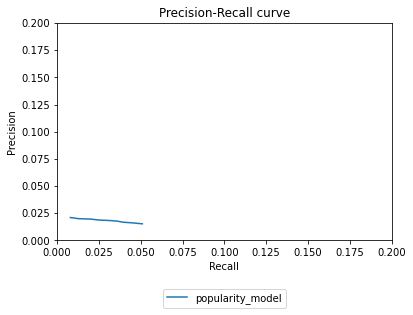

In [40]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model")